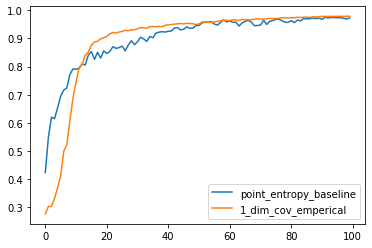

In [2]:
# result1: optim.Adam(params, lr=0.0005)
# result2: optim.Adam(params, lr=0.0001)
# result3: optim.RMSprop(params, lr=0.0001)
# result4: optim.Adam(params, lr=0.00005)
# result5: optim.Adam(params, lr=0.0002)
# result6: optim.Adam(params, lr=0.00001)
# result7: optim.Adam(params, lr=0.00003)
# result8: optim.Adam(params, lr=0.00003)
# result9: linear decay
# result10: emperical entropy, lr=0.00005
# result11: emperical entropy, lr=0.00003
# result12: emperical entropy, lr=0.00003
# result13: emperical entropy, lr=0.00004
# result14: 10 dim covariance batch,adam 0.00003
# result15: 1 dim covariance batch 0.00003
# result16: 1 dim emperical 0.00003
# result17: 10 dim emperical 0.0003
# result18: 10 dim emperical 0.00003
# result19: 10 dim emperical 0.00003_2
# result20: 10 dim lr change

import matplotlib.pyplot as plt
import numpy as np
random=[0.4313, 0.5637, 0.6809, 0.6831, 0.7159, 0.7351, 0.7326, 0.754, 0.8075, 0.8023, 0.8173, 0.8105, 0.8206, 0.8171, 0.8389, 0.8392, 0.8593, 0.8621, 0.8541, 0.8635, 0.8665, 0.8712, 0.8681, 0.8763, 0.8795, 0.8813, 0.8904, 0.9025, 0.9036, 0.8983, 0.9004, 0.8996, 0.9007, 0.904, 0.9057, 0.9074, 0.9094, 0.9088, 0.9023, 0.9054, 0.904, 0.9048, 0.9092, 0.9125, 0.9079, 0.9118, 0.9136, 0.9089, 0.9071, 0.9099, 0.9158, 0.9205, 0.9194, 0.9205, 0.9173, 0.9188, 0.9157, 0.9172, 0.9218, 0.9258, 0.9222, 0.9257, 0.9134, 0.9142, 0.9177, 0.9325, 0.9269, 0.92, 0.9168, 0.9227, 0.9206, 0.9331, 0.9284, 0.9295, 0.9283, 0.9337, 0.9262, 0.9223, 0.9319, 0.9317, 0.9255, 0.9276, 0.9221, 0.9233, 0.9322, 0.9326, 0.9331, 0.9378, 0.9316, 0.9362, 0.9382, 0.9297, 0.9318, 0.93, 0.9302, 0.9325, 0.9357, 0.9373, 0.9338, 0.9363]
# baseline=[0.1135, 0.1135, 0.1135, 0.183, 0.2036, 0.1261, 0.0987, 0.098, 0.098, 0.0988, 0.1203, 0.1775, 0.1271, 0.1828, 0.1395, 0.1135, 0.1135, 0.1135, 0.1135, 0.1135, 0.208, 0.21, 0.2073, 0.2108, 0.2103, 0.2071, 0.2073, 0.2077, 0.2094, 0.2083, 0.2069, 0.2098, 0.2768, 0.2764, 0.2894, 0.3262, 0.3419, 0.3481, 0.3496, 0.3519, 0.3718, 0.3815, 0.3917, 0.4059, 0.4603, 0.4806, 0.505, 0.5583, 0.5821, 0.6097, 0.6617, 0.6953, 0.7085, 0.7461, 0.7587, 0.7906, 0.8233, 0.8215, 0.8658, 0.882, 0.8895, 0.9049, 0.9086, 0.9122, 0.9248, 0.9266, 0.9311, 0.9328, 0.9359, 0.9393, 0.9403, 0.945, 0.9483, 0.9438, 0.9424, 0.9474, 0.9496, 0.9504, 0.9496, 0.9525, 0.9524, 0.9547, 0.9553, 0.9553, 0.9564, 0.9572, 0.9593, 0.9585, 0.9584, 0.9606, 0.9599, 0.9628, 0.9654, 0.9658, 0.9649, 0.9655, 0.9635, 0.9654, 0.9689, 0.9687]
baseline2=[0.4676, 0.5015, 0.5661, 0.6652, 0.7014, 0.7758, 0.7854, 0.7702, 0.7715, 0.7829, 0.821, 0.8202, 0.8653, 0.8849, 0.8894, 0.8919, 0.9098, 0.9048, 0.9175, 0.9206, 0.909, 0.9054, 0.9049, 0.9149, 0.9168, 0.9198, 0.9255, 0.9243, 0.924, 0.9267, 0.9371, 0.9381, 0.9484, 0.9437, 0.9455, 0.9489, 0.9402, 0.9362, 0.9428, 0.9434, 0.9433, 0.943, 0.9503, 0.9485, 0.9429, 0.9492, 0.9488, 0.9509, 0.9493, 0.9493, 0.9532, 0.9356, 0.9569, 0.9546, 0.9543, 0.9553, 0.9565, 0.9587, 0.9594, 0.9617, 0.9641, 0.9625, 0.9631, 0.9617, 0.9631, 0.9655, 0.9639, 0.9661, 0.9603, 0.9681, 0.9637, 0.9671, 0.9681, 0.9644, 0.9601, 0.9651, 0.9651, 0.9681, 0.962, 0.9689, 0.9684, 0.9717, 0.9731, 0.9693, 0.9707, 0.9717, 0.9737, 0.9745, 0.9741, 0.9712, 0.9713, 0.9729, 0.9713, 0.9717, 0.9725, 0.9706, 0.9736, 0.9723, 0.9718, 0.974]
baseline=[0.4232, 0.5475, 0.6198, 0.6148, 0.6528, 0.695, 0.7166, 0.724, 0.7723, 0.7914, 0.7906, 0.7939, 0.8093, 0.8056, 0.8413, 0.853, 0.8258, 0.8508, 0.8302, 0.8554, 0.8467, 0.8538, 0.8707, 0.8647, 0.8673, 0.8729, 0.8559, 0.8765, 0.8918, 0.8778, 0.8886, 0.9042, 0.8987, 0.8892, 0.9071, 0.9021, 0.9191, 0.9223, 0.9241, 0.9226, 0.9255, 0.9263, 0.9369, 0.9386, 0.9303, 0.9325, 0.9415, 0.9356, 0.9366, 0.9457, 0.9461, 0.9554, 0.9577, 0.9576, 0.9591, 0.9509, 0.9474, 0.957, 0.966, 0.9589, 0.9616, 0.9573, 0.9577, 0.9442, 0.9548, 0.9607, 0.9639, 0.9584, 0.9452, 0.9461, 0.9475, 0.9646, 0.9498, 0.9607, 0.9635, 0.968, 0.968, 0.9628, 0.9576, 0.9572, 0.9634, 0.9563, 0.9653, 0.9628, 0.9702, 0.9697, 0.9702, 0.9721, 0.9705, 0.9726, 0.9676, 0.9757, 0.9728, 0.9747, 0.9743, 0.9737, 0.974, 0.9716, 0.9691, 0.9731]
result1=[0.299, 0.5047, 0.6203, 0.6707, 0.7469, 0.7589, 0.7715, 0.7893, 0.8017, 0.8184, 0.7997, 0.8235, 0.8389, 0.8448, 0.8525, 0.8541, 0.8748, 0.8732, 0.8725, 0.8768, 0.8911, 0.8916, 0.8755, 0.8774, 0.8833, 0.8986, 0.9011, 0.9009, 0.9089, 0.8991, 0.889, 0.8976, 0.8954, 0.8938, 0.9004, 0.9051, 0.9095, 0.9233, 0.9157, 0.9155, 0.9306, 0.9201, 0.928, 0.9237, 0.9232, 0.9198, 0.9203, 0.9209, 0.9165, 0.9165, 0.9087, 0.9157, 0.9171, 0.9166, 0.9236, 0.9213, 0.9174, 0.9239, 0.9218, 0.9107, 0.9088, 0.9098, 0.9121, 0.9186, 0.9082, 0.9094, 0.9111, 0.901, 0.9014, 0.8961, 0.9109, 0.897, 0.9102, 0.9093, 0.9077, 0.9117, 0.9149, 0.9016, 0.9022, 0.9139, 0.9138, 0.9145, 0.9104, 0.9143, 0.9227, 0.9175, 0.9123, 0.9105, 0.9143, 0.9121, 0.9023, 0.9019, 0.9086, 0.9092, 0.9093, 0.9132, 0.9164, 0.9146, 0.9188, 0.9161]
result2=[0.2816, 0.3265, 0.4295, 0.5692, 0.6242, 0.6918, 0.7167, 0.7474, 0.8005, 0.8111, 0.8302, 0.8241, 0.8134, 0.8201, 0.8222, 0.8363, 0.85, 0.8668, 0.8829, 0.8771, 0.8924, 0.8913, 0.9017, 0.9062, 0.9015, 0.9034, 0.9127, 0.9146, 0.9239, 0.921, 0.9321, 0.9315, 0.9359, 0.9368, 0.9374, 0.9347, 0.9385, 0.9386, 0.941, 0.9409, 0.9432, 0.9437, 0.9397, 0.9423, 0.9435, 0.9464, 0.9495, 0.9485, 0.9489, 0.9445, 0.947, 0.9493, 0.946, 0.9439, 0.9496, 0.9436, 0.9436, 0.9395, 0.9483, 0.9423, 0.9458, 0.9486, 0.9471, 0.9491, 0.938, 0.9539, 0.9538, 0.9537, 0.9537, 0.9548, 0.9594, 0.955, 0.9595, 0.9477, 0.9558, 0.956, 0.9568, 0.9558, 0.9578, 0.9573, 0.9511, 0.9598, 0.9551, 0.9577, 0.9649, 0.9609, 0.9628, 0.9588, 0.9544, 0.9576, 0.9431, 0.9589, 0.959, 0.9592, 0.9516, 0.9586, 0.9547, 0.9589, 0.9594, 0.9578]
result3=[0.2705, 0.3098, 0.3792, 0.501, 0.6223, 0.6668, 0.7061, 0.7273, 0.7303, 0.8124, 0.818, 0.8258, 0.8219, 0.8364, 0.8592, 0.8654, 0.8705, 0.8774, 0.8787, 0.8676, 0.8954, 0.9031, 0.8974, 0.9001, 0.8962, 0.8981, 0.8977, 0.9012, 0.9074, 0.9155, 0.9114, 0.9055, 0.912, 0.911, 0.9183, 0.9053, 0.9135, 0.9086, 0.9049, 0.9099, 0.9195, 0.9232, 0.8967, 0.9164, 0.9265, 0.909, 0.9191, 0.9186, 0.912, 0.9216, 0.909, 0.9061, 0.9007, 0.9176, 0.9263, 0.9192, 0.9208, 0.9048, 0.9055, 0.9201, 0.9161, 0.9174, 0.9236, 0.9379, 0.9303, 0.9301, 0.9195, 0.9269, 0.9388, 0.932, 0.9348, 0.912, 0.9291, 0.9248, 0.9178, 0.9309, 0.9443, 0.923, 0.9196, 0.9394, 0.9405, 0.931, 0.9416, 0.9405, 0.9366, 0.935, 0.949, 0.9407, 0.9324, 0.9363, 0.9302, 0.9437, 0.9386, 0.9346, 0.9379, 0.9404, 0.9382, 0.9427, 0.948, 0.9468]
result4=[0.2353, 0.3352, 0.32, 0.3577, 0.398, 0.4493, 0.5477, 0.6227, 0.6688, 0.695, 0.7214, 0.7425, 0.7311, 0.7606, 0.7812, 0.7957, 0.8313, 0.8524, 0.8498, 0.8494, 0.8412, 0.8628, 0.8592, 0.854, 0.8527, 0.884, 0.8857, 0.8884, 0.9003, 0.9071, 0.9071, 0.914, 0.9201, 0.922, 0.9223, 0.9263, 0.9319, 0.934, 0.9357, 0.9431, 0.9434, 0.9473, 0.9482, 0.9467, 0.9484, 0.952, 0.9501, 0.9501, 0.9506, 0.9529, 0.9526, 0.9561, 0.9553, 0.954, 0.9585, 0.9566, 0.958, 0.959, 0.9536, 0.9576, 0.9497,0.9619, 0.9551, 0.9537, 0.9623, 0.9609, 0.9548, 0.961, 0.9604, 0.9573, 0.9584, 0.9645, 0.9542, 0.9608, 0.9691, 0.9618,0.9625, 0.9656, 0.9638, 0.9666, 0.963, 0.965, 0.9656, 0.9683, 0.9634, 0.9695, 0.9672, 0.9687, 0.9686, 0.9628, 0.9701, 0.9605, 0.9649, 0.9719, 0.9688, 0.9652, 0.9707, 0.9699, 0.9699, 0.9688]
result5=[0.2872, 0.4375, 0.5536, 0.6952, 0.7547, 0.775, 0.8002, 0.7887, 0.8337, 0.8144, 0.8441, 0.8684, 0.8615, 0.8748, 0.8689, 0.8852, 0.8805, 0.8902, 0.8856, 0.8865, 0.885, 0.8941, 0.8948, 0.8941, 0.9027, 0.9125, 0.9122, 0.9109, 0.9271, 0.9059, 0.9134, 0.9163, 0.912, 0.9259, 0.9273, 0.9234, 0.9347, 0.939, 0.9366, 0.93, 0.9412, 0.9508, 0.9514, 0.9404, 0.9534, 0.9514, 0.9462, 0.9521, 0.949, 0.9487, 0.941, 0.9441, 0.9454, 0.941, 0.9512, 0.9528, 0.9464, 0.9511, 0.946, 0.9544, 0.9578, 0.9527, 0.9551, 0.9579, 0.9586, 0.9589, 0.9528, 0.9547, 0.9568, 0.9537, 0.9553, 0.9545, 0.9521, 0.9578, 0.9546, 0.954, 0.9568, 0.9613, 0.9532, 0.9592, 0.9598, 0.958, 0.9602, 0.959, 0.9536, 0.9569, 0.9539, 0.9576, 0.9624, 0.9572, 0.9617, 0.9563, 0.9562, 0.9596, 0.9623, 0.9573, 0.9502, 0.9611, 0.9575, 0.9519]
result6=[0.2153, 0.1252, 0.2409, 0.2621, 0.3516, 0.3808, 0.3985, 0.4536, 0.5073, 0.4686, 0.5416, 0.5673, 0.5981, 0.6115, 0.6244, 0.6437, 0.6345, 0.657, 0.6591, 0.6931, 0.7121, 0.7152, 0.7197, 0.7509, 0.7626, 0.7725, 0.8011, 0.8166, 0.8336, 0.8311, 0.8352, 0.8591, 0.8644, 0.8679, 0.8711, 0.8906, 0.8951, 0.8988, 0.9033, 0.9035, 0.9124, 0.9102, 0.9177, 0.9215, 0.922, 0.9232, 0.9293, 0.9299, 0.9334, 0.9345, 0.9376, 0.9397, 0.9423, 0.9448, 0.9429, 0.9444, 0.948, 0.947, 0.9481, 0.9482, 0.9531, 0.9522, 0.9539, 0.9541, 0.9533, 0.9539, 0.9555, 0.9557, 0.9547, 0.9592, 0.9575, 0.9551, 0.9564, 0.9553, 0.9563, 0.9554, 0.9569, 0.9569, 0.9568, 0.9584, 0.9581, 0.9594, 0.961, 0.9605, 0.9621, 0.9598, 0.9612, 0.9594, 0.9614, 0.9609, 0.9597, 0.9596, 0.9616, 0.9615, 0.9588, 0.9618, 0.9624, 0.958, 0.9613, 0.9633]
result7=[0.2136, 0.2198, 0.2651, 0.2969, 0.3624, 0.4234, 0.4869, 0.5629, 0.6371, 0.6567, 0.6901, 0.7073, 0.7069, 0.7099, 0.7292, 0.7485, 0.7756, 0.7861, 0.8135, 0.8151, 0.8275, 0.824, 0.8417, 0.8455, 0.8569, 0.873, 0.8798, 0.8824, 0.884, 0.8983,0.9031, 0.9051, 0.9046, 0.9146, 0.9147, 0.9114, 0.9195, 0.9134, 0.9186, 0.9198, 0.9282, 0.9156, 0.9283, 0.933, 0.9352,0.9307, 0.933, 0.9374, 0.9378, 0.9379, 0.939, 0.9413, 0.9394, 0.9434, 0.9459, 0.945, 0.9475, 0.9526, 0.9499, 0.9546, 0.96, 0.9591, 0.9587, 0.9616, 0.9611, 0.9637, 0.9651, 0.9651, 0.9627, 0.9625, 0.965, 0.9682, 0.9678, 0.9694, 0.9679, 0.9683, 0.965, 0.9648, 0.9697, 0.9692, 0.9694, 0.9684, 0.9724, 0.9715, 0.9728, 0.9727, 0.9716, 0.9731, 0.9735, 0.9739, 0.9734, 0.9737, 0.9737, 0.9747, 0.9726, 0.975, 0.9745, 0.976, 0.9762, 0.9757]
result8=[0.2553, 0.2232, 0.2489, 0.3119, 0.2955, 0.3089, 0.3313, 0.3901, 0.4423, 0.4912, 0.5041, 0.567, 0.5853, 0.6192, 0.6438, 0.6697, 0.696, 0.7412, 0.7653, 0.791, 0.7957, 0.8191, 0.8225, 0.8382, 0.8557, 0.8634, 0.8685, 0.8635, 0.8819, 0.8856,0.8862, 0.8927, 0.8938, 0.8941, 0.8999, 0.9033, 0.912, 0.9163, 0.9218, 0.9107, 0.9181, 0.9251, 0.9283, 0.9359, 0.9333,0.9306, 0.9412, 0.9385, 0.938, 0.9323, 0.9319, 0.9345, 0.9401, 0.9465, 0.9441, 0.9446, 0.9435, 0.9457, 0.9502, 0.9511,0.9505, 0.9506, 0.952, 0.9529, 0.9569, 0.9608, 0.961, 0.9581, 0.9612, 0.9611, 0.9637, 0.9657, 0.9667, 0.966, 0.9656, 0.9711, 0.9681, 0.9706, 0.9684, 0.9687, 0.9717, 0.9731, 0.9744, 0.9707, 0.9731, 0.9723, 0.9722, 0.9737, 0.9717, 0.9701, 0.9731, 0.9753, 0.9738, 0.9758, 0.9758, 0.9758, 0.9759, 0.9753, 0.9748, 0.9753]
result9=[0.2964, 0.3322, 0.482, 0.5542, 0.6172, 0.6331, 0.6755, 0.7006, 0.7198, 0.7439, 0.7598, 0.7813, 0.7812, 0.7813, 0.7891, 0.7938, 0.8002, 0.8041, 0.8009, 0.8185, 0.8389, 0.8483, 0.841, 0.8394, 0.8576, 0.8747, 0.8778, 0.8881, 0.871, 0.8692,0.8869, 0.8923, 0.8929, 0.8858, 0.8875, 0.867, 0.8912, 0.8832, 0.8802, 0.893, 0.8834, 0.8815, 0.8871, 0.8904, 0.9068, 0.8933, 0.9008, 0.9012, 0.9064, 0.9033, 0.903, 0.9008, 0.9114, 0.9092, 0.8984, 0.9045, 0.9046, 0.9033, 0.8952, 0.8979, 0.9029, 0.9134, 0.9179, 0.92, 0.9242, 0.9234, 0.9243, 0.9069, 0.9177, 0.917, 0.9192, 0.9174, 0.9083, 0.9061, 0.9003, 0.9147, 0.9154, 0.9202, 0.9143, 0.9161, 0.9134, 0.9069, 0.9061, 0.887, 0.8934, 0.9023, 0.9033, 0.9004, 0.9077, 0.9066, 0.912, 0.9169, 0.9245, 0.9213, 0.9243, 0.9217, 0.9271, 0.9298, 0.9303, 0.9278]
result10=[0.1884, 0.3075, 0.39, 0.5159, 0.5677, 0.6211, 0.6818, 0.7292, 0.7671, 0.7991, 0.8315, 0.859, 0.867, 0.888, 0.8896, 0.901, 0.9014, 0.9022, 0.9154, 0.9125, 0.9207, 0.9239, 0.9176, 0.922, 0.9247, 0.9208, 0.9169, 0.9264, 0.9357, 0.9391, 0.9441, 0.9464, 0.9458, 0.9444, 0.9432, 0.9491, 0.9502, 0.9481, 0.9512, 0.9491, 0.9545, 0.9553, 0.9569, 0.9579, 0.9604, 0.9561, 0.9569, 0.9595, 0.9604, 0.9613, 0.9617, 0.9632, 0.9626, 0.9628, 0.9644, 0.9646, 0.9629, 0.9646, 0.9632, 0.9641, 0.9647, 0.9652, 0.9661, 0.9656, 0.9641, 0.9631, 0.9647, 0.9649, 0.9673, 0.9626, 0.9658, 0.9666, 0.9653, 0.9663, 0.967, 0.9641, 0.9648, 0.965, 0.9604, 0.9633, 0.9645, 0.9634, 0.9644, 0.9669, 0.9669, 0.963, 0.965, 0.9633, 0.9628, 0.965, 0.9645, 0.9653, 0.9673, 0.9628, 0.9617, 0.9641, 0.9657, 0.9632, 0.9634, 0.9645]
result11=[0.2028, 0.2093, 0.2796, 0.2304, 0.2793, 0.3236, 0.4056, 0.5121, 0.5737, 0.6398, 0.7241,0.7794, 0.8198, 0.8337, 0.848, 0.8536, 0.8554, 0.8706, 0.8753, 0.8829, 0.9002, 0.9111, 0.9139, 0.9226, 0.9225, 0.9288, 0.9354, 0.9375, 0.9406, 0.9387, 0.9458, 0.9472, 0.947, 0.9434, 0.9441, 0.94, 0.9422, 0.951, 0.9542, 0.9545, 0.9509, 0.9533, 0.9544, 0.9535, 0.9543,0.9565, 0.9587, 0.9583, 0.9588, 0.9605, 0.9607, 0.9589, 0.9605, 0.9592, 0.9577, 0.9601, 0.9626, 0.964, 0.9642, 0.9642, 0.9658, 0.9661, 0.9678, 0.9686, 0.9691, 0.9673, 0.9687, 0.9701, 0.9685, 0.9697, 0.9696, 0.971, 0.9719, 0.9738, 0.9712, 0.9721, 0.9726, 0.9748, 0.9733, 0.9721, 0.9735, 0.9757, 0.9748, 0.975, 0.978, 0.978, 0.9755, 0.9746, 0.9752, 0.9753, 0.9762, 0.976, 0.9751, 0.9748, 0.9763, 0.9758, 0.9747, 0.9751, 0.976, 0.9752]
result12=[0.2585, 0.2812, 0.3637, 0.4483, 0.4884, 0.5737, 0.636, 0.6912, 0.7452, 0.7864, 0.8097, 0.8262, 0.8264, 0.8297, 0.8552, 0.8695, 0.8925, 0.8964, 0.9109, 0.9157, 0.92, 0.9214, 0.9237, 0.922, 0.9312, 0.9299, 0.9312, 0.937, 0.9395, 0.939, 0.9424, 0.9456, 0.9462, 0.9467, 0.9503, 0.9509, 0.9524, 0.9517, 0.9528, 0.953, 0.9534, 0.9558, 0.955, 0.957, 0.9594, 0.9587, 0.9577, 0.9602, 0.959, 0.9595, 0.9599, 0.9611, 0.9606, 0.9637, 0.9628, 0.9635, 0.9631, 0.9654, 0.9635, 0.9666, 0.9649, 0.9662, 0.9647, 0.9666, 0.9663, 0.9671, 0.9667, 0.9667, 0.967, 0.9675, 0.969, 0.9693, 0.9704, 0.9705, 0.9702, 0.9707, 0.9704, 0.9713, 0.971, 0.9727, 0.9702, 0.9703, 0.9704, 0.973, 0.9728, 0.9713, 0.9701, 0.9716, 0.9727, 0.9706, 0.9701, 0.9734, 0.9706, 0.9689, 0.97, 0.9709, 0.9707, 0.9704, 0.9729, 0.9728]
result13=[0.2711, 0.3098, 0.3862, 0.4904, 0.5474, 0.5701, 0.6323, 0.6769, 0.7009, 0.714, 0.7535, 0.7944, 0.7981, 0.8111, 0.8351, 0.85, 0.8742, 0.8732, 0.8756, 0.8832, 0.8888, 0.9028, 0.9061, 0.9083, 0.9158, 0.923, 0.9265, 0.931, 0.9327, 0.9373, 0.9383, 0.9405, 0.9403, 0.9414, 0.9417, 0.9451, 0.9456, 0.946, 0.9442, 0.9474, 0.9485, 0.9469, 0.9507, 0.9502, 0.9511, 0.954, 0.9536, 0.9551, 0.9556, 0.9568, 0.9571, 0.9572, 0.9601, 0.9574, 0.9603, 0.9614, 0.9619, 0.9612, 0.9628, 0.9628, 0.9627, 0.9622, 0.9658, 0.9644, 0.9647, 0.9665, 0.9664, 0.9673, 0.9653, 0.9675, 0.9672, 0.9678, 0.9671, 0.9668, 0.9623, 0.968, 0.97, 0.9679, 0.9698, 0.967, 0.9672, 0.9692, 0.9694, 0.9672, 0.9668, 0.968, 0.9662, 0.9659, 0.9692, 0.9665, 0.968, 0.9676, 0.9666, 0.9676, 0.966, 0.9694, 0.9673, 0.9713, 0.969, 0.9701]
result14=[0.2409, 0.2659, 0.3512, 0.3651, 0.4272, 0.4423, 0.4883, 0.5189, 0.5816, 0.6556, 0.6848, 0.721, 0.7352, 0.7576, 0.775, 0.7827, 0.8033, 0.8062, 0.828, 0.8403, 0.8497, 0.8698, 0.8671, 0.8799, 0.8797, 0.8822, 0.8883, 0.8786, 0.8897, 0.9028, 0.9059, 0.9118, 0.9077, 0.9118, 0.9096, 0.9141, 0.9182, 0.9199, 0.92, 0.9247, 0.9307, 0.9319, 0.933, 0.9347, 0.9386, 0.9376, 0.942, 0.9418, 0.9427, 0.9418, 0.9444, 0.9488, 0.9496, 0.9504, 0.9522, 0.952, 0.9534, 0.9554, 0.9555, 0.9543, 0.9561, 0.9555, 0.9583, 0.9602, 0.9587, 0.9597, 0.9597, 0.9594, 0.96, 0.9612, 0.9626, 0.9637, 0.9643, 0.9641, 0.9635, 0.9655, 0.9643, 0.9654, 0.9668, 0.9664, 0.9637, 0.9657, 0.9649, 0.9656, 0.966, 0.9673, 0.9669, 0.9685, 0.9694, 0.969, 0.9707, 0.9688, 0.9705, 0.9715, 0.969, 0.9721, 0.972, 0.9729, 0.9727, 0.9723]
result15=[0.2182, 0.2992, 0.252, 0.3631, 0.4251, 0.4526, 0.4863, 0.554, 0.6074, 0.6549, 0.6701, 0.6829, 0.6824, 0.6851, 0.6898, 0.7098, 0.7292, 0.7523, 0.7992, 0.8219, 0.8211, 0.8414, 0.8418, 0.847, 0.8446, 0.8615, 0.858, 0.8692, 0.8624, 0.8828, 0.8941, 0.9018, 0.895, 0.9023, 0.9083, 0.9125, 0.9165, 0.9124, 0.904, 0.9074, 0.9159, 0.9211, 0.9191, 0.9275, 0.919, 0.9298, 0.9294, 0.9379, 0.936, 0.9351, 0.9322, 0.939, 0.9414, 0.9497, 0.9492, 0.9508,0.9516, 0.9531, 0.952, 0.9539, 0.9576, 0.9562, 0.9569, 0.9589, 0.9604, 0.961, 0.9611, 0.9611, 0.9606, 0.9608,0.9625, 0.9589, 0.9636, 0.9632, 0.966, 0.9671, 0.967, 0.9665, 0.9649, 0.9656, 0.9676, 0.9677, 0.9685, 0.9695,0.9692, 0.9703, 0.9706, 0.9709, 0.9719, 0.9719, 0.9721, 0.9734, 0.9724, 0.9747, 0.9712, 0.975, 0.9734, 0.9746,0.9751,0.9755]
result16=[0.2762, 0.3026, 0.3028, 0.3313, 0.3688, 0.412, 0.4985, 0.5224, 0.6078, 0.6879, 0.7445, 0.7953, 0.8082, 0.8408, 0.8512, 0.8765, 0.888, 0.8896, 0.8987, 0.9022, 0.9072, 0.9161, 0.9211, 0.919, 0.9225, 0.9251, 0.9289, 0.9273, 0.9311, 0.9308, 0.9345, 0.9386, 0.938, 0.9364, 0.9421, 0.9425, 0.9413, 0.9423, 0.9419, 0.9467, 0.9481, 0.9492, 0.951, 0.9518, 0.953, 0.9517, 0.9538, 0.9529, 0.9523, 0.9493, 0.9512, 0.9584, 0.9583, 0.9576, 0.9573, 0.9585, 0.9611, 0.9628, 0.9642, 0.9642, 0.9632, 0.9665, 0.9651, 0.9637, 0.9678, 0.9665, 0.9666, 0.9668, 0.9686, 0.9698, 0.9687, 0.9686, 0.9696, 0.9716, 0.9706, 0.9708, 0.9718, 0.9734, 0.9741, 0.9725, 0.9736, 0.9736, 0.9755, 0.9744, 0.9754, 0.976, 0.9747, 0.9769, 0.9765, 0.9776, 0.9786, 0.9782, 0.978, 0.9785, 0.9783, 0.9787, 0.9786, 0.9784, 0.9788, 0.9789]
result17=[0.271, 0.4324, 0.5976, 0.6189, 0.6673, 0.6734, 0.7348, 0.7743, 0.7982, 0.8219, 0.8373, 0.8375, 0.8406, 0.8168, 0.8543, 0.871, 0.8609, 0.8696, 0.8821, 0.8808, 0.8948, 0.9049, 0.8962, 0.9059, 0.9157, 0.9049, 0.9168, 0.9197, 0.9188, 0.9308, 0.9396, 0.9311, 0.9369, 0.933, 0.9385, 0.9462, 0.9453, 0.9511, 0.9466, 0.9525, 0.9466, 0.9505, 0.9468, 0.9553, 0.9526, 0.9571, 0.9597, 0.9559, 0.9499, 0.9505, 0.953, 0.9535, 0.9519, 0.9539, 0.9484, 0.9527, 0.9507, 0.9533, 0.9485, 0.9523, 0.9567, 0.9588, 0.957, 0.9627, 0.9619, 0.9589, 0.96, 0.9582, 0.9569, 0.9615, 0.9629, 0.962, 0.9609, 0.9488, 0.9495, 0.9469, 0.949, 0.9455, 0.949, 0.9539, 0.9525, 0.9625, 0.959, 0.9539, 0.9566, 0.9585, 0.9482, 0.9506, 0.9521, 0.9519, 0.9612, 0.9521, 0.958, 0.9622, 0.9568, 0.9592, 0.9574, 0.9629, 0.9605, 0.9594]
result18=[0.2068, 0.2984, 0.3145, 0.3576, 0.4095, 0.4525, 0.5002, 0.5502, 0.5896, 0.6136, 0.653, 0.7056, 0.7363, 0.7723, 0.7937, 0.8015, 0.8151, 0.8178, 0.8338, 0.8441, 0.8647, 0.8686, 0.8756, 0.8828, 0.8912, 0.894, 0.8995, 0.9116, 0.9089, 0.9157, 0.9167, 0.9198, 0.9197, 0.9208, 0.9238, 0.9298, 0.9273, 0.9289, 0.927, 0.9303, 0.9302, 0.933, 0.9337, 0.9351, 0.9369, 0.9386, 0.9444, 0.943, 0.945, 0.9459, 0.948, 0.9455, 0.9442, 0.9476, 0.9458, 0.9498, 0.9501, 0.9506, 0.953, 0.9542, 0.9559, 0.955, 0.955, 0.9579, 0.9563, 0.957, 0.9623, 0.9598, 0.9626, 0.9628, 0.9627, 0.9641, 0.9646, 0.9625, 0.9631, 0.9617, 0.966, 0.9681, 0.9694, 0.9694, 0.9709, 0.9668, 0.9712, 0.9704, 0.9673, 0.9687, 0.97, 0.9695, 0.9709, 0.9704, 0.9678, 0.97, 0.9728, 0.9715, 0.9747, 0.9746, 0.9749, 0.9755, 0.9753, 0.9741]
result19=[0.1891, 0.1725, 0.1943, 0.2615, 0.2973, 0.374, 0.3895, 0.4054, 0.446, 0.4593, 0.4795, 0.516, 0.5851, 0.6346, 0.6924, 0.7289, 0.7805, 0.8238, 0.8431, 0.8491, 0.862, 0.8688, 0.8784, 0.9006, 0.9027, 0.8983, 0.909, 0.9062, 0.9108, 0.9082, 0.9007, 0.9115, 0.9156, 0.9129, 0.9173, 0.9193, 0.9267, 0.9277, 0.9314, 0.9317, 0.9352, 0.9383, 0.9417, 0.9382, 0.9386, 0.9448, 0.945, 0.9426, 0.9443, 0.9475, 0.9428, 0.9501, 0.949, 0.9499, 0.9533, 0.951, 0.9572, 0.9584, 0.9571, 0.9577, 0.9619, 0.9604, 0.9626, 0.9632, 0.9636, 0.9629, 0.9638, 0.9662, 0.9658, 0.9681, 0.969, 0.9688, 0.9692, 0.9701, 0.971, 0.9716, 0.9723, 0.9724, 0.9735, 0.9736, 0.9727, 0.9748, 0.9746, 0.974, 0.9736, 0.9742, 0.9749, 0.9752, 0.9757, 0.9758, 0.977, 0.9773, 0.9764, 0.9761, 0.9758, 0.9761, 0.9766, 0.975, 0.9769, 0.9771]
result20=[0.2418, 0.4485, 0.5834, 0.6188, 0.7017, 0.7442, 0.8051, 0.8366, 0.8543, 0.8652, 0.8833, 0.8779, 0.8937, 0.8946, 0.9016, 0.8998, 0.9092, 0.9194, 0.9261, 0.9315, 0.933, 0.9339, 0.9346, 0.9346, 0.9379, 0.9369, 0.9344, 0.9379, 0.9399, 0.9433,0.9381, 0.9355, 0.934, 0.9353, 0.9436, 0.938, 0.9362, 0.941, 0.947, 0.9463, 0.9493, 0.9497, 0.9479, 0.9468, 0.9444, 0.9445, 0.9493, 0.9506, 0.9534, 0.9525, 0.9535, 0.9517, 0.9534, 0.954, 0.9548, 0.9561, 0.958, 0.9567, 0.9593, 0.9581, 0.9585, 0.9578, 0.9602, 0.9598, 0.9587, 0.9606, 0.9602, 0.9603, 0.9605, 0.9618, 0.9603, 0.9625, 0.962, 0.9611, 0.9624, 0.9629, 0.9632, 0.9624, 0.9614, 0.9615, 0.9627, 0.9628, 0.9627, 0.961, 0.9616, 0.96, 0.9621, 0.9604, 0.9609, 0.9614, 0.9614, 0.9604, 0.9615, 0.9616, 0.9617, 0.9602, 0.9609, 0.9615, 0.9608, 0.9614]
plt.plot(baseline,label='point_entropy_baseline')
# plt.plot(baseline2,label='point_entropy_baseline_2')
# plt.plot(random,label='random_sampling_baseline')
# plt.plot(result1,label='diag_adam_0.0005')
# plt.plot(result2,label='diag_adam_0.0001')
# plt.plot(result3,label='diag_rmsprop_0.0001')
# plt.plot(result4,label='diag_adam_0.00005')
# plt.plot(result5,label='diag_adam_0.0002')
# plt.plot(result6,label='diag_adam_0.00001')
# plt.plot(result7,label='diag_adam_0.00003')
# plt.plot(result8,label='diag_adam_0.00003_2')
# plt.plot(result9,label='linear_decay')6
# plt.plot(result10,label='emperical_entropy_0.00005')
# plt.plot(result11,label='emperical_entropy_0.00003')
# plt.plot(result12,label='emperical_entropy_0.00003_2')
# plt.plot(result13,label='emperical_entropy_0.00004')
# plt.plot(result14,label='10_dim_cov_batch')
# plt.plot(result15,label='1_dim_cov_batch')
plt.plot(result16,label='1_dim_cov_emperical')
# plt.plot(result17,label='10_dim_cov_emperical_0.0003')
# # plt.plot(result18,label='10_dim_cov_emperical_0.00003')
# plt.plot(result19,label='10_dim_cov_emperical_0.00003_2')
# plt.plot(result20,label='10_dim_cov_lr_change')
plt.legend()
plt.show()

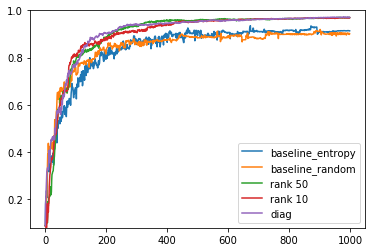

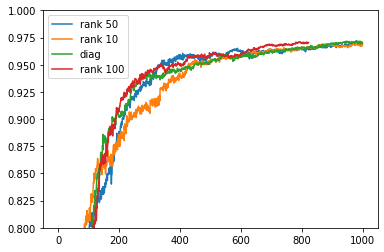

In [4]:
# result1: optim.Adam(params, lr=0.001),q_rank=10
# result2: optim.Adam(params, lr=0.0001),q_rank=10
# result3: optim.Adam(params, lr=0.00003),q_rank=10
# result4: annealing
# result5: baseline
# result6: optim.Adam(params, lr=0.00003),q_rank=10
# result7: diag optim.Adam(params, lr=5e-5)
# result8: diag optim.Adam(params, lr=3e-5)
# result9:  optim.Adam(params, lr=3e-5) q_rank_50
# result10: diag optim.Adam(params, lr=3e-5)
# result11: baseline random sampling
# result12:  optim.Adam(params, lr=3e-5) q_rank_50
import matplotlib.pyplot as plt
import numpy as np
result_1=[0.0892, 0.1032, 0.0982, 0.1032, 0.1032, 0.0892, 0.1611, 0.182, 0.2029, 0.1962,0.1909, 0.1948, 0.1908, 0.1912, 0.2585, 0.2179, 0.219, 0.2237, 0.2242, 0.2207, 0.222, 0.2349, 0.2362, 0.2303, 0.2262, 0.2267, 0.2068, 0.1958, 0.1919, 0.1927, 0.202, 0.2133, 0.2125, 0.2355, 0.2471, 0.2539, 0.2629, 0.2633, 0.2754, 0.2758, 0.2725, 0.2659, 0.2623, 0.2658, 0.2592, 0.2692, 0.2682, 0.2667, 0.267, 0.2777, 0.2705, 0.2702, 0.2739, 0.2748, 0.278, 0.2795, 0.2768, 0.2763, 0.2785, 0.2783, 0.2839, 0.2812, 0.2813, 0.2829, 0.2925, 0.2818, 0.2819, 0.2749, 0.2759, 0.3056, 0.2964, 0.3042, 0.2948, 0.2951, 0.2971, 0.2975, 0.3023, 0.3003, 0.2641, 0.2867, 0.2736, 0.2928, 0.2664, 0.2638, 0.2654, 0.2664, 0.2722, 0.2793, 0.2991, 0.2749, 0.2828, 0.2757, 0.2756, 0.27, 0.2849, 0.2801, 0.2773, 0.2828, 0.2841, 0.2843]
result_2=[0.0892, 0.1252, 0.0748, 0.101, 0.1052, 0.1941, 0.1902, 0.2042, 0.1954, 0.1952,0.2074, 0.238, 0.2656, 0.2761, 0.2802, 0.2982, 0.3225, 0.3508, 0.3606, 0.3887, 0.4115, 0.4547, 0.4953, 0.4905, 0.4694, 0.491, 0.487, 0.4928, 0.4856, 0.4847, 0.4803, 0.4877, 0.4594, 0.4732, 0.4832, 0.4962, 0.5133, 0.5309, 0.5598, 0.5778, 0.5818, 0.5914, 0.5968, 0.5768, 0.5927, 0.6028, 0.5945, 0.5938, 0.6022, 0.5949, 0.6013, 0.6089, 0.6053, 0.6045, 0.6077, 0.6019, 0.6219, 0.636, 0.6524, 0.6453, 0.6585, 0.6515, 0.6443, 0.6509, 0.6421, 0.6478, 0.6316, 0.6651, 0.6703, 0.6712, 0.6578, 0.6641, 0.664, 0.6838, 0.666, 0.6692, 0.6738, 0.6774, 0.6661, 0.6771, 0.668, 0.6722, 0.6685, 0.6734, 0.6756, 0.6765, 0.6752, 0.6795, 0.6701, 0.6635, 0.6772, 0.6792, 0.6657, 0.6643, 0.6875, 0.6954, 0.6809, 0.6941, 0.6796, 0.7019]
result_3=[0.0892, 0.09, 0.0833, 0.1755, 0.0805, 0.1806, 0.1034, 0.1078, 0.1277, 0.1832, 0.1464, 0.1803, 0.184, 0.2554, 0.2775,0.3044, 0.3121, 0.3291, 0.337, 0.36, 0.3749, 0.3696, 0.3673, 0.3759, 0.3755, 0.3879, 0.3911, 0.4079, 0.4257, 0.4468, 0.452, 0.4654, 0.4771, 0.4855, 0.474, 0.4787, 0.4803, 0.4898, 0.5145, 0.5291, 0.5331, 0.5431, 0.5711, 0.5675, 0.572, 0.5739, 0.587, 0.5934, 0.6028, 0.5986, 0.6056, 0.6132, 0.6276, 0.6303, 0.6252, 0.6299, 0.636, 0.6469, 0.6427, 0.6429, 0.6388, 0.6625, 0.6612, 0.6548, 0.6664, 0.6614, 0.6631, 0.6585, 0.6596, 0.6591, 0.6572, 0.658, 0.6606, 0.6631, 0.6702, 0.6928, 0.7285, 0.7584, 0.7678, 0.7687, 0.7691, 0.7795, 0.7739, 0.7799, 0.7874, 0.7915, 0.8007, 0.8036, 0.8007, 0.7979, 0.8053, 0.8109, 0.8082, 0.8028, 0.8039, 0.8159, 0.808, 0.8127, 0.8118, 0.8052]
result_4=[0.0892, 0.09, 0.0833, 0.1755, 0.0805, 0.1806, 0.1034, 0.1078, 0.1277, 0.1832, 0.1464, 0.1803, 0.184, 0.2554, 0.2775, 0.3044, 0.3121, 0.3291, 0.337, 0.36, 0.3749, 0.3696, 0.3673, 0.3759, 0.3755, 0.3879, 0.3911, 0.4079, 0.4257, 0.4468, 0.452, 0.4654, 0.4816, 0.4921,0.485, 0.4856, 0.4832, 0.5055, 0.531,0.5496, 0.5515, 0.568, 0.5736, 0.5739, 0.5721, 0.5842, 0.5805, 0.587, 0.5889, 0.5887, 0.589, 0.5954, 0.6161, 0.6308, 0.6385, 0.6391, 0.6442, 0.6384, 0.6376, 0.6428, 0.6444, 0.6428, 0.642, 0.6449, 0.6434, 0.6398, 0.6596, 0.6871,0.6885, 0.6916, 0.685, 0.6974, 0.7002, 0.6996, 0.6997, 0.7031, 0.7053, 0.7197, 0.7189, 0.7282, 0.7161, 0.7186, 0.727, 0.7256, 0.7291, 0.7317, 0.7352, 0.7518, 0.7564, 0.7554, 0.7541, 0.7603,0.7496, 0.7539, 0.7571, 0.7666, 0.7715, 0.7634, 0.7785, 0.7652]
# result_5=[0.0892, 0.1844, 0.1844, 0.1737, 0.1545, 0.1538, 0.1853, 0.2388, 0.2364, 0.321, 0.3462, 0.3856, 0.3601, 0.3977, 0.3855, 0.3807, 0.4048, 0.4215, 0.3608, 0.429, 0.4998, 0.5346, 0.4596, 0.5178, 0.5465, 0.4756, 0.5644, 0.5754, 0.5385, 0.5961, 0.5314, 0.6227, 0.6128, 0.5473, 0.567, 0.5619, 0.6524, 0.6579, 0.5667, 0.5652, 0.5999, 0.5165, 0.5685, 0.5538, 0.5527, 0.6141, 0.615, 0.6101, 0.668, 0.6228, 0.6351, 0.659, 0.6783, 0.6603, 0.6805,0.6412, 0.6602, 0.6673, 0.6897, 0.7354, 0.7201, 0.7025, 0.6776, 0.7058, 0.7201, 0.7093, 0.6911, 0.6987, 0.7137, 0.7082, 0.7031, 0.7323, 0.7342, 0.6817, 0.6956, 0.7103, 0.7244, 0.7422, 0.6997, 0.7641, 0.768, 0.7494, 0.7361, 0.7241, 0.7349, 0.7708, 0.7515, 0.7581, 0.719, 0.7421, 0.7486, 0.7446, 0.7353, 0.7667, 0.7599, 0.7576, 0.7574, 0.7566, 0.7677, 0.7763, 0.7576, 0.7941, 0.8, 0.8038, 0.8014, 0.7754, 0.7727, 0.7988, 0.8008, 0.7914,0.8007, 0.7983, 0.7976, 0.7905, 0.7935, 0.7921, 0.7789, 0.7864, 0.7887, 0.7896, 0.7625, 0.7721, 0.7395, 0.7788, 0.7795, 0.7815, 0.7541, 0.7612, 0.7698, 0.7764, 0.7659, 0.7777, 0.7632, 0.7632, 0.767, 0.7643, 0.7293, 0.7407, 0.764, 0.7638, 0.7588, 0.7642, 0.7134, 0.7789, 0.7824, 0.7419, 0.7389, 0.7491, 0.7726, 0.8315, 0.8338, 0.8387, 0.8205, 0.799, 0.8261, 0.8104, 0.8144, 0.8253, 0.8375, 0.8293, 0.8268, 0.8191, 0.8086, 0.8133, 0.8188, 0.8177, 0.8185, 0.8024, 0.8092, 0.8136, 0.8147, 0.8162, 0.8176, 0.8174, 0.8205, 0.8427, 0.8402, 0.8404, 0.8386, 0.8407, 0.8164, 0.8019, 0.8029, 0.8326, 0.8127, 0.8278, 0.8068, 0.8217, 0.8028, 0.8057, 0.8195, 0.8224, 0.8305, 0.8366, 0.8355, 0.8465, 0.8495, 0.8109, 0.8174, 0.8102, 0.8029,0.8417, 0.8516, 0.8534, 0.7896, 0.801, 0.85, 0.8501, 0.8504, 0.8334, 0.8247, 0.8566, 0.8316, 0.8404, 0.8449, 0.8402, 0.8216, 0.825, 0.8261, 0.8048, 0.8071, 0.8014, 0.8236, 0.8288, 0.8348, 0.8395, 0.8372, 0.8454, 0.8392, 0.8346, 0.8263, 0.8267, 0.8192, 0.8352, 0.8416, 0.8388, 0.8324, 0.8579, 0.8587, 0.8569, 0.859, 0.8703, 0.8682, 0.8692, 0.8701, 0.8706, 0.8634, 0.8645, 0.8679, 0.873, 0.8696, 0.8732, 0.8646, 0.8353, 0.8311, 0.83, 0.8517, 0.8648, 0.8672, 0.8742, 0.8796, 0.8752, 0.8592, 0.8817, 0.868, 0.869, 0.8766, 0.8745, 0.865, 0.8639, 0.8567, 0.8479, 0.848, 0.8411, 0.8551,0.8556, 0.8575, 0.8756, 0.8746, 0.8902, 0.8906, 0.8885, 0.8971, 0.888, 0.8414, 0.8376, 0.8554, 0.8534, 0.852, 0.859, 0.8718, 0.8721, 0.8726, 0.8512, 0.8861, 0.8824, 0.889, 0.8856, 0.8858, 0.8849, 0.8873, 0.8845, 0.8832, 0.8513, 0.8541, 0.8749, 0.8762, 0.8602, 0.8542, 0.8544, 0.8731, 0.8739, 0.8389, 0.8525, 0.8602, 0.8585, 0.8684, 0.8665, 0.8682, 0.8702, 0.8698, 0.8711, 0.8707, 0.8717, 0.8799, 0.8804, 0.8907, 0.8846, 0.8825, 0.879,0.8827, 0.8779, 0.8727, 0.8751, 0.8837, 0.8727, 0.8817, 0.8685, 0.874, 0.8603, 0.8635, 0.8849, 0.8816, 0.8816, 0.9018, 0.8995, 0.8995, 0.8721, 0.8706, 0.8939, 0.8925, 0.8926, 0.9021, 0.8979, 0.8963, 0.8976, 0.8812, 0.8819, 0.872, 0.9093, 0.9082, 0.9073, 0.8978, 0.9062, 0.9038, 0.9045, 0.9026, 0.9028, 0.9055, 0.9111, 0.8978, 0.891, 0.9014, 0.8942, 0.8929, 0.9036, 0.9022, 0.8621, 0.8584, 0.8557, 0.8659, 0.8677, 0.8788, 0.8932, 0.8595, 0.8635, 0.8747, 0.8859, 0.8965, 0.8874, 0.8977, 0.906, 0.9006, 0.9109, 0.9118, 0.9171, 0.9176, 0.9183, 0.9103, 0.9126, 0.9147, 0.904, 0.8985, 0.894, 0.8904, 0.905, 0.9139, 0.9093, 0.9141, 0.9193, 0.9209, 0.92, 0.9079, 0.9075, 0.9079, 0.9175, 0.9207, 0.9186, 0.9152, 0.9164, 0.9117, 0.9069, 0.9075, 0.9076, 0.911, 0.9266, 0.9256, 0.9098, 0.9088, 0.9092, 0.9063, 0.9102, 0.9066, 0.9039, 0.9001, 0.899, 0.8998, 0.8979, 0.9093, 0.9067, 0.8978, 0.9065, 0.8908, 0.894, 0.9063, 0.9144, 0.9079, 0.9105, 0.9185, 0.9073, 0.9123, 0.9113, 0.9083, 0.9086, 0.9073, 0.883, 0.8838, 0.908, 0.9023, 0.9095, 0.9179, 0.9211, 0.9152, 0.9178, 0.9052, 0.9247, 0.9111, 0.9075, 0.9174, 0.918, 0.9173, 0.9134, 0.9145, 0.9141, 0.913, 0.9074, 0.9128,0.9062, 0.9066, 0.9096, 0.8933, 0.8794, 0.8684, 0.9021, 0.921, 0.9199, 0.9034, 0.9077, 0.9033, 0.899, 0.8988, 0.8979, 0.8986, 0.8973, 0.8952, 0.9014, 0.9228, 0.9145, 0.9216, 0.9157]

baseline_entropy=[0.0892, 0.1805, 0.2133, 0.1835, 0.2369, 0.207, 0.2485, 0.3184, 0.3219, 0.3492, 0.3257, 0.3416, 0.3426, 0.3166, 0.3615, 0.3312, 0.352, 0.364, 0.3612, 0.3845, 0.3649, 0.3779, 0.3598, 0.3821, 0.3578, 0.3612, 0.397, 0.347, 0.356, 0.3916, 0.4259, 0.4394, 0.4544, 0.4835, 0.4988, 0.4674, 0.4988, 0.4881, 0.4394, 0.4955, 0.5185, 0.5, 0.5276, 0.5308, 0.5338, 0.5218, 0.5273, 0.5357, 0.52, 0.5483, 0.5324, 0.5405, 0.5306, 0.5426, 0.5549, 0.5723, 0.5458, 0.5512, 0.562, 0.5692, 0.5866, 0.5952, 0.5755, 0.5957, 0.5598, 0.5813, 0.5708, 0.585, 0.5878, 0.5504, 0.5817, 0.6146, 0.6101, 0.5898, 0.6172, 0.6169, 0.602, 0.6081, 0.6063, 0.6273, 0.6133, 0.6138, 0.6198, 0.5984, 0.6289, 0.6504, 0.6621, 0.6914, 0.6695, 0.6747, 0.675, 0.6684, 0.6463, 0.6305, 0.6604, 0.6453, 0.6617, 0.6508, 0.6513, 0.6727, 0.657, 0.6616, 0.6256, 0.6786, 0.6738, 0.6893, 0.683, 0.7144, 0.6878, 0.6766, 0.6941, 0.6999, 0.7065, 0.713, 0.7166, 0.6982, 0.7279, 0.7026, 0.7005, 0.7406, 0.7387, 0.7075, 0.6811, 0.6894, 0.745, 0.7151, 0.7196, 0.7063, 0.7207, 0.7049, 0.7582, 0.7652, 0.7574, 0.7467, 0.7244, 0.7742, 0.7742, 0.7551, 0.7511, 0.7367, 0.7582, 0.7503, 0.7503, 0.7769, 0.7716, 0.7779, 0.7998, 0.7531, 0.7555, 0.7682, 0.7711, 0.777, 0.7718, 0.7725, 0.7693, 0.7626, 0.7821, 0.7802, 0.7534, 0.7604, 0.7664, 0.7676, 0.7693, 0.7951, 0.7897, 0.7802, 0.7765, 0.7771, 0.7717, 0.7675, 0.7702, 0.7599, 0.7566, 0.7584, 0.7812, 0.7874, 0.7688, 0.7775, 0.7758, 0.8038, 0.8196, 0.8208, 0.8134, 0.8079, 0.8246, 0.823, 0.8216, 0.8198, 0.8168, 0.8111, 0.7975, 0.7866, 0.784, 0.7882, 0.8255, 0.8283, 0.8315, 0.8316, 0.7999, 0.7929, 0.7973, 0.799, 0.8059, 0.7968, 0.8181, 0.8078, 0.8331, 0.8326, 0.8311, 0.8425, 0.843, 0.8118,
0.8424, 0.843, 0.8193, 0.8167, 0.8316, 0.83, 0.8302, 0.8153, 0.8174, 0.8224, 0.8209, 0.819, 0.8129, 0.8168, 0.7949, 0.8186, 0.8216, 0.8103, 0.811, 0.8261, 0.823, 0.8196, 0.8387, 0.8157, 0.8184, 0.8284, 0.8334, 0.8236, 0.8476, 0.8454, 0.8353, 0.8472, 0.8428, 0.8399, 0.8352, 0.8337, 0.8362, 0.8329, 0.8385, 0.838, 0.8416, 0.8466, 0.8375, 0.8681, 0.87, 0.8638, 0.8611, 0.8427, 0.8377, 0.8389, 0.8381, 0.8359, 0.8332, 0.8501, 0.8373, 0.8383, 0.8557, 0.8474, 0.8427, 0.8424, 0.8395, 0.8427, 0.838, 0.8362, 0.8373, 0.8517, 0.8469, 0.8532, 0.8755, 0.8728, 0.8706, 0.8627, 0.862, 0.8597, 0.8601, 0.8646, 0.8713, 0.8691, 0.8912, 0.8926, 0.8907, 0.8903, 0.8756, 0.8796, 0.8692, 0.8778, 0.8757, 0.8773, 0.8556, 0.8552, 0.8587,
0.8701, 0.8729, 0.8757, 0.8781, 0.8759, 0.8809, 0.8798, 0.8766, 0.8783, 0.8786, 0.8718, 0.8604, 0.8578, 0.8604, 0.8598, 0.8587, 0.8691, 0.8707, 0.8569, 0.8523, 0.8521, 0.8766, 0.8765, 0.8766, 0.8776, 0.8729, 0.8729, 0.8726, 0.8866, 0.8862, 0.8773, 0.8772, 0.8663, 0.881, 0.8706, 0.8693, 0.8562, 0.8865, 0.8782, 0.8827, 0.8732, 0.8796, 0.8789, 0.8773, 0.8376, 0.8497, 0.8516, 0.8538, 0.8764, 0.8737, 0.867, 0.872, 0.8715, 0.8739, 0.8747, 0.8801, 0.8896, 0.8887, 0.8909, 0.8868, 0.8614, 0.8596, 0.8751, 0.8486, 0.846, 0.8653, 0.8668, 0.8649, 0.8858, 0.8822, 0.8897, 0.8639, 0.8676, 0.8676, 0.8452, 0.8566, 0.8672, 0.8837, 0.8846, 0.8895, 0.891, 0.8903, 0.8758, 0.8744, 0.8715, 0.8537, 0.8937, 0.8932, 0.8959, 0.8977, 0.886, 0.9001, 0.9027, 0.9023, 0.8882, 0.8891, 0.9016, 0.8649, 0.8888, 0.8867, 0.8833, 0.886, 0.8872, 0.9064, 0.9098, 0.9075, 0.9135, 0.91, 0.9003, 0.9082, 0.9061, 0.9064, 0.8972, 0.89, 0.8937, 0.8891, 0.8939, 0.8964, 0.8982, 0.898, 0.8977,
0.898, 0.8982, 0.8979, 0.8968, 0.888, 0.9031, 0.8833, 0.8953, 0.8936, 0.8981, 0.8805, 0.9003, 0.8973, 0.9022, 0.9012, 0.8993, 0.906, 0.8871, 0.9067, 0.8968, 0.8983, 0.8845, 0.8848, 0.8889, 0.8924, 0.8897, 0.8936, 0.8806, 0.8761, 0.8698, 0.8637, 0.864, 0.8851, 0.8823, 0.9035, 0.889, 0.8837, 0.9025, 0.9071, 0.9073, 0.9157, 0.9034, 0.9018, 0.9204, 0.9256, 0.9169, 0.9054, 0.91, 0.9113, 0.9152, 0.9119, 0.9015, 0.9035, 0.9052, 0.905, 0.9041, 0.9019, 0.9012, 0.9011, 0.9016, 0.9018, 0.9061, 0.9062, 0.9024, 0.9149, 0.9159, 0.914, 0.8713, 0.9116, 0.9097, 0.8966, 0.9159, 0.907, 0.9057, 0.9016, 0.8993, 0.8931, 0.9144, 0.9125, 0.9124, 0.9108, 0.9112, 0.9037, 0.9061, 0.9065, 0.8848, 0.9156, 0.9121, 0.9009, 0.8822, 0.898,
0.8935, 0.8933, 0.8941, 0.8925, 0.8935, 0.8914, 0.8933, 0.8943, 0.8934, 0.8932, 0.8954, 0.8938, 0.8947, 0.8945, 0.8944, 0.89, 0.8903, 0.8877, 0.9024, 0.8921, 0.9025, 0.8932, 0.8934, 0.8946, 0.8926, 0.8911, 0.891, 0.8905, 0.8907, 0.8906, 0.8911, 0.9015, 0.9016, 0.9009, 0.8907, 0.8909, 0.8871, 0.8869, 0.892, 0.911, 0.8963, 0.9059, 0.9057, 0.9061, 0.8985, 0.8968, 0.8962, 0.8961, 0.8908, 0.8743, 0.8945, 0.8931, 0.911, 0.9118, 0.9089, 0.888, 0.9109, 0.895, 0.8939, 0.9016, 0.9003, 0.8925, 0.8922, 0.9129, 0.9086, 0.9088, 0.9084, 0.9107, 0.9163, 0.9142, 0.9114, 0.9137, 0.9099, 0.9073, 0.9078, 0.9084, 0.9071, 0.9079, 0.907, 0.9051, 0.9059, 0.9052, 0.9063, 0.9047, 0.9063, 0.9052, 0.9064, 0.9059, 0.906, 0.9068, 0.9065, 0.9058, 0.88, 0.9025, 0.9016, 0.9005, 0.8996, 0.8994, 0.9022, 0.8994, 0.9014, 0.9004, 0.8985, 0.8983, 0.8983, 0.8994, 0.8988, 0.8994, 0.899, 0.8994, 0.9, 0.8988, 0.8998, 0.8986, 0.8905, 0.8977, 0.9106, 0.9052, 0.9057, 0.9054, 0.8985, 0.9049, 0.9044, 0.9053, 0.9038, 0.9048, 0.904, 0.9048, 0.8991, 0.9053, 0.9016, 0.9034, 0.9032, 0.9028, 0.9117, 0.9115, 0.9097, 0.9093, 0.9092, 0.9105, 0.9112, 0.9108, 0.9085, 0.9092, 0.9093, 0.9102, 0.911, 0.9114, 0.9113, 0.8836, 0.9085, 0.9054, 0.8992, 0.9002, 0.9029, 0.9103, 0.9262, 0.9136, 0.9352, 0.9149, 0.9127, 0.9118, 0.912, 0.9116, 0.9106, 0.9111, 0.9154, 0.9251, 0.9241, 0.9079, 0.9137, 0.9117, 0.9093, 0.9132, 0.9122, 0.9111, 0.911, 0.9129, 0.9121, 0.9152, 0.9106, 0.9101, 0.9094, 0.9109, 0.9108, 0.9114, 0.9106, 0.9106, 0.9096, 0.9089, 0.9104, 0.9105, 0.91, 0.9103, 0.9107, 0.9108, 0.9093, 0.9087, 0.9092, 0.911, 0.9081, 0.9094, 0.9097, 0.9194, 0.9202, 0.9105, 0.908, 0.9052, 0.9057, 0.9131, 0.9112, 0.9099, 0.9091, 0.9117, 0.9076, 0.9113, 0.9084, 0.913, 0.9077, 0.9101, 0.914, 0.9135, 0.9086, 0.9135, 0.9109, 0.9073, 0.9132, 0.9103, 0.9123, 0.9131, 0.911, 0.9131, 0.91, 0.9107, 0.9123, 0.9118, 0.9103, 0.9117, 0.9077, 0.9083, 0.9095, 0.9107, 0.9078, 0.9097, 0.9083, 0.9079, 0.9063, 0.9098, 0.9068, 0.9063, 0.9066, 0.9093, 0.9078, 0.9066, 0.9053, 0.9084, 0.9103, 0.9077, 0.9084, 0.9096, 0.9091, 0.9032, 0.9056, 0.9036, 0.9004, 0.9156, 0.9156, 0.9141, 0.9138, 0.9156, 0.9149, 0.9147, 0.9144, 0.9144, 0.9143, 0.9169, 0.9162, 0.9163, 0.9158, 0.9158, 0.9148, 0.9162, 0.9159, 0.9153, 0.9145, 0.9132, 0.9156, 0.9161, 0.9154, 0.9162, 0.9159, 0.9157, 0.9153, 0.9166, 0.9168, 0.9164, 0.9148, 0.915, 0.9136, 0.9142, 0.9154, 0.9119, 0.9134, 0.9133, 0.9126, 0.9126, 0.913, 0.919, 0.9113, 0.9037, 0.909, 0.9063, 0.9018, 0.9069, 0.9087, 0.9058, 0.899, 0.9082, 0.9071, 0.8999, 0.902, 0.9167, 0.9147, 0.9143, 0.917, 0.9176, 0.9176, 0.9156, 0.915, 0.9157, 0.9157, 0.9152, 0.9167, 0.9167, 0.9172, 0.9146, 0.9146, 0.9166, 0.9183, 0.9159, 0.9162, 0.9185, 0.9156, 0.9164, 0.9163, 0.9188, 0.9191, 0.9184, 0.9185, 0.9177, 0.9207, 0.9176, 0.9202, 0.9217, 0.9187, 0.9178, 0.9211, 0.9343, 0.9302, 0.9287, 0.9315, 0.9299, 0.929, 0.9283, 0.9274, 0.927, 0.927, 0.9302, 0.9282, 0.9262, 0.9278, 0.9278, 0.9289, 0.9283, 0.9287, 0.9282, 0.9294, 0.9123, 0.8988, 0.8998, 0.9068, 0.9047, 0.9078, 0.9083, 0.9089, 0.9073, 0.9083, 0.9096, 0.9064, 0.9064, 0.9098, 0.9094, 0.9107, 0.9104, 0.9095, 0.9082, 0.9086, 0.911, 0.9089, 0.9077, 0.9091, 0.9085, 0.9091, 0.9087, 0.9091, 0.909, 0.9092, 0.9089, 0.9079, 0.909, 0.909, 0.9078, 0.9094, 0.9075, 0.9074, 0.9096, 0.9088, 0.9097, 0.9105, 0.9095, 0.9086, 0.9086, 0.9095, 0.909, 0.9092, 0.9094, 0.9099, 0.9098, 0.9133, 0.9118, 0.9121, 0.9098, 0.9115, 0.9116, 0.9113, 0.9114, 0.9092, 0.9116, 0.9093, 0.9095, 0.9111, 0.9115, 0.9125, 0.9132, 0.9133, 0.9135, 0.9134, 0.9138, 0.9128, 0.9135, 0.9135, 0.9136, 0.9134, 0.914, 0.9131, 0.9142, 0.9138, 0.9137, 0.9138, 0.9136, 0.9139, 0.9131, 0.9139, 0.9138, 0.9142, 0.9139, 0.9141, 0.9142, 0.914, 0.9135, 0.9138, 0.9133, 0.9132, 0.9135, 0.9133, 0.9138, 0.9136, 0.9143, 0.9145, 0.9146, 0.9143, 0.9139, 0.9133, 0.9139, 0.9134]
# baseline_entropy=[0.0892, 0.1805, 0.2133, 0.1835, 0.2369, 0.207, 0.2485, 0.3184, 0.3219, 0.3492, 0.3257, 0.3416, 0.3426, 0.3166, 0.3615, 0.3312, 0.352, 0.364, 0.3612, 0.3845, 0.3649, 0.3779, 0.3598, 0.3821, 0.3578, 0.3612, 0.397, 0.347, 0.356, 0.3916, 0.4259, 0.4394, 0.4544, 0.4835, 0.4988, 0.4674, 0.4988, 0.4881, 0.4394, 0.4955, 0.5185, 0.5, 0.5276, 0.5308, 0.5338, 0.5218, 0.5273, 0.5357, 0.52, 0.5483, 0.5324, 0.5405, 0.5306, 0.5426, 0.5549, 0.5723, 0.5458, 0.5512, 0.562, 0.5692, 0.5866, 0.5952, 0.5755, 0.5957, 0.5598, 0.5813, 0.5708, 0.585, 0.5878, 0.5504, 0.5817, 0.6146, 0.6101, 0.5898, 0.6172, 0.6169, 0.602, 0.6081, 0.6063, 0.6273, 0.6133, 0.6138, 0.6198, 0.5984, 0.6289, 0.6504, 0.6621, 0.6914, 0.6695, 0.6747, 0.675, 0.6684, 0.6463, 0.6305, 0.6604, 0.6453, 0.6617, 0.6508, 0.6513, 0.6727, 0.657, 0.6616, 0.6256, 0.6786, 0.6738, 0.6893, 0.683, 0.7144, 0.6878, 0.6766, 0.6941, 0.6999, 0.7065, 0.713, 0.7166, 0.6982, 0.7279, 0.7026, 0.7005, 0.7406, 0.7387, 0.7075, 0.6811, 0.6894, 0.745, 0.7151, 0.7196, 0.7063, 0.7207, 0.7049, 0.7582, 0.7652, 0.7574, 0.7467, 0.7244, 0.7742, 0.7742, 0.7551, 0.7511, 0.7367, 0.7582, 0.7503, 0.7503, 0.7769, 0.7716, 0.7779, 0.7998, 0.7531, 0.7555, 0.7682, 0.7711, 0.777, 0.7718, 0.7725, 0.7693, 0.7626, 0.7821, 0.7802, 0.7534, 0.7604, 0.7664, 0.7676, 0.7693, 0.7951, 0.7897, 0.7802, 0.7765, 0.7771, 0.7717, 0.7675, 0.7702, 0.7599, 0.7566, 0.7584, 0.7812, 0.7874, 0.7688, 0.7775, 0.7758, 0.8038, 0.8196, 0.8208, 0.8134, 0.8079, 0.8246, 0.823, 0.8216, 0.8198, 0.8168, 0.8111, 0.7975, 0.7866, 0.784, 0.7882, 0.8255, 0.8283, 0.8315, 0.8316, 0.7999, 0.7929, 0.7973, 0.799, 0.8059, 0.7968, 0.8181, 0.8078, 0.8331, 0.8326, 0.8311, 0.8425, 0.843, 0.8118, 0.8424, 0.843, 0.8193, 0.8167, 0.8316, 0.83, 0.8302, 0.8153, 0.8174, 0.8224, 0.8209, 0.819, 0.8129, 0.8168, 0.7949, 0.8186, 0.8216, 0.8103, 0.811, 0.8261, 0.823, 0.8196, 0.8387, 0.8157, 0.8184, 0.8284, 0.8334, 0.8236, 0.8476, 0.8454, 0.8353, 0.8472, 0.8428, 0.8399, 0.8352, 0.8337, 0.8362, 0.8329, 0.8385, 0.838, 0.8416, 0.8466, 0.8375, 0.8681, 0.87, 0.8638, 0.8611, 0.8427, 0.8377, 0.8389, 0.8381, 0.8359, 0.8332, 0.8501, 0.8373, 0.8383, 0.8557, 0.8474, 0.8427, 0.8424, 0.8395, 0.8427, 0.838, 0.8362, 0.8373, 0.8517, 0.8469, 0.8532, 0.8755, 0.8728, 0.8706, 0.8627, 0.862, 0.8597, 0.8601, 0.8646, 0.8713, 0.8691, 0.8912, 0.8926, 0.8907, 0.8903, 0.8756, 0.8796, 0.8692, 0.8778, 0.8757, 0.8773, 0.8556, 0.8552, 0.8587, 0.8701, 0.8729, 0.8757, 0.8781, 0.8759, 0.8809, 0.8798, 0.8766, 0.8783, 0.8786, 0.8718, 0.8604, 0.8578, 0.8604, 0.8598, 0.8587, 0.8691, 0.8707, 0.8569, 0.8523, 0.8521, 0.8766, 0.8765, 0.8766, 0.8776, 0.8729, 0.8729, 0.8726, 0.8866, 0.8862, 0.8773, 0.8772, 0.8663, 0.881, 0.8706, 0.8693, 0.8562, 0.8865, 0.8782, 0.8827, 0.8732, 0.8796, 0.8789, 0.8773, 0.8376, 0.8497, 0.8516, 0.8538, 0.8764, 0.8737, 0.867, 0.872, 0.8715, 0.8739, 0.8747, 0.8801, 0.8896, 0.8887, 0.8909, 0.8868, 0.8614, 0.8596, 0.8751, 0.8486, 0.846, 0.8653, 0.8668, 0.8649, 0.8858, 0.8822, 0.8897, 0.8639, 0.8676, 0.8676, 0.8452, 0.8566, 0.8672, 0.8837, 0.8846, 0.8895, 0.891, 0.8903, 0.8758, 0.8744, 0.8715, 0.8537, 0.8937, 0.8932, 0.8959, 0.8977, 0.886, 0.9001, 0.9027, 0.9023, 0.8882, 0.8891, 0.9016, 0.8649, 0.8888, 0.8867, 0.8833, 0.886, 0.8872, 0.9064, 0.9098, 0.9075, 0.9135, 0.91, 0.9003, 0.9082, 0.9061, 0.9064, 0.8972, 0.89, 0.8937, 0.8891, 0.8939, 0.8964, 0.8982, 0.898, 0.8977, 0.898, 0.8982, 0.8979, 0.8968, 0.888, 0.9031, 0.8833, 0.8953, 0.8936, 0.8981, 0.8805, 0.9003, 0.8973, 0.9022, 0.9012, 0.8993, 0.906, 0.8871, 0.9067, 0.8968, 0.8983, 0.8845, 0.8848, 0.8889, 0.8924, 0.8897, 0.8936, 0.8806, 0.8761, 0.8698, 0.8637, 0.864, 0.8851, 0.8823, 0.9035, 0.889, 0.8837, 0.9025, 0.9071, 0.9073, 0.9157, 0.9034, 0.9018, 0.9204, 0.9256, 0.9169, 0.9054, 0.91, 0.9113, 0.9152, 0.9119, 0.9015, 0.9035, 0.9052, 0.905, 0.9041, 0.9019, 0.9012, 0.9011, 0.9016, 0.9018, 0.9061, 0.9062, 0.9024, 0.9149, 0.9159, 0.914, 0.8713, 0.9116, 0.9097, 0.8966, 0.9159, 0.907, 0.9057, 0.9016, 0.8993, 0.8931, 0.9144, 0.9125, 0.9124, 0.9108, 0.9112, 0.9037, 0.9061, 0.9065, 0.8848, 0.9156, 0.9121, 0.9009, 0.8822, 0.898, 0.8935, 0.8933, 0.8941, 0.8925, 0.8935, 0.8914, 0.8933, 0.8943, 0.8934, 0.8932, 0.8954, 0.8938, 0.8947, 0.8945, 0.8944, 0.89, 0.8903, 0.8877, 0.9024, 0.8921, 0.9025, 0.8932, 0.8934, 0.8946, 0.8926, 0.8911, 0.891, 0.8905, 0.8907, 0.8906, 0.8911, 0.9015, 0.9016, 0.9009, 0.8907, 0.8909, 0.8871, 0.8869, 0.892, 0.911, 0.8963, 0.9059, 0.9057, 0.9061, 0.8985, 0.8968, 0.8962, 0.8961, 0.8908, 0.8743, 0.8945, 0.8931, 0.911, 0.9118, 0.9089, 0.888, 0.9109, 0.895, 0.8939, 0.9016, 0.9003, 0.8925, 0.8922, 0.9129, 0.9086, 0.9088, 0.9084, 0.9107, 0.9163, 0.9142, 0.9114, 0.9137, 0.9099, 0.9073, 0.9078, 0.9084, 0.9071, 0.9079, 0.907, 0.9051, 0.9059, 0.9052, 0.9063, 0.9047, 0.9063, 0.9052, 0.9064, 0.9059, 0.906, 0.9068, 0.9065, 0.9058, 0.88, 0.9025, 0.9016, 0.9005, 0.8996, 0.8994, 0.9022, 0.8994, 0.9014, 0.9004, 0.8985, 0.8983, 0.8983, 0.8994, 0.8988, 0.8994, 0.899, 0.8994, 0.9, 0.8988, 0.8998, 0.8986, 0.8905, 0.8977, 0.9106, 0.9052, 0.9057, 0.9054, 0.8985, 0.9049, 0.9044, 0.9053, 0.9038, 0.9048, 0.904, 0.9048, 0.8991, 0.9053, 0.9016, 0.9034, 0.9032, 0.9028, 0.9117, 0.9115, 0.9097, 0.9093, 0.9092, 0.9105, 0.9112, 0.9108, 0.9085, 0.9092, 0.9093, 0.9102, 0.911, 0.9114, 0.9113, 0.8836, 0.9085, 0.9054, 0.8992, 0.9002, 0.9029, 0.9103, 0.9262, 0.9136, 0.9352, 0.9149, 0.9127, 0.9118, 0.912, 0.9116, 0.9106, 0.9111, 0.9154, 0.9251, 0.9241, 0.9079, 0.9137, 0.9117, 0.9093, 0.9132, 0.9122, 0.9111, 0.911, 0.9129, 0.9121, 0.9152, 0.9106, 0.9101, 0.9094, 0.9109, 0.9108, 0.9114, 0.9106, 0.9106, 0.9096, 0.9089, 0.9104, 0.9105, 0.91, 0.9103, 0.9107, 0.9108, 0.9093, 0.9087, 0.9092, 0.911, 0.9081, 0.9094, 0.9097, 0.9194, 0.9202, 0.9105, 0.908, 0.9052, 0.9057, 0.9131, 0.9112, 0.9099, 0.9091, 0.9117, 0.9076, 0.9113, 0.9084, 0.913, 0.9077, 0.9101, 0.914, 0.9135, 0.9086, 0.9135, 0.9109, 0.9073, 0.9132, 0.9103, 0.9123, 0.9131, 0.911, 0.9131, 0.91, 0.9107, 0.9123, 0.9118, 0.9103, 0.9117, 0.9077, 0.9083, 0.9095, 0.9107, 0.9078, 0.9097, 0.9083, 0.9079, 0.9063, 0.9098, 0.9068, 0.9063, 0.9066, 0.9093, 0.9078, 0.9066, 0.9053, 0.9084, 0.9103, 0.9077, 0.9084, 0.9096, 0.9091, 0.9032, 0.9056, 0.9036, 0.9004, 0.9156, 0.9156, 0.9141, 0.9138, 0.9156, 0.9149, 0.9147, 0.9144, 0.9144, 0.9143, 0.9169, 0.9162, 0.9163, 0.9158, 0.9158, 0.9148, 0.9162, 0.9159, 0.9153, 0.9145, 0.9132, 0.9156, 0.9161, 0.9154]

result_6=[0.0892, 0.1021, 0.0828, 0.154, 0.0899, 0.0981, 0.1055, 0.1077, 0.1248, 0.149, 0.1572, 0.1751, 0.1761, 0.1968, 0.2074, 0.2115, 0.2297, 0.2422, 0.2625, 0.2866, 0.3032, 0.309, 0.3312, 0.3452, 0.3502, 0.3611, 0.3747, 0.3848, 0.3825, 0.3803, 0.3877, 0.3908, 0.3984, 0.4033, 0.4169, 0.4282, 0.4382, 0.4477, 0.4551, 0.4657, 0.4627, 0.4606, 0.4807, 0.4762, 0.4895, 0.5091, 0.5376, 0.5648, 0.5652, 0.5739, 0.5774, 0.5841, 0.587, 0.5908, 0.5816, 0.5919, 0.5813, 0.5795, 0.5851, 0.5959, 0.5938, 0.6193, 0.632, 0.634, 0.6289, 0.649, 0.6478, 0.6383, 0.6442, 0.6577, 0.6619, 0.6586, 0.6706, 0.6593, 0.6524, 0.6757, 0.6667, 0.6673, 0.6687, 0.685, 0.6794, 0.6786, 0.6811, 0.681, 0.6778, 0.6765, 0.6707, 0.6739, 0.6928, 0.699, 0.7358, 0.756, 0.7596, 0.7835, 0.7809, 0.7937, 0.7973, 0.7988, 0.8021, 0.8086,
0.8145, 0.8213, 0.8218, 0.8212, 0.8246, 0.8136, 0.8221, 0.8343, 0.8286, 0.8221, 0.8303, 0.8322, 0.8208, 0.8277, 0.8376, 0.829, 0.83, 0.8356, 0.84, 0.8424, 0.8339, 0.8355, 0.8279, 0.8344, 0.8189, 0.826, 0.8238, 0.8173, 0.8227, 0.8248, 0.8331, 0.8286, 0.8348, 0.8283, 0.8219, 0.8228, 0.8174, 0.8256, 0.8242, 0.8242, 0.8316, 0.8386, 0.8295, 0.8185, 0.8215, 0.8194, 0.8167, 0.8175, 0.8311, 0.8223, 0.83, 0.823, 0.8298, 0.8361, 0.8272, 0.8389, 0.8287, 0.8327, 0.8324, 0.836, 0.8304, 0.8386, 0.8411, 0.8423, 0.8457, 0.8502, 0.8464, 0.8542, 0.8502, 0.8444, 0.8556, 0.8495, 0.8495, 0.8496, 0.8514, 0.8526, 0.8552, 0.8529, 0.8508, 0.8498, 0.8533, 0.8562, 0.8614, 0.859, 0.8639, 0.8587, 0.8554, 0.857, 0.859, 0.8549, 0.8568, 0.8548, 0.8701, 0.8535, 0.8652, 0.8612, 0.8557, 0.8661, 0.8629, 0.8711, 0.8665, 0.8611, 0.8665, 0.8719, 0.8788, 0.8755, 0.8766, 0.879, 0.8788, 0.8784, 0.8806, 0.8845, 0.8824, 0.8833, 0.882, 0.8824, 0.8814, 0.8854, 0.8863, 0.8809, 0.8839, 0.8798, 0.8766, 0.8901, 0.8906, 0.8912, 0.882, 0.8928, 0.8889, 0.8978, 0.8949, 0.9028, 0.8962, 0.9026, 0.9054, 0.9047, 0.9064, 0.903, 0.9013, 0.9062, 0.9028, 0.9084, 0.9074, 0.9079, 0.9155, 0.9101, 0.9121, 0.9087, 0.9116, 0.9117, 0.9069, 0.9193, 0.9196, 0.9156, 0.9137, 0.9157, 0.9136, 0.9202, 0.917, 0.924, 0.9208, 0.9198, 0.9261, 0.9154, 0.9209, 0.9284, 0.9286, 0.9296, 0.9282, 0.9254, 0.9264, 0.9219, 0.9278, 0.9268, 0.9292, 0.9275, 0.9236, 0.9257, 0.9245, 0.9299, 0.9293, 0.9294, 0.9295, 0.9316, 0.9302, 0.9387, 0.9369, 0.9412, 0.9382, 0.9391, 0.9363, 0.9371, 0.9376, 0.9401, 0.9377, 0.9357, 0.9413, 0.9388, 0.9401, 0.9395, 0.9403, 0.9399, 0.9392, 0.9412, 0.9421, 0.9407, 0.9398, 0.9404, 0.9407, 0.9411, 0.9396, 0.9395, 0.9392, 0.938, 0.94, 0.9383, 0.9403, 0.9385, 0.9414, 0.9397,
0.9383, 0.9418, 0.9415, 0.9408, 0.9413, 0.9389, 0.939, 0.9398, 0.9407, 0.9396, 0.9421, 0.9389, 0.939, 0.9382, 0.9397, 0.9398, 0.9382, 0.9394, 0.939, 0.9383, 0.9382, 0.9427, 0.9418, 0.9417, 0.9407, 0.9413, 0.9418, 0.9421, 0.9401, 0.9397, 0.9405, 0.9424, 0.9438, 0.9437, 0.9446, 0.9436, 0.9451, 0.9455, 0.9435, 0.9441, 0.9437, 0.9431, 0.9423, 0.9456, 0.9448, 0.9448, 0.947, 0.945, 0.9468, 0.9475, 0.9457, 0.9471, 0.9478, 0.948, 0.9447, 0.9455, 0.9459, 0.9496, 0.9459, 0.9484,
0.9483, 0.9467, 0.9462, 0.948, 0.9509, 0.9496, 0.9506, 0.9508, 0.9514, 0.9513, 0.9522, 0.9524, 0.9508, 0.9528, 0.9511, 0.9514, 0.9533, 0.9523, 0.9513, 0.952,
0.9529, 0.9539, 0.9516, 0.952, 0.9507, 0.9536, 0.9528, 0.9545, 0.9534, 0.9542, 0.9524, 0.9549, 0.9516, 0.9524, 0.9515, 0.9513, 0.952, 0.9525, 0.9523, 0.9507,
0.9514, 0.9516, 0.9508, 0.9506, 0.9502, 0.9503, 0.9502, 0.9477, 0.9491, 0.949, 0.9491, 0.9502, 0.9515, 0.9494, 0.9479, 0.95, 0.9498, 0.9488, 0.9505, 0.9478, 0.9511, 0.9505, 0.9504, 0.9501, 0.9523, 0.9525, 0.9519, 0.9495, 0.9499, 0.947, 0.9502, 0.9477]



result_7=[0.0892, 0.1725, 0.1805, 0.2243, 0.3024, 0.2515, 0.2259, 0.2264, 0.2184, 0.2459, 0.2612, 0.2719, 0.2801, 0.2896, 0.3119, 0.3405, 0.3492, 0.3339, 0.3529, 0.3738, 0.3664, 0.3782, 0.424, 0.3939, 0.437, 0.4433, 0.4756, 0.4825, 0.5013, 0.5105, 0.5237, 0.5207, 0.5107, 0.527, 0.5255, 0.5265, 0.5347, 0.5562, 0.5484, 0.5454, 0.5496, 0.5585, 0.5591, 0.5773, 0.5653, 0.5764, 0.5877, 0.5842, 0.5757, 0.5993, 0.6054, 0.6229, 0.6414, 0.6382, 0.653, 0.6577, 0.6479, 0.6702, 0.6515, 0.6687, 0.666, 0.6673, 0.6774, 0.6742, 0.6689, 0.6673, 0.6706, 0.6841, 0.6804, 0.67, 0.6707, 0.6843, 0.6784, 0.6966, 0.7158, 0.7152, 0.7402, 0.7476, 0.7412, 0.7568, 0.7562, 0.7618, 0.7688, 0.7674, 0.7664, 0.7822, 0.7765, 0.7796, 0.7743, 0.7788, 0.7777, 0.7858, 0.7749, 0.7798, 0.7824, 0.7838, 0.7893, 0.7896, 0.7836, 0.7876, 0.7864, 0.7813, 0.7753, 0.7803, 0.7687, 0.7748, 0.7769, 0.7772, 0.7791, 0.7705, 0.76, 0.7728, 0.7682, 0.7605, 0.7726, 0.7778, 0.7743, 0.7952, 0.7796, 0.7873, 0.7841, 0.7855, 0.785, 0.7933, 0.7911, 0.8075, 0.8094, 0.8152, 0.8176, 0.8193, 0.8163, 0.8158, 0.8136, 0.8138, 0.8088, 0.8127, 0.8184, 0.8053, 0.8165, 0.8189, 0.8093, 0.8096, 0.8175, 0.8189, 0.8176, 0.8205, 0.8234, 0.8206, 0.814, 0.8178, 0.818, 0.8166, 0.8266, 0.8317, 0.8314, 0.8243, 0.8224, 0.8155, 0.8333, 0.8372, 0.852, 0.8421, 0.851, 0.8476, 0.8478, 0.8441, 0.8456, 0.8458, 0.8447, 0.8497, 0.8488, 0.8535, 0.853, 0.8441, 0.8484, 0.854, 0.8524, 0.8524, 0.8598, 0.8588, 0.8558, 0.8619, 0.8608, 0.8684, 0.8628, 0.8601, 0.8539, 0.8614, 0.8629, 0.866, 0.8606, 0.8721, 0.8686, 0.8722, 0.8752, 0.8747, 0.8791, 0.8682, 0.8805, 0.873]
result_8=[0.0892, 0.1804, 0.1454, 0.1247, 0.1011, 0.1209, 0.1306, 0.1278, 0.1296, 0.1409, 0.138, 0.1569, 0.1592, 0.1849, 0.1948, 0.168, 0.1898, 0.2026, 0.1948, 0.2306, 0.2404, 0.2408, 0.2533, 0.2512, 0.2491, 0.2591, 0.2585, 0.2693, 0.2858, 0.3105, 0.3354, 0.3551, 0.3762, 0.3855, 0.3929, 0.3906, 0.3998, 0.3906, 0.3891, 0.4005, 0.4043, 0.4097, 0.3993, 0.4003, 0.4142, 0.4152, 0.4519, 0.4888, 0.48, 0.5257, 0.5194, 0.5309, 0.5408, 0.5413, 0.537, 0.5472, 0.5458, 0.5477, 0.5593, 0.551, 0.5591, 0.5603, 0.5559, 0.5762, 0.594, 0.6059, 0.5976, 0.5973, 0.5919, 0.5865, 0.5991, 0.5883, 0.6168, 0.6169, 0.6297, 0.6305, 0.6436, 0.6479, 0.6731, 0.6743, 0.6795, 0.6841, 0.691, 0.6992, 0.699, 0.7011, 0.7147, 0.7176, 0.7274, 0.7242, 0.7231, 0.7481, 0.7526, 0.7501, 0.7549, 0.7512, 0.7593, 0.7594, 0.7542, 0.7581, 0.7623, 0.7661, 0.7639, 0.7576, 0.7589, 0.7654, 0.7745, 0.7807, 0.7806, 0.787, 0.7837, 0.7892, 0.7908, 0.7948, 0.7997, 0.7988, 0.7895, 0.8016, 0.7968, 0.8016, 0.8082, 0.8194, 0.8138, 0.8207, 0.8115, 0.8109, 0.802, 0.8093, 0.8109, 0.8034, 0.808, 0.8052, 0.8056, 0.8049, 0.8133, 0.8081, 0.8115, 0.8139, 0.8136, 0.8171, 0.8266, 0.8156, 0.8191, 0.8121, 0.8258, 0.8201, 0.8152, 0.8348, 0.8277, 0.8219, 0.8252, 0.818, 0.8208, 0.8212, 0.8262, 0.8268, 0.8404, 0.8498, 0.8329, 0.8371, 0.8357, 0.8332, 0.8393, 0.8461, 0.843, 0.8358, 0.841, 0.8521, 0.8472, 0.8566, 0.853, 0.8597, 0.8522, 0.855, 0.862, 0.8571, 0.8603, 0.8556, 0.8639, 0.8575, 0.8596, 0.8618, 0.8605, 0.8572, 0.8713, 0.8599, 0.8568, 0.8666, 0.8644, 0.8624, 0.8582, 0.8615, 0.8648, 0.8797, 0.8778, 0.8874, 0.8815, 0.8776, 0.8778, 0.8845]



result_9=[0.0892, 0.0903, 0.0977, 0.0888, 0.1188, 0.105, 0.0972, 0.1842, 0.1938, 0.2029, 0.2575, 0.2542, 0.2528, 0.2933, 0.2754, 0.2681, 0.2651, 0.2683, 0.2852, 0.2914, 0.2839, 0.2976, 0.2979, 0.3089, 0.352, 0.3632, 0.3572, 0.3737, 0.3929, 0.3978, 0.4179, 0.4076, 0.4333, 0.436, 0.4367, 0.4429, 0.4536, 0.5111, 0.501, 0.5278, 0.549, 0.561, 0.613, 0.62, 0.6244, 0.6191, 0.6353, 0.6219, 0.6299, 0.6338, 0.6394, 0.6387, 0.6283, 0.6303, 0.6421, 0.6461, 0.6498, 0.6798, 0.6656, 0.6693, 0.6741, 0.7025, 0.703, 0.6958, 0.708, 0.7132, 0.7145, 0.7121, 0.7298, 0.7239, 0.7408, 0.7607, 0.7652, 0.7753, 0.7711, 0.7695, 0.7692, 0.7652, 0.7758, 0.7728, 0.7866, 0.7878, 0.7915, 0.8072, 0.8089, 0.8144, 0.8041, 0.8096, 0.8129, 0.8173, 0.8243, 0.8177, 0.8143, 0.8356, 0.8337, 0.8378, 0.8334, 0.8417, 0.8394, 0.8333,
0.8363, 0.8388, 0.8282, 0.8324, 0.835, 0.8411, 0.8436, 0.8429, 0.8458, 0.8648, 0.8615, 0.8709, 0.871, 0.8722, 0.8705, 0.8685, 0.8758, 0.8758, 0.8813, 0.8809,
0.877, 0.8816, 0.8794, 0.8844, 0.8881, 0.8857, 0.8838, 0.8909, 0.8931, 0.8912, 0.8931, 0.893, 0.8933, 0.8947, 0.8936, 0.8896, 0.8937, 0.9005, 0.9012, 0.9013,
0.9056, 0.9057, 0.9052, 0.904, 0.9052, 0.9009, 0.9065, 0.9031, 0.9026, 0.8996, 0.8983, 0.8955, 0.892, 0.8943, 0.8903, 0.8972, 0.8989, 0.8973, 0.8999, 0.8969,
0.8952, 0.8936, 0.8783, 0.8855, 0.8888, 0.8793, 0.8856, 0.8862, 0.8883, 0.885, 0.8795, 0.8778, 0.8834, 0.8754, 0.8845, 0.8859, 0.8866, 0.8812, 0.8847, 0.8876, 0.8796, 0.8737, 0.8833, 0.883, 0.875, 0.8748, 0.8859, 0.8749, 0.8758, 0.891, 0.8874, 0.8874, 0.8962, 0.8881, 0.8923, 0.8941, 0.8944, 0.8907, 0.8964, 0.8969,
0.8986, 0.897, 0.9068, 0.8894, 0.894, 0.8931, 0.8986, 0.8937, 0.903, 0.9054, 0.899, 0.9105, 0.9232, 0.9275, 0.9246, 0.925, 0.9247, 0.9232, 0.9215, 0.9238, 0.9228, 0.9274, 0.9236, 0.9225, 0.9235, 0.9238, 0.9241, 0.9246, 0.9241, 0.9275, 0.9297, 0.9252, 0.9288, 0.9295, 0.9295, 0.9317, 0.9324, 0.932, 0.9313, 0.9312, 0.9297, 0.9309, 0.931, 0.927, 0.9295, 0.9296, 0.93, 0.9284, 0.9279, 0.9267, 0.9303, 0.9341, 0.9334, 0.9299, 0.9396, 0.9342, 0.9334, 0.9383, 0.9364, 0.9369, 0.9374, 0.9426, 0.937, 0.9416, 0.9439, 0.9417, 0.9413, 0.9399, 0.9385, 0.9433, 0.9375, 0.94, 0.9411, 0.9377, 0.94, 0.9405, 0.9402, 0.941, 0.9407, 0.9376, 0.9407,
0.9382, 0.9347, 0.9347, 0.9331, 0.9382, 0.9368, 0.9377, 0.9392, 0.9375, 0.939, 0.9422, 0.9394, 0.9403, 0.9479, 0.948, 0.9474, 0.9491, 0.9458, 0.9481, 0.944, 0.9495, 0.9463, 0.9488, 0.9503, 0.9479, 0.9487, 0.9481, 0.9466, 0.9491, 0.9495, 0.9502, 0.9485, 0.9478, 0.9483, 0.9501, 0.9472, 0.9495, 0.9484, 0.9487, 0.948,
0.9485, 0.9514, 0.9517, 0.9522, 0.952, 0.9508, 0.949, 0.9508, 0.9504, 0.951, 0.9524, 0.9518, 0.9534, 0.952, 0.9504, 0.9537, 0.9529, 0.9521, 0.9505, 0.9534, 0.954, 0.9549, 0.9538, 0.9496, 0.9534, 0.9529, 0.9524, 0.9526, 0.9547, 0.9551, 0.9561, 0.9559, 0.956, 0.9554, 0.955, 0.9567, 0.9555, 0.956, 0.9564, 0.9563, 0.9544, 0.9577, 0.9553, 0.9553, 0.9557, 0.9557, 0.955, 0.9554, 0.9568, 0.9581, 0.9575, 0.9559, 0.9569, 0.9568]



# result_10=[0.0886, 0.0892, 0.0891, 0.0826, 0.0973, 0.1032, 0.1032, 0.1032, 0.1033, 0.1424, 0.166, 0.1586, 0.1916, 0.2021, 0.209, 0.2247, 0.2269, 0.2385, 0.2413, 0.243, 0.2544, 0.2588, 0.2626, 0.2694, 0.2864, 0.2938, 0.3035, 0.3239, 0.333, 0.3438, 0.3712, 0.3829, 0.3956, 0.3957, 0.4018, 0.4203, 0.4238, 0.4297, 0.4561, 0.4693, 0.4994, 0.5361, 0.5515, 0.5537, 0.5533, 0.5447, 0.558, 0.5649, 0.5636, 0.5646, 0.5644, 0.563, 0.5591, 0.5686, 0.5827, 0.5817, 0.5828, 0.5878, 0.5977, 0.5935, 0.598, 0.6011, 0.6023, 0.5991, 0.6111, 0.6103, 0.6166, 0.6182, 0.6124, 0.6169, 0.6204, 0.6267, 0.6153, 0.6242, 0.6256, 0.619, 0.6249, 0.6145, 0.6274, 0.6118, 0.6226, 0.6459, 0.6583, 0.6779, 0.6831, 0.6929, 0.7001, 0.7064, 0.692, 0.6898, 0.701, 0.6974, 0.7021, 0.704, 0.7351, 0.722, 0.7248, 0.7326, 0.7364, 0.7344, 0.7426, 0.7465, 0.7541, 0.7622, 0.7621, 0.7708, 0.7765, 0.7687, 0.7688, 0.7883, 0.7975, 0.7842, 0.7932, 0.8001, 0.7978, 0.8167, 0.8095, 0.8216, 0.8305, 0.8244, 0.8228, 0.8278, 0.8297, 0.818, 0.8228, 0.8218, 0.8387, 0.8233, 0.8226, 0.8323, 0.8474, 0.8453, 0.8476, 0.8381, 0.8512, 0.8545, 0.8529, 0.8602, 0.8624, 0.8617, 0.8582, 0.8547, 0.8571, 0.8572, 0.8521, 0.862, 0.86, 0.8607, 0.8709, 0.8769, 0.8726, 0.874, 0.8765, 0.8734, 0.8669, 0.8733, 0.8737, 0.8736, 0.8819, 0.8625, 0.8656, 0.8689, 0.8815, 0.8772, 0.8788, 0.8819, 0.8803, 0.8817, 0.8857, 0.8915, 0.8933, 0.8952, 0.8964, 0.8947, 0.9032, 0.899, 0.8945, 0.897, 0.9009, 0.9014, 0.9039, 0.906, 0.9003, 0.901, 0.9007,0.9005, 0.9059, 0.9054, 0.9072, 0.9012, 0.899, 0.9014, 0.9025, 0.9054, 0.9063, 0.9051, 0.8992, 0.904, 0.9077, 0.9018, 0.9021, 0.9079, 0.9024, 0.9076, 0.9038, 0.907, 0.9072, 0.9013, 0.9092, 0.9038, 0.9089, 0.9093, 0.9039, 0.9135, 0.9111, 0.9128, 0.9134, 0.9153, 0.9097, 0.916, 0.9146, 0.9155,0.9139, 0.9148, 0.9154, 0.9128, 0.919, 0.9197, 0.9218, 0.919, 0.9146, 0.9146, 0.9185, 0.9134, 0.9171, 0.9181, 0.9154, 0.9227, 0.9181, 0.9197, 0.9194, 0.9207, 0.9204, 0.9165, 0.9183, 0.9154, 0.9229, 0.9217, 0.9167, 0.9177, 0.918, 0.9229, 0.924, 0.9235, 0.9222, 0.9226, 0.9223, 0.9227, 0.9263,0.9275, 0.9253, 0.9327, 0.928, 0.933, 0.9308, 0.9294, 0.9324, 0.9316, 0.9299, 0.9333, 0.9347, 0.9314, 0.931, 0.9343, 0.9337, 0.9315, 0.9326, 0.9321, 0.9313, 0.9307, 0.9316, 0.9304, 0.9288, 0.9323, 0.9297, 0.934, 0.9287, 0.9316, 0.9322, 0.9323, 0.9327, 0.9306, 0.9344, 0.9343, 0.933, 0.9373, 0.935, 0.9328, 0.9323, 0.9311, 0.9339, 0.932, 0.9351, 0.9289, 0.9363, 0.9307, 0.9326, 0.9336, 0.9321]
result_10=[0.0886, 0.0892, 0.0891, 0.0826, 0.0973, 0.1032, 0.1032, 0.1032, 0.1033, 0.1424, 0.166, 0.1586, 0.1916, 0.2021, 0.209, 0.2247, 0.2269, 0.2385, 0.2413, 0.243,
0.2544, 0.2588, 0.2626, 0.2694, 0.2864, 0.2938, 0.3035, 0.3239, 0.333, 0.3438, 0.3712, 0.3829, 0.3956, 0.3957, 0.4018, 0.4203, 0.4238, 0.4297, 0.4561, 0.4693, 0.4994, 0.5361, 0.5515, 0.5537, 0.5533, 0.5447, 0.558, 0.5649, 0.5636, 0.5646, 0.5644, 0.563, 0.5591, 0.5686, 0.5827, 0.5817, 0.5828, 0.5878, 0.5977, 0.5935, 0.598, 0.6011, 0.6023, 0.5991, 0.6111, 0.6103, 0.6166, 0.6182, 0.6124, 0.6169, 0.6204, 0.6267, 0.6153, 0.6242, 0.6256, 0.619, 0.6249, 0.6145, 0.6274, 0.6118, 0.6226, 0.6459, 0.6583, 0.6779, 0.6831, 0.6929, 0.7001, 0.7064, 0.692, 0.6898, 0.701, 0.6974, 0.7021, 0.704, 0.7351, 0.722, 0.7248, 0.7326, 0.7364, 0.7344, 0.7426, 0.7465, 0.7541, 0.7622, 0.7621, 0.7708, 0.7765, 0.7687, 0.7688, 0.7883, 0.7975, 0.7842, 0.7932, 0.8001, 0.7978, 0.8167, 0.8095, 0.8216, 0.8305, 0.8244, 0.8228, 0.8278, 0.8297, 0.818, 0.8228, 0.8218, 0.8387, 0.8233, 0.8226, 0.8323, 0.8474, 0.8453, 0.8476, 0.8381, 0.8512, 0.8545, 0.8529, 0.8602, 0.8624, 0.8617, 0.8582, 0.8547, 0.8571, 0.8572, 0.8521, 0.862, 0.86, 0.8607, 0.8709, 0.8769, 0.8726, 0.874, 0.8765, 0.8734, 0.8669, 0.8733, 0.8737, 0.8736, 0.8819, 0.8625,
0.8656, 0.8689, 0.8815, 0.8772, 0.8788, 0.8819, 0.8803, 0.8817, 0.8857, 0.8915, 0.8933, 0.8952, 0.8964, 0.8947, 0.9032, 0.899, 0.8945, 0.897, 0.9009, 0.9014,
0.9039, 0.906, 0.9003, 0.901, 0.9007, 0.9005, 0.9059, 0.9054, 0.9072, 0.9012, 0.899, 0.9014, 0.9025, 0.9054, 0.9063, 0.9051, 0.8992, 0.904, 0.9077, 0.9018, 0.9021, 0.9079, 0.9024, 0.9076, 0.9038, 0.907, 0.9072, 0.9013, 0.9092, 0.9038, 0.9089, 0.9093, 0.9039, 0.9135, 0.9111, 0.9128, 0.9134, 0.9153, 0.9097, 0.916, 0.9146, 0.9155, 0.9139, 0.9148, 0.9154, 0.9128, 0.919, 0.9197, 0.9218, 0.919, 0.9146, 0.9146, 0.9185, 0.9134, 0.9171, 0.9181, 0.9154, 0.9227, 0.9181, 0.9197, 0.9194, 0.9207, 0.9204, 0.9165, 0.9183, 0.9154, 0.9229, 0.9217, 0.9167, 0.9177, 0.918, 0.9229, 0.924, 0.9235, 0.9222, 0.9226, 0.9223, 0.9227, 0.9263, 0.9275, 0.9253, 0.9327, 0.928, 0.933, 0.9308, 0.9294, 0.9324, 0.9316, 0.9299, 0.9333, 0.9347, 0.9314, 0.931, 0.9343, 0.9337, 0.9315, 0.9326, 0.9321, 0.9313, 0.9307, 0.9316, 0.9304, 0.9288, 0.9323, 0.9297, 0.934, 0.9287, 0.9316, 0.9322, 0.9323, 0.9327, 0.9306, 0.9344, 0.9343, 0.933, 0.9373, 0.935, 0.9328, 0.9323, 0.9311, 0.9339, 0.932, 0.9351, 0.9289, 0.9363, 0.9307, 0.9326, 0.9336, 0.9321, 0.9338, 0.9323, 0.934, 0.9377, 0.9355, 0.9325, 0.9335, 0.9376, 0.9315, 0.94, 0.9368, 0.9327, 0.9393, 0.938, 0.9356, 0.9363, 0.9331, 0.9316, 0.9366, 0.9368, 0.9383, 0.9393, 0.9374, 0.9371, 0.9336, 0.937, 0.9382, 0.9319, 0.9391, 0.9375, 0.9405, 0.9363, 0.9378, 0.9365, 0.9439, 0.9373, 0.9387, 0.9375, 0.9421, 0.9399, 0.9385, 0.9384, 0.9388, 0.9408, 0.9413, 0.9389, 0.9429, 0.9419, 0.9416, 0.9431, 0.9431, 0.9422, 0.9426, 0.9414, 0.9465, 0.944, 0.942, 0.9398, 0.9441, 0.945, 0.9434, 0.9438, 0.9393, 0.9386, 0.9399, 0.9433, 0.9398, 0.9452, 0.9389, 0.9453, 0.9388, 0.9472, 0.9418, 0.946, 0.9424, 0.9472, 0.9408, 0.9496, 0.9435, 0.9447, 0.9377, 0.9461, 0.9435, 0.9468, 0.9455, 0.9495, 0.9499]


baseline_random=[0.0892, 0.0982, 0.1853, 0.1928, 0.2042, 0.2187, 0.3078, 0.3395, 0.392, 0.3856, 0.4375, 0.4002, 0.389, 0.3649, 0.4005, 0.3895, 0.4253, 0.418, 0.4138, 0.4212, 0.4174, 0.434, 0.4402, 0.4224, 0.4127, 0.4428, 0.4182, 0.4174, 0.4285, 0.4698, 0.4623, 0.5377, 0.4928, 0.5098, 0.5156, 0.5217, 0.571, 0.5725, 0.6074, 0.6437, 0.6527, 0.6482, 0.6238, 0.624, 0.6381, 0.6476, 0.6582, 0.6065, 0.6678, 0.6713, 0.673, 0.6678, 0.657, 0.6737, 0.6618, 0.6566, 0.6549, 0.6569, 0.6673, 0.6692, 0.6763, 0.6751, 0.6966, 0.697, 0.6534, 0.6617, 0.6644, 0.6767, 0.676, 0.6574, 0.6547, 0.6507, 0.6718, 0.6718, 0.6742, 0.6793, 0.6784, 0.6926, 0.694, 0.7036, 0.6766, 0.6771, 0.6766, 0.717, 0.7165, 0.7185, 0.701, 0.7055, 0.7382, 0.7378,
0.7406, 0.7415, 0.7445, 0.7395, 0.7403, 0.7439, 0.7598, 0.7581, 0.7605, 0.7604, 0.7577, 0.73, 0.7262, 0.7303, 0.7294, 0.7335, 0.7344, 0.7357, 0.774, 0.7761, 0.7768, 0.7647, 0.7645, 0.7658, 0.7725, 0.7764, 0.7761, 0.7775, 0.7785, 0.7761, 0.7775, 0.7805, 0.7788, 0.7764, 0.7772, 0.7773, 0.7713, 0.785, 0.7864, 0.7859, 0.7831, 0.7819, 0.7773, 0.7703, 0.7709, 0.7817, 0.7882, 0.7852, 0.7858, 0.7887, 0.7845, 0.7884, 0.7922, 0.7896, 0.7597, 0.785, 0.7865, 0.7877, 0.7895, 0.7889, 0.7902, 0.7788, 0.7806, 0.7822, 0.7925, 0.7947, 0.7947,
0.7933, 0.7954, 0.7923, 0.7939, 0.7947, 0.7978, 0.8059, 0.822, 0.8229, 0.8222, 0.822, 0.804, 0.8069, 0.8078, 0.8058, 0.8277, 0.8276, 0.8269, 0.8132, 0.818, 0.8306, 0.8292, 0.8294, 0.8411, 0.84, 0.8319, 0.8315, 0.834, 0.8325, 0.8321, 0.832, 0.8341, 0.8364, 0.8433, 0.8436, 0.8444, 0.831, 0.8293, 0.8303, 0.8297, 0.8268, 0.8159, 0.8165, 0.8327, 0.8368, 0.8408, 0.8421, 0.8442, 0.844, 0.8606, 0.8622, 0.8532, 0.8514, 0.8502, 0.8547, 0.8549, 0.8626, 0.8496, 0.8468, 0.848, 0.8485, 0.849, 0.8487, 0.836, 0.842, 0.8437, 0.8478, 0.8494, 0.846, 0.8472, 0.8601, 0.8595, 0.8579, 0.8591, 0.8533, 0.8451, 0.8443, 0.8443, 0.8533, 0.8415, 0.8418, 0.8477, 0.8463, 0.8456, 0.849, 0.8505, 0.8283, 0.8332, 0.8512, 0.8504, 0.8573, 0.852, 0.8642, 0.8603, 0.8588, 0.8613, 0.8531, 0.8601, 0.8595, 0.8609, 0.8415, 0.8449, 0.8446, 0.8451, 0.8422, 0.8412, 0.8444, 0.8707, 0.8644, 0.8687, 0.8668, 0.8702, 0.8698, 0.872, 0.8682, 0.8679, 0.8724, 0.8731, 0.8699, 0.8554, 0.8581, 0.8668, 0.8582, 0.8554, 0.8607, 0.8648, 0.865, 0.8618, 0.8638, 0.8654, 0.8661, 0.867, 0.8787, 0.878, 0.8781, 0.8783, 0.8658, 0.8548, 0.8594, 0.8606, 0.866, 0.8651, 0.8584, 0.8591, 0.8622, 0.8622, 0.8604, 0.86, 0.8518, 0.8547, 0.8673, 0.8584, 0.8655, 0.8474, 0.8602, 0.8655, 0.8664, 0.8644, 0.8473, 0.8505, 0.8642, 0.8622, 0.8652, 0.8631, 0.8504, 0.856, 0.8524, 0.8562, 0.875, 0.8737, 0.873, 0.8669, 0.8644, 0.8742, 0.8723, 0.8541, 0.8585, 0.8535, 0.8693, 0.8673, 0.8679, 0.8695, 0.8655, 0.8655, 0.8655, 0.8682, 0.8654, 0.8681, 0.8676, 0.8703, 0.8674, 0.8676, 0.8674, 0.8674, 0.8674, 0.8694, 0.8726, 0.8593, 0.8686, 0.8683, 0.8684, 0.8662, 0.8731, 0.8709, 0.869, 0.873, 0.8733, 0.8731, 0.873, 0.8736, 0.8763, 0.873, 0.8757, 0.8696, 0.8697, 0.8697, 0.8703, 0.8678, 0.8701, 0.8701, 0.8704, 0.87, 0.8699, 0.8699, 0.8675, 0.8698, 0.8708, 0.8691, 0.872, 0.8728, 0.8743, 0.8727, 0.8752, 0.8753, 0.8737, 0.8753, 0.8736, 0.8737, 0.8752, 0.8752, 0.8736, 0.8762, 0.8766, 0.875, 0.8751, 0.877, 0.8753, 0.8769, 0.877, 0.877, 0.8769, 0.8751, 0.8833, 0.8788, 0.871, 0.8682, 0.8669, 0.8639, 0.8717, 0.8737, 0.8724, 0.8776, 0.8746, 0.8748, 0.8746, 0.875, 0.8748, 0.8751, 0.8748, 0.8745, 0.8741, 0.8739, 0.8741, 0.8708, 0.8748, 0.876, 0.8747, 0.8777, 0.8778, 0.8802, 0.8824, 0.8815, 0.8886, 0.8942, 0.8936, 0.8931, 0.8896, 0.8939, 0.8964, 0.8989, 0.8994, 0.899, 0.8989, 0.8989, 0.8934, 0.8934, 0.8921, 0.8936, 0.8926, 0.8926, 0.892, 0.8919, 0.8892, 0.8902, 0.8912, 0.8913, 0.8896, 0.8912, 0.8896, 0.89, 0.8901, 0.8902, 0.8894, 0.8902, 0.8896, 0.8896, 0.8877, 0.8887, 0.8863, 0.8885, 0.886, 0.8859, 0.889, 0.8884, 0.8866, 0.8869, 0.8885, 0.8885, 0.8863, 0.8857, 0.8857, 0.8863, 0.8884, 0.8877, 0.8876, 0.8893, 0.888, 0.8884, 0.8881, 0.8886, 0.8877, 0.8884, 0.8831, 0.8833, 0.8843, 0.8842, 0.8839, 0.8837, 0.8835, 0.8839, 0.8852, 0.8856, 0.885, 0.8853, 0.8853, 0.8845, 0.8932, 0.8876, 0.8866, 0.8852, 0.8866, 0.886, 0.8833, 0.8859, 0.892, 0.8951, 0.8939, 0.8943, 0.8847, 0.8847, 0.8847, 0.8863, 0.8865, 0.8896, 0.8896, 0.8879, 0.8879, 0.8882, 0.8882, 0.888, 0.8881, 0.8869, 0.8888, 0.8884, 0.8886, 0.8866, 0.8866, 0.8885, 0.8849, 0.8868, 0.8869, 0.8872, 0.8853, 0.8846, 0.8849, 0.8849, 0.8849, 0.8846, 0.8868, 0.8845, 0.8869, 0.8877, 0.8873, 0.8873, 0.8854, 0.8854, 0.8873, 0.9095, 0.9117, 0.892, 0.8897, 0.8919, 0.8904, 0.8907, 0.8906, 0.8909, 0.8907, 0.8927, 0.8677, 0.8786, 0.9025, 0.8773, 0.8769, 0.8872, 0.8845, 0.8848, 0.8848,
0.8847, 0.8883, 0.8848, 0.8844, 0.8859, 0.8854, 0.8837, 0.8838, 0.885, 0.8859, 0.8846, 0.8845, 0.8861, 0.8846, 0.8901, 0.8903, 0.8851, 0.893, 0.8892, 0.8905, 0.8899, 0.8817, 0.8858, 0.8935, 0.8932, 0.8945, 0.8942, 0.8931, 0.8933, 0.8921, 0.8934, 0.8932, 0.8933, 0.8919, 0.8956, 0.8917, 0.892, 0.8919, 0.8922, 0.892, 0.8964, 0.8948, 0.8951, 0.8948, 0.8949, 0.8949, 0.8962, 0.8883, 0.8921, 0.8923, 0.8941, 0.8959, 0.8888, 0.8901, 0.8955, 0.8927, 0.8904, 0.8941, 0.8941, 0.8944, 0.8886, 0.8884, 0.8667, 0.8749, 0.8751, 0.8757, 0.8758, 0.8753, 0.8755, 0.8756, 0.8756, 0.8759, 0.876, 0.8759, 0.8766, 0.8923, 0.8898, 0.8951, 0.8938, 0.8874, 0.9043, 0.8809, 0.8865, 0.8832, 0.883, 0.8863, 0.8863, 0.8861, 0.8861, 0.8869, 0.8862, 0.8858, 0.8856, 0.887, 0.8873, 0.8873, 0.8876, 0.887, 0.8869, 0.8869, 0.8869, 0.8869, 0.882, 0.8816, 0.8848, 0.8828, 0.8846, 0.8828, 0.8822, 0.88, 0.8799, 0.8814,
0.882, 0.8819, 0.8793, 0.8807, 0.8812, 0.881, 0.8817, 0.8827, 0.8815, 0.8819, 0.8808, 0.8835, 0.8804, 0.88, 0.8794, 0.8783, 0.8793, 0.8804, 0.8787, 0.8793, 0.8788, 0.8801, 0.8836, 0.8844, 0.8833, 0.8848, 0.8814, 0.8974, 0.899, 0.896, 0.8935, 0.8953, 0.9004, 0.9006, 0.9082, 0.9086, 0.9102, 0.9066, 0.8935, 0.8941, 0.9083, 0.9088, 0.9065, 0.904, 0.9003, 0.903, 0.9003, 0.9032, 0.9032, 0.9004, 0.9007, 0.9031, 0.9003, 0.9007, 0.9009, 0.9009, 0.9009, 0.9006, 0.9034, 0.9006, 0.9034, 0.9033, 0.9033, 0.9033, 0.9005, 0.9033, 0.9005, 0.9005, 0.9033, 0.8807, 0.8993, 0.8993, 0.8988, 0.9017, 0.8985, 0.8983, 0.898, 0.8981, 0.8989, 0.8987, 0.8988, 0.8988, 0.8988, 0.8982, 0.8982, 0.8982, 0.8986, 0.8982, 0.8984, 0.8983, 0.8981, 0.8986, 0.8987, 0.8988, 0.8989, 0.8988, 0.8985, 0.9015, 0.8987, 0.9014, 0.8988, 0.8986, 0.8986, 0.9016, 0.8988, 0.8987, 0.9015, 0.8978, 0.9006, 0.8979, 0.8979, 0.8979, 0.9006, 0.901, 0.8973, 0.8985, 0.8978, 0.8983, 0.901, 0.9003, 0.9005, 0.8976, 0.897, 0.9011, 0.9, 0.9007, 0.8999, 0.897, 0.8969, 0.9004, 0.9003, 0.9015, 0.8978, 0.8979, 0.898, 0.8974, 0.8978, 0.9001, 0.9001, 0.901, 0.9002, 0.8981, 0.9008, 0.8979, 0.8977, 0.8977, 0.9004, 0.8982, 0.9002, 0.9011, 0.9004, 0.9011, 0.9011, 0.9009, 0.8969, 0.8965, 0.8997, 0.8998, 0.8971, 0.8971, 0.8969, 0.8999, 0.8967, 0.8967, 0.8973, 0.8976, 0.8967, 0.8996, 0.9001, 0.8976, 0.8975, 0.9001, 0.9002, 0.9001, 0.9003, 0.8998, 0.8993, 0.8969, 0.8973, 0.8974, 0.8995, 0.9, 0.8995, 0.9, 0.9004, 0.9004, 0.9102, 0.9085, 0.9085, 0.91, 0.9042, 0.9083, 0.9141, 0.913, 0.9132, 0.9124, 0.9134, 0.9124, 0.9117, 0.9107, 0.9117, 0.9107, 0.9102, 0.9101, 0.9111, 0.9134, 0.9192, 0.9133, 0.9087, 0.9045, 0.8964, 0.9095, 0.9084, 0.9072, 0.9056, 0.9051, 0.9043, 0.9032, 0.901, 0.9004, 0.9007, 0.9002, 0.9003, 0.8997, 0.8986, 0.8993, 0.8994, 0.8995, 0.8996, 0.8994, 0.9003, 0.9007, 0.9006, 0.9005, 0.9005, 0.8982, 0.8982, 0.8981, 0.9042, 0.9041, 0.9039, 0.904, 0.8964, 0.9043, 0.9042, 0.8942, 0.9043,
0.9042, 0.8967, 0.9041, 0.902, 0.9043, 0.9019, 0.8985, 0.905, 0.9028, 0.9052, 0.8987, 0.9029, 0.8915, 0.8953, 0.9028, 0.9052, 0.8987, 0.9029, 0.9011, 0.8974, 0.9014, 0.9043, 0.9022, 0.905, 0.9018, 0.8975, 0.9042, 0.9047, 0.9024, 0.8981, 0.9047, 0.8982, 0.8983, 0.9026, 0.9026, 0.9047, 0.8982, 0.8986, 0.8986, 0.8981, 0.9045, 0.9022, 0.9027, 0.9022, 0.8987, 0.8955, 0.9023, 0.9, 0.9019, 0.9046, 0.9022, 0.9024, 0.9023, 0.9024, 0.8981, 0.9024, 0.9008]


rank_10=[0.0892, 0.09, 0.0833, 0.1755, 0.0805, 0.1806, 0.1034, 0.1078, 0.1277, 0.1832, 0.1464, 0.1803, 0.184, 0.2554, 0.2775, 0.3044, 0.3121, 0.3291, 0.337, 0.36, 0.3749, 0.3696, 0.3673, 0.3759, 0.3755, 0.3879, 0.3911, 0.4079, 0.4257, 0.4468, 0.452, 0.4654, 0.4771, 0.4855, 0.474, 0.4787, 0.4803, 0.4898, 0.5145, 0.5291, 0.5331, 0.5431, 0.5711, 0.5675, 0.572, 0.5739, 0.587, 0.5934, 0.6028, 0.5986, 0.6056, 0.6132, 0.6276, 0.6303,
0.6252, 0.6299, 0.636, 0.6469, 0.6427, 0.6429, 0.6388, 0.6625, 0.6612, 0.6548, 0.6664, 0.6614, 0.6631, 0.6585, 0.6596, 0.6591, 0.6572, 0.658, 0.6606, 0.6631, 0.6702, 0.6928, 0.7285, 0.7584, 0.7678, 0.7687, 0.7691, 0.7795, 0.7739, 0.7799, 0.7874, 0.7915, 0.8007, 0.8036, 0.8007, 0.7979, 0.8053, 0.8109, 0.8082, 0.8028, 0.8039, 0.8159, 0.808, 0.8127, 0.8118, 0.8052, 0.8067, 0.8108, 0.8104, 0.8183, 0.8143, 0.8065, 0.8178, 0.8207, 0.8232, 0.8313, 0.8236, 0.8246, 0.8235, 0.8298, 0.8275, 0.8346, 0.8417, 0.8407, 0.8501, 0.8426, 0.8446, 0.8502, 0.8451, 0.8545, 0.8525, 0.8537, 0.8518, 0.8558, 0.8567, 0.8607, 0.8637, 0.8609, 0.8583, 0.8517, 0.8588, 0.8516, 0.8552, 0.8564, 0.8537, 0.8523, 0.855, 0.8631, 0.8574, 0.8537, 0.8489, 0.8551, 0.8534, 0.8572, 0.8569, 0.8591, 0.859, 0.8557, 0.8599, 0.8549, 0.8559, 0.8565, 0.8495, 0.858, 0.8571, 0.8576, 0.8578, 0.8615, 0.8617, 0.8711, 0.8646, 0.8641, 0.8663, 0.8656, 0.8603, 0.8615, 0.8643, 0.8571, 0.8573, 0.8625, 0.8678, 0.8646, 0.8575, 0.862, 0.8665, 0.857, 0.8707, 0.872, 0.8759, 0.8719, 0.8769, 0.8673, 0.8742, 0.8726, 0.8749, 0.8701, 0.8757, 0.8789, 0.875, 0.8763, 0.8761, 0.8718, 0.8825, 0.8765, 0.8803, 0.8863, 0.8765, 0.8747, 0.878, 0.8818, 0.8753, 0.8828, 0.8868, 0.8873, 0.8887, 0.8823, 0.8856, 0.8879, 0.8821, 0.8864,
0.8862, 0.8873, 0.8803, 0.8936, 0.8899, 0.8956, 0.8913, 0.8926, 0.8914, 0.8865, 0.8905, 0.9028, 0.9031, 0.8932, 0.8942, 0.8979, 0.8985, 0.8997, 0.8987, 0.8974, 0.9066, 0.9019, 0.8995, 0.9017, 0.8996, 0.8994, 0.9065, 0.9036, 0.8995, 0.9016, 0.9034, 0.9025, 0.9021, 0.9031, 0.9016, 0.9042, 0.9061, 0.9033, 0.9061, 0.9022, 0.9026, 0.9026, 0.909, 0.9014, 0.9084, 0.9057, 0.9085, 0.9102, 0.9104, 0.9074, 0.912, 0.9097, 0.9097, 0.9095, 0.9098, 0.9046, 0.9105, 0.9105, 0.907, 0.9057, 0.9047, 0.908, 0.9127, 0.9087, 0.9071, 0.9078, 0.9117, 0.9095, 0.9098, 0.912, 0.9102, 0.9132, 0.9123, 0.9115, 0.9154, 0.9088, 0.9137, 0.9123, 0.9079, 0.9137, 0.909, 0.9093, 0.9121, 0.9075, 0.907, 0.9099, 0.9093, 0.9052, 0.9108,
0.9173, 0.9144, 0.914, 0.9142, 0.9138, 0.9183, 0.9185, 0.9121, 0.9153, 0.9132, 0.9137, 0.9141, 0.9142, 0.919, 0.9148, 0.918, 0.9111, 0.915, 0.9186, 0.9119, 0.9145, 0.9175, 0.9191, 0.9121, 0.9165, 0.9131, 0.9209, 0.9208, 0.9128, 0.9165, 0.9217, 0.9167, 0.9278, 0.9285, 0.9273, 0.9285, 0.9286, 0.9276, 0.9278, 0.9286, 0.9268, 0.9299, 0.9268, 0.9261, 0.9302, 0.9331, 0.9291, 0.9325, 0.9313, 0.9283, 0.9322, 0.926, 0.9277, 0.9308, 0.9279, 0.9325, 0.9308, 0.9328, 0.9292, 0.9336, 0.9367, 0.9333, 0.9347, 0.9342, 0.9364, 0.9352, 0.9351, 0.9337, 0.9374, 0.9373, 0.9396, 0.9375, 0.9351, 0.9384, 0.9378, 0.9402, 0.9389, 0.9368, 0.9331, 0.9377, 0.9365, 0.938, 0.9342, 0.9349, 0.9369, 0.9367, 0.9361, 0.9386, 0.9368, 0.9364, 0.94, 0.9403, 0.94, 0.9355, 0.942, 0.9401, 0.9423, 0.9397, 0.9404, 0.9393, 0.9383, 0.9395, 0.9376, 0.9389, 0.9391, 0.9379, 0.9431, 0.9397, 0.9385, 0.9409, 0.939, 0.9387, 0.9412, 0.9401, 0.9437, 0.9433, 0.9446, 0.9431, 0.9421, 0.9478, 0.9448, 0.9484, 0.9472, 0.9495, 0.9486, 0.9496, 0.9514, 0.9492, 0.9492, 0.9466, 0.9487, 0.9483, 0.9493, 0.9512, 0.9509, 0.9501, 0.9517, 0.9506, 0.9524, 0.9512, 0.9531, 0.9533, 0.9495, 0.9517, 0.9517, 0.9532, 0.9516, 0.9549, 0.9533, 0.9526, 0.9538, 0.952, 0.9526, 0.9533, 0.9535, 0.9513, 0.9508, 0.952, 0.9496, 0.9524, 0.9511, 0.9509, 0.9519, 0.9513, 0.9525, 0.9515, 0.9476, 0.9519, 0.9503, 0.9529, 0.9516, 0.9529, 0.9536, 0.9526, 0.9509, 0.9519, 0.9527, 0.9499,
0.9519, 0.9504, 0.9522, 0.951, 0.9506, 0.953, 0.95, 0.9526, 0.9507, 0.9516, 0.9531, 0.9529, 0.9521, 0.9536, 0.9528, 0.9525, 0.9503, 0.9503, 0.9537, 0.9512, 0.9531, 0.9519, 0.9516, 0.9526, 0.9529, 0.9515, 0.953, 0.9516, 0.9489, 0.9509, 0.9508, 0.9521, 0.9514, 0.9504, 0.9543, 0.9528, 0.9513, 0.9519, 0.9508, 0.9528, 0.9538, 0.9529, 0.9529, 0.9527, 0.9537, 0.9539, 0.953, 0.949, 0.9525, 0.9496, 0.9541, 0.9537, 0.9502, 0.9537, 0.9511, 0.9497, 0.9498, 0.9506, 0.952, 0.952, 0.9512, 0.9522, 0.9518, 0.9502, 0.9503, 0.9533, 0.952, 0.9531, 0.9484, 0.9514, 0.9509, 0.9523, 0.9535, 0.9533, 0.9507, 0.9524, 0.9495, 0.9493, 0.9486, 0.9519, 0.9477, 0.9489, 0.9509, 0.9511, 0.9511, 0.9501, 0.9516, 0.9502, 0.9497, 0.951, 0.946, 0.9499, 0.948, 0.9482, 0.9437, 0.9449, 0.9512, 0.9488, 0.95, 0.9485, 0.9478, 0.9474, 0.9468, 0.9478, 0.9471, 0.951, 0.951, 0.9492, 0.9468, 0.9507, 0.947, 0.9483, 0.9472, 0.9511, 0.9503, 0.9439, 0.9491, 0.9458, 0.9465, 0.9468, 0.9493, 0.9437, 0.9482, 0.9479, 0.9439, 0.9469, 0.9472, 0.9489, 0.9496, 0.945, 0.9467, 0.9492, 0.9456, 0.9511, 0.9487, 0.9496, 0.9478, 0.9492, 0.9488, 0.9506, 0.9443, 0.9488, 0.9436, 0.95, 0.9472, 0.9491, 0.9465, 0.9473, 0.947, 0.9496, 0.948, 0.9471, 0.9435, 0.9477, 0.9426, 0.9455, 0.946, 0.9491, 0.9467, 0.9471, 0.9479, 0.9472, 0.9457, 0.941, 0.9476, 0.9423, 0.9443, 0.94, 0.936, 0.9425, 0.9421, 0.9447, 0.9452, 0.9443, 0.9438, 0.9413, 0.9426, 0.9492, 0.9424, 0.9442, 0.9464, 0.9463, 0.9394, 0.9483, 0.9396, 0.9383, 0.9456, 0.9426, 0.9384, 0.9418, 0.9445, 0.9444, 0.9434, 0.9461, 0.9458, 0.9467, 0.94, 0.9416, 0.9409, 0.9458, 0.9439, 0.943, 0.9468, 0.9418, 0.9394, 0.9382, 0.9479, 0.9428, 0.9374, 0.942, 0.9457, 0.9476, 0.9444, 0.9478, 0.9409, 0.9503, 0.9448, 0.9495, 0.9461, 0.9448, 0.9447, 0.9397, 0.9462, 0.934, 0.9418, 0.9414, 0.9382, 0.9446, 0.941, 0.9455, 0.9461, 0.9478, 0.9453, 0.9436, 0.9486, 0.9467, 0.9508, 0.9394, 0.9442, 0.9375, 0.9354, 0.942, 0.9339, 0.9425, 0.9398, 0.9458, 0.9423, 0.941, 0.9447, 0.9347, 0.9413, 0.9489, 0.9411, 0.944, 0.9391, 0.941, 0.9437, 0.9448, 0.9487, 0.9486, 0.9433, 0.9466, 0.9428, 0.9443, 0.949, 0.9484, 0.9462, 0.9488, 0.9437, 0.9427, 0.9429, 0.9409, 0.9475, 0.9454, 0.9394, 0.9421, 0.9382, 0.9419, 0.9451, 0.9409, 0.9401, 0.9314, 0.946, 0.941, 0.9381, 0.9339, 0.9477, 0.9442, 0.9466, 0.9496, 0.9458, 0.94, 0.9299, 0.9444, 0.9342, 0.9418, 0.9333, 0.9458, 0.942, 0.9354, 0.9437, 0.9464, 0.9405, 0.9377, 0.9457, 0.9419, 0.9447, 0.9408, 0.9339, 0.9464, 0.9354, 0.94, 0.929, 0.941, 0.9403, 0.9392, 0.9445, 0.9481, 0.9423, 0.943, 0.9459, 0.9366, 0.9408, 0.9411, 0.949, 0.9434, 0.935, 0.9416, 0.9424, 0.9394, 0.9443, 0.9475, 0.9479, 0.9458, 0.9443, 0.9383, 0.9423, 0.942, 0.9383, 0.9368, 0.9415, 0.9419, 0.9419, 0.9419, 0.9419, 0.9382, 0.9443, 0.9497, 0.9454, 0.9466, 0.9413, 0.9439, 0.9428, 0.9307, 0.9438, 0.9424, 0.9295, 0.9461, 0.9316,
0.9403, 0.9403, 0.9422, 0.944, 0.941, 0.9451, 0.9467, 0.9347, 0.9449, 0.945, 0.9388, 0.9477, 0.9521, 0.9474, 0.9459, 0.9435, 0.9416, 0.9357,
0.9432, 0.9376, 0.9514, 0.9398, 0.9471, 0.9452, 0.9447, 0.9354, 0.9404, 0.9461, 0.9431, 0.9401, 0.9413, 0.947, 0.9507, 0.9393, 0.9449, 0.9486, 0.9443, 0.9432, 0.9465, 0.9425, 0.9376, 0.9427, 0.9431, 0.9482, 0.9448, 0.9417, 0.9398, 0.949, 0.9473, 0.9351, 0.9415, 0.9459, 0.9467, 0.9526, 0.9423, 0.9518, 0.9462, 0.9437, 0.9374, 0.9446, 0.9275, 0.9392, 0.9431, 0.9385, 0.9451, 0.9385, 0.9179, 0.9411, 0.9425, 0.9461, 0.9386, 0.9417, 0.9473, 0.9491, 0.9473, 0.9426, 0.9439, 0.935, 0.9373, 0.9386, 0.9249, 0.9422, 0.9464, 0.9404, 0.9428, 0.9395, 0.949, 0.948, 0.9312, 0.9381, 0.9482, 0.9413, 0.9496, 0.947, 0.9498, 0.949, 0.9434, 0.9409, 0.9448, 0.9505, 0.949, 0.9486, 0.9428, 0.9428, 0.9324, 0.9448, 0.9477, 0.931, 0.9432, 0.9481, 0.9478, 0.9424, 0.9395, 0.9494, 0.9422, 0.9381, 0.9474, 0.9434, 0.9377, 0.9474, 0.948, 0.9484, 0.9526, 0.9467, 0.9455,
0.9394, 0.9484, 0.9436, 0.9415, 0.9313, 0.9397, 0.9431, 0.9405, 0.9364, 0.9449, 0.9418, 0.9486, 0.9488, 0.9487, 0.9417, 0.946, 0.9483, 0.9475, 0.9446, 0.9321, 0.9434, 0.9366, 0.9413, 0.936, 0.9444, 0.9398, 0.9463, 0.9383, 0.9428, 0.9457, 0.9437, 0.94, 0.9383, 0.9497, 0.9467]


rank_50_anneal_2=[0.0886, 0.0892, 0.0891, 0.0892, 0.101, 0.1222, 0.1101, 0.101, 0.1398, 0.1912, 0.1729, 0.201, 0.2063, 0.2075, 0.2134, 0.2195, 0.2155, 0.2208, 0.2537, 0.22, 0.232, 0.2808, 0.3064, 0.3089, 0.3158, 0.3183, 0.3212, 0.341, 0.3442, 0.3702, 0.3835, 0.4092, 0.4146, 0.4428, 0.4558, 0.4646, 0.4671, 0.5001, 0.5133, 0.5243, 0.5469, 0.5512, 0.5822, 0.5729, 0.5754, 0.5689, 0.5784, 0.5979, 0.606, 0.6291, 0.62, 0.6242, 0.6398, 0.6361, 0.6341, 0.6343, 0.64, 0.6388, 0.6558, 0.6466, 0.651, 0.6518, 0.6515, 0.6538, 0.6625, 0.6625, 0.6655, 0.667, 0.6628, 0.6582, 0.6642, 0.6696, 0.6503, 0.666, 0.6716, 0.6657, 0.6721, 0.6731, 0.6869, 0.6931, 0.7104, 0.7167,
0.7257, 0.7503, 0.7414, 0.7418, 0.7531, 0.7478, 0.7632, 0.769, 0.7697, 0.7653, 0.7665, 0.7861, 0.7697, 0.7793, 0.7765, 0.7754, 0.7718, 0.7871, 0.7882, 0.7925, 0.7981, 0.803, 0.8028, 0.8064, 0.8022, 0.8093, 0.801, 0.8042, 0.8051, 0.808, 0.814, 0.8092, 0.8064, 0.8041, 0.8068, 0.8092, 0.811, 0.8161, 0.812, 0.8163, 0.8122,
0.8197, 0.8171, 0.8199, 0.8257, 0.8209, 0.8277, 0.8255, 0.8281, 0.8252, 0.8354, 0.8271, 0.8264, 0.8232, 0.8234, 0.8255, 0.8271, 0.8342, 0.8299, 0.8303, 0.8264, 0.8307, 0.8327, 0.8364, 0.8331, 0.8311, 0.838, 0.8309, 0.8328, 0.8336, 0.8324, 0.8379, 0.8414, 0.8379, 0.8374, 0.8446, 0.8404, 0.8457, 0.8493, 0.8489, 0.8434, 0.8497, 0.8487, 0.8501, 0.851, 0.8533, 0.8551, 0.8535, 0.8494, 0.8529, 0.8563, 0.8502, 0.8499, 0.8402, 0.8488, 0.8492, 0.8617, 0.8603, 0.8595, 0.8607, 0.8657, 0.8611, 0.8657, 0.8689, 0.8699, 0.8707, 0.8737, 0.875, 0.8766, 0.8762, 0.88, 0.887, 0.8784, 0.8792, 0.8812, 0.8828, 0.8844, 0.886, 0.8885, 0.8871, 0.8859, 0.8859, 0.8899, 0.8938, 0.8948, 0.892, 0.8971, 0.8943, 0.895, 0.9005, 0.9, 0.9, 0.902, 0.8998, 0.9031, 0.9055, 0.9024, 0.906, 0.9046, 0.9096, 0.9085, 0.9078, 0.9092, 0.9087, 0.9081, 0.911, 0.9146, 0.9127, 0.9155, 0.9133, 0.9123, 0.9138, 0.9149, 0.9146, 0.9105, 0.9135, 0.9175, 0.919, 0.9191, 0.9206, 0.9179, 0.9189, 0.9189, 0.9179, 0.9191, 0.921, 0.9194, 0.9203, 0.9172, 0.9208, 0.9234, 0.9216, 0.9225, 0.926, 0.9248, 0.9202, 0.9262, 0.9248, 0.9241, 0.9265, 0.9227, 0.9265, 0.9265, 0.9268, 0.9273, 0.9273, 0.9294, 0.9266, 0.9253, 0.927, 0.9305, 0.9269, 0.9279, 0.9309, 0.929, 0.9311, 0.9303, 0.9311, 0.9346, 0.9334, 0.932, 0.9307, 0.9312, 0.9327, 0.934, 0.9307, 0.9298, 0.9354, 0.9361, 0.9368, 0.9329, 0.9334, 0.9325, 0.9344, 0.934, 0.9344, 0.9342, 0.9337, 0.9309, 0.9359, 0.9368, 0.934, 0.9313, 0.9333, 0.9328, 0.9355, 0.9381, 0.9376, 0.9401, 0.94, 0.9418, 0.9367, 0.939, 0.9426, 0.9403, 0.9416, 0.9413, 0.9421, 0.943, 0.9413, 0.9446, 0.9434, 0.9445, 0.9463, 0.9483, 0.9471, 0.9488, 0.9498, 0.9478, 0.9476, 0.9479, 0.9495, 0.9491, 0.9501, 0.9503, 0.9514, 0.9514, 0.949, 0.9507,
0.9498, 0.9542, 0.9479, 0.9509, 0.95, 0.9516, 0.953, 0.9542, 0.9537, 0.9521, 0.9497, 0.9496, 0.9517, 0.9503, 0.9503, 0.9515, 0.9493, 0.9515, 0.9498, 0.9515, 0.9517, 0.9546, 0.9541, 0.9492, 0.951, 0.9556, 0.9544, 0.9544, 0.9531, 0.955, 0.952, 0.9529, 0.9545, 0.954, 0.9551, 0.9554, 0.9547, 0.951, 0.9542, 0.9556, 0.9565, 0.9569, 0.956, 0.9537, 0.954, 0.9529, 0.9571, 0.9553, 0.9576, 0.9558, 0.9582, 0.9551, 0.9551, 0.9553, 0.9559, 0.9566, 0.9593, 0.9577, 0.9553, 0.9594, 0.9567, 0.9561, 0.9568, 0.955, 0.9581, 0.9558, 0.9551, 0.9584, 0.9605, 0.9543, 0.9581, 0.9569, 0.9576, 0.9561, 0.9591, 0.9579, 0.9574, 0.9586, 0.9585, 0.9581, 0.9587, 0.9579, 0.957, 0.9573, 0.9593, 0.9568, 0.9589, 0.959, 0.9575, 0.957, 0.956, 0.9595, 0.9589, 0.9583, 0.96, 0.9588, 0.9586, 0.9578, 0.9565, 0.9594, 0.9575, 0.9561, 0.9575, 0.9592, 0.9594, 0.9569, 0.9558, 0.9587, 0.958, 0.9579, 0.958, 0.957, 0.9574, 0.957, 0.9581, 0.9581, 0.9572, 0.9557, 0.9563, 0.9555, 0.9559, 0.9572, 0.955, 0.9552, 0.9525, 0.9549, 0.9564, 0.9538, 0.955, 0.9553, 0.9568, 0.9558, 0.9556, 0.9553, 0.9566, 0.9534, 0.9539, 0.9546, 0.955, 0.9543, 0.9574, 0.9553, 0.9549, 0.9547, 0.9521, 0.9551, 0.9559, 0.9549, 0.9581, 0.9575, 0.9564, 0.9562, 0.9583, 0.9571, 0.9579, 0.9567, 0.958, 0.9586, 0.9558, 0.9579, 0.9584, 0.9591, 0.9588, 0.9598, 0.9578, 0.9591, 0.9605, 0.9614, 0.9613, 0.9604, 0.9612, 0.9608, 0.9607, 0.9607, 0.9613, 0.9615, 0.9598,
0.9605, 0.9606, 0.9608, 0.9582, 0.9585, 0.9593, 0.959, 0.9576, 0.9594, 0.9601, 0.9606, 0.9599, 0.9586, 0.9579, 0.9596, 0.9596, 0.9586, 0.9596, 0.96, 0.9596, 0.9592, 0.9585, 0.9584, 0.9579, 0.958, 0.9578, 0.9565, 0.9572, 0.959, 0.9581, 0.9592, 0.9574, 0.9595, 0.9577, 0.9602, 0.9612, 0.961, 0.9607, 0.9597, 0.9602, 0.9618, 0.9619, 0.9616, 0.9606, 0.9607, 0.9619, 0.9626, 0.9623, 0.963, 0.9626, 0.9627, 0.9626, 0.9634, 0.9619, 0.9633, 0.963, 0.9637, 0.9634, 0.9633, 0.9641, 0.9645, 0.9642, 0.963, 0.9637, 0.9634, 0.9638, 0.9645, 0.9631,
0.9646, 0.9629, 0.9644, 0.9651, 0.9642, 0.9622, 0.9629, 0.9626, 0.9625, 0.9629, 0.9623, 0.9635, 0.9634, 0.9633, 0.9627, 0.961, 0.9602, 0.9617, 0.9628, 0.9619, 0.9616, 0.9625, 0.9626, 0.961, 0.9608, 0.9609, 0.9603,
0.9606, 0.9617, 0.9599, 0.9619, 0.9621, 0.962, 0.9611, 0.963, 0.9616, 0.9591, 0.9611, 0.9599, 0.9612, 0.9618, 0.9587, 0.9554, 0.9584, 0.96, 0.9605, 0.9621, 0.9622, 0.9622, 0.9608, 0.9602, 0.9617, 0.9607, 0.9598, 0.9595, 0.9596, 0.9622, 0.9615, 0.9607, 0.9619, 0.9623, 0.9617, 0.9624, 0.96, 0.9622, 0.9615, 0.9607, 0.9616, 0.9619, 0.9598, 0.9617, 0.9622, 0.9635, 0.9624, 0.9627, 0.962, 0.9617, 0.9624, 0.9609, 0.9617, 0.9617, 0.9616, 0.9627, 0.9607, 0.9618, 0.9623, 0.9626, 0.9631, 0.9615, 0.9628, 0.9611, 0.9623, 0.9617, 0.9615, 0.9615, 0.9617, 0.9622, 0.961, 0.9616, 0.9623, 0.9614, 0.9627, 0.9621, 0.9638, 0.9629, 0.9642, 0.9635, 0.964, 0.963, 0.9639, 0.964, 0.9632, 0.9622, 0.9642, 0.9615, 0.9627, 0.9631, 0.9627, 0.9629, 0.9639, 0.9627, 0.9624,
0.9632, 0.9628, 0.9632, 0.9641, 0.9629, 0.964, 0.9637, 0.9631, 0.963, 0.964, 0.9629, 0.9642, 0.9633, 0.9625, 0.963, 0.9611, 0.9612, 0.9614, 0.962, 0.9615, 0.9604, 0.9621, 0.9612, 0.9615, 0.9611, 0.9611, 0.9619, 0.9601, 0.9608, 0.9621, 0.9611, 0.962, 0.9625, 0.9629, 0.9618, 0.9627, 0.9628, 0.962, 0.963, 0.9632, 0.9635, 0.9633, 0.9634, 0.9631, 0.9633, 0.9637, 0.9635, 0.9638, 0.9633, 0.9641, 0.9646, 0.9644, 0.9641, 0.9634, 0.9632, 0.9636, 0.9639, 0.9642, 0.9652, 0.9648, 0.9637, 0.964, 0.963, 0.9639, 0.964, 0.9642, 0.9644, 0.9633, 0.964, 0.9648, 0.965, 0.9657, 0.964, 0.9642, 0.9638, 0.963, 0.9633, 0.9633, 0.9653, 0.9637, 0.9656, 0.9651, 0.9647, 0.9653, 0.9646, 0.9659, 0.9649, 0.9648, 0.965, 0.965, 0.9657, 0.9641, 0.9636, 0.9658, 0.9648, 0.9647, 0.9651, 0.9639, 0.9636, 0.9635, 0.9632, 0.9635, 0.9635, 0.963, 0.9619, 0.9629, 0.9629, 0.964, 0.9647, 0.9648, 0.9657, 0.9646, 0.9651, 0.9662, 0.965, 0.9637, 0.964, 0.965, 0.9641, 0.9638, 0.9639, 0.9646, 0.9642, 0.9649, 0.9647, 0.9642, 0.9643, 0.9657, 0.9647, 0.9652, 0.9655, 0.9653, 0.9655, 0.9658, 0.9662, 0.966, 0.9658, 0.9641, 0.9659, 0.9664, 0.9657, 0.9653, 0.9655, 0.9658, 0.9664, 0.9661, 0.9661, 0.9664, 0.9663, 0.9662,
0.9672, 0.966, 0.9664, 0.9675, 0.9673, 0.9674, 0.9659, 0.9668, 0.9662, 0.9666, 0.9661, 0.9654, 0.9665, 0.967, 0.9667, 0.9658, 0.9657, 0.9663, 0.9663, 0.9663, 0.9656, 0.9659, 0.9656, 0.966, 0.9664, 0.9658, 0.9666, 0.9673, 0.967, 0.9671, 0.9677, 0.9669, 0.9669, 0.9681, 0.9672, 0.9672, 0.9661, 0.9664, 0.9662, 0.9685, 0.9677, 0.9665, 0.9677, 0.9673, 0.9675, 0.9673, 0.9676, 0.9682, 0.9678, 0.9676, 0.9679, 0.9672, 0.9672, 0.9673,
0.9679, 0.9657, 0.9668, 0.9672, 0.9668, 0.9668, 0.9673, 0.9686, 0.9675, 0.968, 0.9673, 0.9664, 0.9668, 0.9677, 0.9668, 0.9667, 0.9673, 0.9675, 0.9668, 0.9676, 0.9681, 0.9667, 0.9666, 0.9671, 0.967, 0.967, 0.9676, 0.9677, 0.9681, 0.9671, 0.9686, 0.9677, 0.968, 0.9675, 0.9682, 0.9684, 0.9686, 0.9672, 0.9671, 0.9679, 0.968, 0.9681, 0.968, 0.9694, 0.9697, 0.9705, 0.9693, 0.9695, 0.9701, 0.9698, 0.9689, 0.9699, 0.9699, 0.9693, 0.9702, 0.9697, 0.9687, 0.97, 0.9689, 0.9694, 0.9687, 0.9691, 0.9693, 0.9688, 0.9679, 0.9686, 0.9693, 0.9693, 0.9692, 0.9691, 0.9686, 0.9701, 0.9687, 0.9697, 0.9693, 0.9687, 0.9684, 0.9698, 0.9692, 0.9689, 0.969, 0.9701, 0.9691, 0.9696, 0.9701, 0.9692, 0.9703, 0.9694]


rank_50_anneal= [0.0886, 0.0892, 0.0891, 0.0892, 0.101, 0.1222, 0.1101, 0.101, 0.1398, 0.1912, 0.1729, 0.201, 0.2063, 0.2075, 0.2134, 0.2195, 0.2155, 0.2208, 0.2537, 0.22, 0.232, 0.2808, 0.3064, 0.3089, 0.3158, 0.3183, 0.3212, 0.341, 0.3442, 0.3702, 0.3835, 0.4092, 0.4146, 0.4428, 0.4558, 0.4646, 0.4671, 0.5001, 0.5133, 0.5243, 0.5469, 0.5512, 0.5822, 0.5729, 0.5754, 0.5689, 0.5784, 0.5979, 0.606, 0.6291, 0.62, 0.6242, 0.6398, 0.6361, 0.6341, 0.6343, 0.64, 0.6388, 0.6558, 0.6466, 0.651, 0.6518, 0.6515, 0.6538, 0.6625, 0.6625, 0.6655, 0.667, 0.6628, 0.6582, 0.6642, 0.6696, 0.6503, 0.666, 0.6716, 0.6657, 0.6721, 0.6731, 0.6869, 0.6931, 0.7104, 0.7167, 0.7257, 0.7503, 0.7414, 0.7418, 0.7531, 0.7478, 0.7632, 0.769, 0.7697, 0.7653, 0.7665, 0.7861, 0.7697, 0.7793, 0.7765, 0.7754, 0.7718, 0.7871, 0.7882, 0.7925, 0.7981, 0.803, 0.8028, 0.8064, 0.8022, 0.8093, 0.801, 0.8042, 0.8051, 0.808, 0.814, 0.8092, 0.8064, 0.8041, 0.8068, 0.8092, 0.811, 0.8161, 0.812, 0.8163, 0.8122, 0.8197, 0.8171, 0.8199, 0.8257, 0.8209, 0.8277, 0.8255, 0.8281, 0.8252, 0.8354, 0.8271, 0.8264, 0.8232, 0.8234, 0.8255, 0.8271, 0.8342, 0.8299, 0.8303, 0.8264, 0.8307, 0.8327, 0.8364, 0.8331, 0.8311, 0.838, 0.8309, 0.8328, 0.8336, 0.8324, 0.8379, 0.8414, 0.8379, 0.8374, 0.8446, 0.8404, 0.8457, 0.8493, 0.8489, 0.8434, 0.8497, 0.8487, 0.8501, 0.851, 0.8533, 0.8551, 0.8535, 0.8494, 0.8529, 0.8563, 0.8502, 0.8499, 0.8402, 0.8488, 0.8492, 0.8617, 0.8603, 0.8595, 0.8607, 0.8657, 0.8611, 0.8657, 0.8689, 0.8699, 0.8707, 0.8737, 0.875, 0.8766, 0.8762, 0.88, 0.887, 0.8784, 0.8792, 0.8812, 0.8828, 0.8844, 0.886, 0.8885, 0.8871, 0.8859, 0.8859, 0.8899, 0.8938,
0.8948, 0.892, 0.8971, 0.8943, 0.895, 0.9005, 0.9, 0.9, 0.902, 0.8998, 0.9031, 0.9055, 0.9024, 0.906, 0.9046, 0.9096, 0.9085, 0.9078, 0.9092, 0.9087, 0.9081, 0.911, 0.9146, 0.9127, 0.9155, 0.9133, 0.9123, 0.9138, 0.9149, 0.9146, 0.9105, 0.9135, 0.9175, 0.919, 0.9191, 0.9206, 0.9179, 0.9189, 0.9189, 0.9179, 0.9191, 0.921, 0.9194, 0.9203, 0.9172, 0.9208, 0.9234, 0.9216, 0.9225, 0.926, 0.9248, 0.9202, 0.9262, 0.9248, 0.9241, 0.9265, 0.9227, 0.9265, 0.9265, 0.9268, 0.9273, 0.9273, 0.9294, 0.9266, 0.9253, 0.927, 0.9305, 0.9269, 0.9279, 0.9309, 0.929, 0.9311, 0.9303, 0.9311, 0.9346, 0.9334, 0.932, 0.9307, 0.9312, 0.9327, 0.934, 0.9307, 0.9298, 0.9354, 0.9361, 0.9368, 0.9329, 0.9334, 0.9325, 0.9344, 0.934, 0.9344, 0.9342, 0.9337, 0.9309, 0.9359, 0.9368, 0.934, 0.9313, 0.9333, 0.9328, 0.9355, 0.9381, 0.9376, 0.9401, 0.94, 0.9418, 0.9367, 0.939, 0.9426, 0.9403, 0.9416, 0.9413, 0.9421, 0.943, 0.9413, 0.9446, 0.9434, 0.9445, 0.9463, 0.9483, 0.9471, 0.9488, 0.9498, 0.9478, 0.9476, 0.9479, 0.9495, 0.9491, 0.9501, 0.9503, 0.9514, 0.9514, 0.949, 0.9507, 0.9498, 0.9542, 0.9479, 0.9509, 0.95, 0.9516, 0.953, 0.9542, 0.9537, 0.9521, 0.9497, 0.9496, 0.9517, 0.9503, 0.9503, 0.9515, 0.9493, 0.9515, 0.9498, 0.9515, 0.9517, 0.9546, 0.9541, 0.9492, 0.951, 0.9556, 0.9544, 0.9544, 0.9531, 0.955, 0.952, 0.9529, 0.9545, 0.954, 0.9551, 0.9554, 0.9547, 0.951, 0.9542, 0.9556, 0.9565, 0.9569, 0.956, 0.9537, 0.954, 0.9529, 0.9571, 0.9553, 0.9576, 0.9558, 0.9582, 0.9551, 0.9551, 0.9553, 0.9559,
0.9566, 0.9593, 0.9577, 0.9553, 0.9594, 0.9567, 0.9561, 0.9568, 0.955, 0.9581, 0.9558, 0.9551, 0.9584, 0.9605, 0.9543, 0.9581, 0.9569,
0.9576, 0.9561, 0.9591, 0.9579, 0.9574, 0.9586, 0.9585, 0.9581, 0.9587, 0.9579, 0.957, 0.9573, 0.9593, 0.9568, 0.9589, 0.959, 0.9575, 0.957, 0.956, 0.9595, 0.9589, 0.9583, 0.96, 0.9588, 0.9586, 0.9578, 0.9565, 0.9594, 0.9575, 0.9561, 0.9575, 0.9592, 0.9594, 0.9569, 0.9558, 0.9587, 0.958, 0.9579, 0.958, 0.957, 0.9574, 0.957, 0.9581, 0.9581, 0.9572, 0.9557, 0.9563, 0.9555, 0.9559, 0.9572, 0.955, 0.9552,
0.9525, 0.9549, 0.9564, 0.9538, 0.955, 0.9553, 0.9568, 0.9558, 0.9556, 0.9553, 0.9566, 0.9534, 0.9539, 0.9546, 0.955, 0.9543, 0.9574, 0.9553, 0.9549, 0.9547, 0.9521, 0.9551, 0.9559, 0.9549, 0.9581, 0.9575, 0.9564, 0.9562, 0.9583, 0.9571, 0.9579, 0.9567, 0.958, 0.9586, 0.9558, 0.9573, 0.9579, 0.959, 0.9581, 0.9587, 0.9589, 0.9604, 0.9585, 0.9603, 0.9587, 0.9599, 0.96, 0.9613, 0.9593, 0.9595, 0.9623, 0.9622, 0.9612, 0.9616, 0.9605, 0.961, 0.9623, 0.96, 0.961, 0.9621, 0.9614, 0.9619, 0.9636, 0.9633, 0.9621, 0.9607, 0.9619, 0.9639, 0.9623, 0.9616, 0.9634, 0.9625, 0.9596, 0.9604, 0.9626, 0.9627, 0.9612, 0.9597, 0.9616, 0.9592, 0.9549, 0.9611, 0.9583, 0.9591, 0.9533, 0.9597, 0.9561, 0.9569, 0.9548, 0.9576, 0.9571, 0.9571, 0.955, 0.9555, 0.9551, 0.9587, 0.9523, 0.9576, 0.9569, 0.9575, 0.9574, 0.9599, 0.9582, 0.9568, 0.959, 0.9576, 0.9583, 0.9609, 0.9611, 0.9616, 0.9615, 0.9611, 0.9599, 0.9608, 0.962, 0.96, 0.9609, 0.9602, 0.9614, 0.9614,
0.9599, 0.9603, 0.9594, 0.9622, 0.9622, 0.9606, 0.9582, 0.961, 0.9564, 0.9607, 0.9608, 0.9614, 0.9611, 0.9591, 0.9611, 0.959, 0.9576, 0.9585, 0.9598, 0.9601, 0.959, 0.9617, 0.9596, 0.961, 0.9601, 0.96, 0.9589, 0.957, 0.9573, 0.9605, 0.9573, 0.9594, 0.9574, 0.958, 0.9588, 0.9608, 0.9594, 0.9603, 0.961, 0.9603, 0.9614, 0.9599, 0.9602, 0.9602, 0.9608, 0.9589, 0.9614, 0.9616, 0.9598, 0.9611, 0.9623, 0.96,
0.9628, 0.9588, 0.9608, 0.9628, 0.9615, 0.9624, 0.9624, 0.9607, 0.9617, 0.9607, 0.9606, 0.9599, 0.9591, 0.9615, 0.9595, 0.9584, 0.9596, 0.9612, 0.9575, 0.9601, 0.9628, 0.9621, 0.9594, 0.9613, 0.9604, 0.9607, 0.9629, 0.9619, 0.9609, 0.9613, 0.9604, 0.9632, 0.962, 0.9623, 0.9614, 0.963, 0.9611, 0.9616, 0.9617, 0.961, 0.9613, 0.9616, 0.9621, 0.9632, 0.9627, 0.9637, 0.9624, 0.9624, 0.9625, 0.9642, 0.9632,
0.9639, 0.9634, 0.9629, 0.9628, 0.9611, 0.9614, 0.9608, 0.9596, 0.9596, 0.9583, 0.9599, 0.9592, 0.9603, 0.9609, 0.9623, 0.9609, 0.9603, 0.9614, 0.9616, 0.9597, 0.9603, 0.9607, 0.9623, 0.9604, 0.9617, 0.9615, 0.9595, 0.9595, 0.9578, 0.9607, 0.9601, 0.9622, 0.9612, 0.9609, 0.9618, 0.9601, 0.9598, 0.9608, 0.9624, 0.9608, 0.9618, 0.962, 0.9591, 0.96, 0.9608, 0.9607, 0.9616, 0.9603, 0.9586, 0.9607, 0.9619,
0.9594, 0.9608, 0.9613, 0.9599, 0.9599, 0.9593, 0.9584, 0.9608, 0.961, 0.9588, 0.9571, 0.9582, 0.9595, 0.9577, 0.9583, 0.9603, 0.9617,
0.9599, 0.959, 0.96, 0.9604, 0.9613, 0.9605, 0.9596, 0.961, 0.9612, 0.9602, 0.9619, 0.9614, 0.9602, 0.9611, 0.9572, 0.9601, 0.9575, 0.9551, 0.9615, 0.9601, 0.9614, 0.9631, 0.963, 0.9607, 0.9621, 0.9597, 0.9594, 0.9587, 0.9612, 0.9604, 0.9613, 0.9593, 0.961, 0.9611, 0.9606, 0.9617, 0.9605, 0.9609, 0.9606, 0.962, 0.9606, 0.9612, 0.9616, 0.9586, 0.9613, 0.9617, 0.9603, 0.9611, 0.9612, 0.9623, 0.9568, 0.9626, 0.9584, 0.9597, 0.961, 0.962, 0.9617, 0.9599, 0.9599, 0.9601, 0.9594, 0.9588, 0.9615, 0.9613, 0.9599, 0.9581, 0.9611, 0.9608, 0.9619, 0.9597, 0.9578, 0.9594, 0.9597, 0.9612, 0.9611, 0.9601, 0.9604, 0.9611, 0.9612, 0.9601, 0.96, 0.9612, 0.9606, 0.9599, 0.961, 0.9604, 0.9592, 0.9608, 0.9612, 0.9605, 0.96, 0.9614, 0.9607, 0.9586, 0.9609, 0.9629, 0.9583, 0.9623, 0.9601, 0.9586, 0.9611, 0.9592, 0.9595,
0.9602, 0.961, 0.9631, 0.9595, 0.9589, 0.9591, 0.9614, 0.9616, 0.9636, 0.9604, 0.9601, 0.9606, 0.9607, 0.9611, 0.9612, 0.9602, 0.9607,
0.9603, 0.9605, 0.9618, 0.9632, 0.9598, 0.9592, 0.9581, 0.9567, 0.9606, 0.9573, 0.9588, 0.9613, 0.9586, 0.9582, 0.9593, 0.9599, 0.9577, 0.9615, 0.9578, 0.9571, 0.9573, 0.96, 0.9604, 0.9594, 0.9596, 0.9607, 0.9596, 0.9609, 0.9611, 0.9613, 0.9596, 0.958, 0.962, 0.9613, 0.9592, 0.9615, 0.9596, 0.9596, 0.9593, 0.9618, 0.9588, 0.9595, 0.9592, 0.9616, 0.9619, 0.9607, 0.96, 0.96, 0.9608, 0.9582, 0.9583, 0.9593, 0.9602, 0.9594, 0.9613, 0.9608, 0.9559, 0.9565, 0.9605, 0.957, 0.9598, 0.9559, 0.9568, 0.9589, 0.958, 0.9621, 0.9599, 0.9597, 0.9573, 0.9566, 0.9584, 0.9593, 0.9575, 0.9573, 0.9571, 0.9572, 0.9593, 0.9575, 0.958, 0.9589, 0.959, 0.9566, 0.9575, 0.9577, 0.9544, 0.9574, 0.9568, 0.9603, 0.9575, 0.9595, 0.9554, 0.9575, 0.9572, 0.954, 0.9564, 0.9574, 0.9554, 0.9576, 0.9554, 0.956, 0.9589, 0.9581, 0.9584,
0.9593, 0.9575, 0.9555, 0.9579, 0.9595, 0.9564, 0.9567, 0.96, 0.959, 0.9565, 0.9565, 0.9576, 0.9571, 0.9566, 0.9568, 0.9559, 0.9587, 0.9597, 0.9582, 0.9597, 0.959]

rank_50=[0.0886, 0.0892, 0.0891, 0.0892, 0.101, 0.1222, 0.1101, 0.101, 0.1398, 0.1912, 0.1729, 0.201, 0.2063, 0.2075, 0.2134, 0.2195, 0.2155, 0.2208, 0.2537,
0.22, 0.232, 0.2808, 0.3064, 0.3089, 0.3158, 0.3183, 0.3212, 0.341, 0.3442, 0.3702, 0.3835, 0.4092, 0.4146, 0.4428, 0.4558, 0.4646, 0.4671, 0.5001, 0.5133, 0.5243, 0.5469, 0.5512, 0.5822, 0.5729, 0.5754, 0.5689, 0.5784, 0.5979, 0.606, 0.6291, 0.62, 0.6242, 0.6398, 0.6361, 0.6341, 0.6343, 0.64, 0.6388, 0.6558, 0.6466, 0.651, 0.6518, 0.6515, 0.6538, 0.6625, 0.6625, 0.6655, 0.667, 0.6628, 0.6582, 0.6642, 0.6696, 0.6503, 0.666, 0.6716, 0.6657, 0.6721, 0.6731, 0.6869, 0.6931, 0.7104, 0.7167, 0.7257, 0.7503, 0.7414, 0.7418, 0.7531, 0.7478, 0.7632, 0.769, 0.7697, 0.7653, 0.7665, 0.7861, 0.7697, 0.7793, 0.7765, 0.7754, 0.7718, 0.7871, 0.7882, 0.7925, 0.7981, 0.803, 0.8028, 0.8064, 0.8022, 0.8093, 0.801, 0.8042, 0.8051, 0.808, 0.814, 0.8092, 0.8064, 0.8041, 0.8068, 0.8092, 0.811, 0.8161, 0.812, 0.8163, 0.8122, 0.8197, 0.8171, 0.8199, 0.8257, 0.8209, 0.8277, 0.8255, 0.8281, 0.8252, 0.8354, 0.8271, 0.8264, 0.8232, 0.8234, 0.8255, 0.8271, 0.8342, 0.8299, 0.8303, 0.8264, 0.8307, 0.8327, 0.8364, 0.8331, 0.8311, 0.838, 0.8309, 0.8328, 0.8336, 0.8324, 0.8379, 0.8414, 0.8379, 0.8374, 0.8446, 0.8404, 0.8457, 0.8493, 0.8489, 0.8434, 0.8497, 0.8487, 0.8501, 0.851, 0.8533, 0.8551, 0.8535, 0.8494, 0.8529, 0.8563, 0.8502, 0.8499, 0.8402, 0.8488, 0.8492, 0.8617, 0.8603, 0.8595,
0.8607, 0.8657, 0.8611, 0.8657, 0.8689, 0.8699, 0.8707, 0.8737, 0.875, 0.8766, 0.8762, 0.88, 0.887, 0.8784, 0.8792, 0.8812, 0.8828, 0.8844, 0.886, 0.8885, 0.8871, 0.8859, 0.8859, 0.8899, 0.8938, 0.8948, 0.892, 0.8971, 0.8943, 0.895, 0.9005, 0.9, 0.9, 0.902, 0.8998, 0.9031, 0.9055, 0.9024, 0.906, 0.9046, 0.9096, 0.9085, 0.9078, 0.9092, 0.9087, 0.9081, 0.911, 0.9146, 0.9127, 0.9155, 0.9133, 0.9123, 0.9138, 0.9149, 0.9146, 0.9105, 0.9135, 0.9175, 0.919, 0.9191, 0.9206, 0.9179, 0.9189, 0.9189, 0.9179, 0.9191, 0.921, 0.9194, 0.9203, 0.9172, 0.9208, 0.9234, 0.9216, 0.9225, 0.926, 0.9248, 0.9202, 0.9262, 0.9248, 0.9241, 0.9265, 0.9227, 0.9265, 0.9265, 0.9268, 0.9273, 0.9273, 0.9294, 0.9266, 0.9253, 0.927, 0.9305, 0.9269, 0.9279, 0.9309, 0.929, 0.9311, 0.9303, 0.9311, 0.9346, 0.9334, 0.932, 0.9307, 0.9312, 0.9327, 0.934,
0.9307, 0.9298, 0.9354, 0.9361, 0.9368, 0.9329, 0.9334, 0.9325, 0.9344, 0.934, 0.9344, 0.9342, 0.9337, 0.9309, 0.9359, 0.9368, 0.934, 0.9313, 0.9333,
0.9328, 0.9355, 0.9381, 0.9376, 0.9401, 0.94, 0.9418, 0.9367, 0.939, 0.9426, 0.9403, 0.9416, 0.9413, 0.9421, 0.943, 0.9413, 0.9446, 0.9434, 0.9445, 0.9463, 0.9483, 0.9471, 0.9488, 0.9498, 0.9478, 0.9476, 0.9479, 0.9495, 0.9491, 0.9501, 0.9503, 0.9514, 0.9514, 0.949, 0.9507, 0.9498, 0.9542, 0.9479, 0.9509, 0.95, 0.9516, 0.953, 0.9542, 0.9537, 0.9521, 0.9497, 0.9496, 0.9517, 0.9503, 0.9503, 0.9515, 0.9493, 0.9515, 0.9498, 0.9515, 0.9517, 0.9546, 0.9541, 0.9492, 0.951, 0.9556, 0.9544, 0.9544, 0.9531, 0.955, 0.952, 0.9529,
0.9545, 0.954, 0.9551, 0.9554, 0.9547, 0.951, 0.9542, 0.9556, 0.9565, 0.9569, 0.956, 0.9537, 0.954, 0.9529, 0.9571, 0.9553, 0.9576, 0.9558, 0.9582, 0.9551, 0.9551, 0.9553, 0.9559, 0.9566, 0.9593, 0.9577, 0.9553, 0.9594, 0.9567, 0.9561, 0.9568, 0.955, 0.9581, 0.9558, 0.9551, 0.9584, 0.9605, 0.9543, 0.9581, 0.9569, 0.9576, 0.9561, 0.9591, 0.9579, 0.9574, 0.9586, 0.9585, 0.9581, 0.9587, 0.9579, 0.957, 0.9573, 0.9593, 0.9568, 0.9589, 0.959, 0.9575, 0.957, 0.956, 0.9595, 0.9589, 0.9583, 0.96, 0.9588, 0.9586, 0.9578, 0.9565,
0.9594, 0.9575, 0.9561, 0.9575, 0.9592, 0.9594, 0.9569, 0.9558, 0.9587, 0.958, 0.9579, 0.958, 0.957, 0.9574, 0.957, 0.9581, 0.9581, 0.9572, 0.9557, 0.9563, 0.9555, 0.9559, 0.9572, 0.955, 0.9552, 0.9525, 0.9549, 0.9564, 0.9538, 0.955, 0.9553, 0.9568, 0.9558, 0.9556, 0.9553, 0.9566, 0.9534, 0.9539, 0.9546, 0.955, 0.9543, 0.9574, 0.9553, 0.9549, 0.9547, 0.9521, 0.9551, 0.9559, 0.9549, 0.9581, 0.9575, 0.9564, 0.9562, 0.9583, 0.9571, 0.9579, 0.9567, 0.958, 0.9586, 0.9558, 0.957, 0.9567, 0.9578, 0.9586, 0.9587, 0.9568, 0.9595, 0.9599, 0.9584, 0.9578, 0.958, 0.9606, 0.9574, 0.9561, 0.9599, 0.9621, 0.9634, 0.9584, 0.9587, 0.9593, 0.9615, 0.9613, 0.9596, 0.9591, 0.9605, 0.9596, 0.9574, 0.9633, 0.9583, 0.9589, 0.9592, 0.9577, 0.9621, 0.9606, 0.9615,
0.9563, 0.9577, 0.9538, 0.9575, 0.9606, 0.9638, 0.9636, 0.9551, 0.9618, 0.9595, 0.9555, 0.961, 0.9571, 0.9614, 0.9597, 0.9581, 0.9585, 0.962, 0.9601,
0.9604, 0.9606, 0.9599, 0.9599, 0.9603, 0.9592, 0.9632, 0.9568, 0.9581, 0.9589, 0.9605, 0.9559, 0.9604, 0.9603, 0.9594, 0.9633, 0.9614, 0.9617, 0.961, 0.9608, 0.9579, 0.9578, 0.9623, 0.96, 0.9632, 0.9592, 0.9591, 0.9587, 0.9624, 0.961, 0.9641, 0.9633, 0.9606, 0.9605, 0.9613, 0.9574, 0.9587, 0.9601,
0.9629, 0.9537, 0.962, 0.959, 0.9607, 0.962, 0.9604, 0.9583, 0.9562, 0.9579, 0.9578, 0.9586, 0.9559, 0.9586, 0.9596, 0.9552, 0.9585, 0.9616, 0.9554, 0.9576, 0.9556, 0.9581, 0.9585, 0.9504, 0.9593, 0.9594, 0.9537, 0.9593, 0.9589, 0.9589, 0.9579, 0.9622, 0.961, 0.9637, 0.9598, 0.9573, 0.9569, 0.956, 0.9544, 0.9579, 0.9584, 0.9594, 0.9616, 0.9594, 0.9568, 0.9596, 0.9484, 0.9514, 0.9551, 0.955, 0.962, 0.9618, 0.9566, 0.9619, 0.9555, 0.96, 0.9598, 0.9587, 0.9621, 0.9594, 0.952, 0.9519, 0.9598, 0.9577, 0.9575, 0.9563, 0.9567, 0.9617, 0.9596, 0.9549, 0.9583, 0.9636, 0.9613, 0.9589, 0.9568, 0.9612, 0.9554, 0.9621, 0.9532, 0.9586, 0.9567, 0.9523, 0.9559, 0.9552, 0.9567, 0.9571, 0.9541, 0.9445, 0.9579, 0.9555, 0.9568, 0.9583, 0.956, 0.9545, 0.9616, 0.9586, 0.9549, 0.9471, 0.9559, 0.96, 0.9591, 0.9589, 0.9505, 0.9611, 0.9475, 0.957, 0.9612, 0.9577, 0.9588, 0.9566, 0.9617, 0.9482, 0.9526, 0.9525, 0.9554, 0.9546, 0.9548, 0.9559, 0.9564, 0.9605, 0.9564, 0.9572, 0.9586, 0.9518, 0.954, 0.9559, 0.9617, 0.9581, 0.9611, 0.948, 0.9542, 0.9534, 0.9602, 0.9551, 0.9619, 0.951, 0.9569, 0.953, 0.9562, 0.9561, 0.9549, 0.9537, 0.9547, 0.9547, 0.9463, 0.9611, 0.9498, 0.9546, 0.9582, 0.9606, 0.9536, 0.949, 0.9529, 0.9556, 0.9559, 0.9538, 0.9455, 0.9504, 0.9569, 0.954, 0.9593, 0.9521, 0.9513, 0.9544, 0.9572, 0.9588, 0.9506, 0.9574, 0.954, 0.9554, 0.949, 0.9587, 0.9564, 0.9601, 0.9586, 0.9512, 0.9578, 0.9603, 0.9494, 0.9587, 0.9521, 0.9438, 0.9592, 0.9605, 0.9541, 0.953, 0.9537, 0.9554, 0.9589, 0.9606, 0.9527, 0.955, 0.96, 0.9598, 0.9559, 0.9597, 0.9624, 0.9634, 0.9564, 0.9511, 0.9561, 0.9571, 0.951, 0.9576, 0.9573, 0.9629, 0.959, 0.9561, 0.9583, 0.9569, 0.9576, 0.9573, 0.9625, 0.9646, 0.9594, 0.9597, 0.9642, 0.964, 0.9527, 0.9617, 0.9624, 0.9581, 0.9513, 0.9588, 0.9478, 0.9535, 0.9558, 0.9497, 0.9393, 0.9534, 0.9521, 0.9582, 0.9571, 0.9513, 0.9501, 0.9579, 0.9557, 0.961, 0.9295, 0.9598, 0.9565, 0.9611, 0.9587, 0.9561, 0.9509, 0.9536, 0.9486, 0.9572, 0.9476, 0.9557, 0.9554, 0.951, 0.9556, 0.9535, 0.9591, 0.9517, 0.9531,
0.9542, 0.9593, 0.9639, 0.941, 0.9626, 0.9583, 0.9503, 0.9416, 0.9564, 0.9574, 0.9623, 0.9596, 0.9589, 0.9566, 0.961, 0.9486, 0.9597, 0.9484, 0.96, 0.9468, 0.9488, 0.9462, 0.9465, 0.9502, 0.9534, 0.953, 0.953, 0.9622, 0.957,
0.9545, 0.9455, 0.9573, 0.9499, 0.9527, 0.9546, 0.9424, 0.9495, 0.9569, 0.9456, 0.958, 0.949, 0.9528, 0.9482, 0.9579, 0.9467, 0.9309, 0.9503, 0.9456,
0.9586, 0.9464, 0.9568, 0.9594, 0.9516, 0.9583, 0.9502, 0.9517, 0.9631, 0.953, 0.951, 0.9556, 0.9569, 0.9354, 0.9649, 0.9459, 0.9495, 0.95, 0.9551, 0.9403, 0.9616, 0.9536, 0.9538, 0.9615, 0.9598, 0.9509, 0.9349, 0.9552, 0.947, 0.9358, 0.9513, 0.9575, 0.9625, 0.962, 0.9502, 0.9485, 0.9591, 0.9575, 0.9589, 0.9449, 0.9566, 0.9576, 0.9584, 0.9477, 0.9582, 0.9452, 0.95, 0.9453, 0.9495, 0.952, 0.9547, 0.9488, 0.9458, 0.9431, 0.95, 0.9482, 0.9511, 0.9581, 0.9545, 0.9506, 0.9573, 0.9582, 0.9496, 0.956, 0.955, 0.9573, 0.9496, 0.9508, 0.9555, 0.9572, 0.9506, 0.9468, 0.9487, 0.9607, 0.9518, 0.9591, 0.9451, 0.9507, 0.9575, 0.9507, 0.9534, 0.9552, 0.9595, 0.9517, 0.9462, 0.9516,
0.9455, 0.948, 0.9486, 0.9557, 0.9365, 0.9502, 0.9493, 0.9436, 0.9498, 0.948, 0.941, 0.9486, 0.9541, 0.9424, 0.9487, 0.9524, 0.9483]

rank_10_anneal=[0.0892, 0.09, 0.0833, 0.1755, 0.0805, 0.1806, 0.1034, 0.1078, 0.1277, 0.1832, 0.1464, 0.1803, 0.184, 0.2554, 0.2775, 0.3044, 0.3121, 0.3291, 0.337, 0.36, 0.3749, 0.3696, 0.3673, 0.3759, 0.3755, 0.3879, 0.3911, 0.4079, 0.4257, 0.4468, 0.452, 0.4654, 0.4771, 0.4855, 0.474, 0.4787, 0.4803, 0.4898, 0.5145, 0.5291, 0.5331, 0.5431, 0.5711, 0.5675, 0.572, 0.5739, 0.587, 0.5934, 0.6028, 0.5986, 0.6056, 0.6132, 0.6276, 0.6303, 0.6252, 0.6299, 0.636, 0.6469, 0.6427, 0.6429, 0.6388, 0.6625, 0.6612, 0.6548, 0.6664, 0.6614, 0.6631, 0.6585, 0.6596, 0.6591, 0.6572, 0.658, 0.6606, 0.6631, 0.6702, 0.6928, 0.7285, 0.7584, 0.7678, 0.7687, 0.7691, 0.7795, 0.7739, 0.7799, 0.7874, 0.7915, 0.8007, 0.8036, 0.8007, 0.7979, 0.8053, 0.8109, 0.8082, 0.8028, 0.8039, 0.8159, 0.808, 0.8127, 0.8118, 0.8052, 0.8067, 0.8108, 0.8104, 0.8183, 0.8143, 0.8065, 0.8178, 0.8207, 0.8232, 0.8313, 0.8236, 0.8246, 0.8235, 0.8298, 0.8275, 0.8346, 0.8417, 0.8407, 0.8501, 0.8426, 0.8446, 0.8502, 0.8451, 0.8545, 0.8525, 0.8537, 0.8518, 0.8558, 0.8567, 0.8607, 0.8637, 0.8609, 0.8583, 0.8517, 0.8588, 0.8516, 0.8552, 0.8564, 0.8537, 0.8523, 0.855, 0.8631, 0.8574, 0.8537, 0.8489, 0.8551, 0.8534, 0.8572, 0.8569, 0.8591, 0.859, 0.8557, 0.8599, 0.8549, 0.8559, 0.8565, 0.8495, 0.858, 0.8571, 0.8576, 0.8578, 0.8615, 0.8617, 0.8711, 0.8646, 0.8641, 0.8663, 0.8656, 0.8603, 0.8615, 0.8643, 0.8571, 0.8573, 0.8625, 0.8678, 0.8646, 0.8575, 0.862, 0.8665, 0.857, 0.8707, 0.872, 0.8759, 0.8719, 0.8769, 0.8673, 0.8742, 0.8726, 0.8749, 0.8701, 0.8757, 0.8789, 0.875, 0.8763, 0.8761, 0.8718, 0.8825, 0.8765, 0.8803, 0.8863, 0.8765, 0.8747, 0.878, 0.8818, 0.8753, 0.8828, 0.8868, 0.8873, 0.8887, 0.8823, 0.8856, 0.8879, 0.8821, 0.8864, 0.8862, 0.8873, 0.8803, 0.8936, 0.8899, 0.8956, 0.8913, 0.8926, 0.8914, 0.8865, 0.8905, 0.9028, 0.9031, 0.8932, 0.8942, 0.8979, 0.8985, 0.8997, 0.8987, 0.8974, 0.9066, 0.9019, 0.8995, 0.9017, 0.8996, 0.8994, 0.9065, 0.9036, 0.8995, 0.9016, 0.9034,
0.9025, 0.9021, 0.9031, 0.9016, 0.9042, 0.9061, 0.9033, 0.9061, 0.9022, 0.9026, 0.9026, 0.909, 0.9014, 0.9084, 0.9057, 0.9085, 0.9102, 0.9104, 0.9074, 0.912, 0.9097, 0.9097, 0.9095, 0.9098, 0.9046, 0.9105, 0.9105, 0.907, 0.9057, 0.9047, 0.908, 0.9127, 0.9087, 0.9071, 0.9078, 0.9117, 0.9095, 0.9098, 0.912, 0.9102, 0.9132, 0.9123, 0.9115, 0.9154, 0.9088, 0.9137, 0.9123, 0.9079, 0.9137, 0.909, 0.9093, 0.9121, 0.9075, 0.907, 0.9099, 0.9093, 0.9052, 0.9108, 0.9173, 0.9144, 0.914, 0.9142, 0.9138, 0.9183, 0.9185, 0.9121, 0.9153, 0.9132, 0.9137, 0.9141, 0.9142, 0.919, 0.9148, 0.918,
0.9111, 0.915, 0.9186, 0.9119, 0.9145, 0.9175, 0.9191, 0.9121, 0.9165, 0.9131, 0.9209, 0.9208, 0.9128, 0.9165, 0.9217, 0.9167, 0.9278, 0.9285, 0.9273, 0.9285, 0.9286, 0.9276, 0.9278, 0.9286, 0.9268, 0.9299, 0.9268, 0.9261, 0.9302, 0.9331, 0.9291, 0.9325, 0.9313, 0.9283, 0.9322, 0.926, 0.9277, 0.9308, 0.9279, 0.9325, 0.9308, 0.9328, 0.9292, 0.9336, 0.9367, 0.9333, 0.9347, 0.9342, 0.9364, 0.9352, 0.9351, 0.9337, 0.9374, 0.9373, 0.9396, 0.9375, 0.9351, 0.9384, 0.9378, 0.9402, 0.9389, 0.9368, 0.9331, 0.9377, 0.9365, 0.938, 0.9342, 0.9349, 0.9369, 0.9367, 0.9361, 0.9386, 0.9368, 0.9364, 0.94, 0.9403, 0.94, 0.9355, 0.942, 0.9401, 0.9423, 0.9397, 0.9404, 0.9393, 0.9383, 0.9395, 0.9376, 0.9389, 0.9391, 0.9379, 0.9431, 0.9397, 0.9385, 0.9409, 0.939, 0.9387, 0.9412, 0.9401, 0.9437, 0.9433, 0.9446, 0.9431, 0.9421, 0.9478, 0.9448, 0.9484, 0.9472, 0.9495, 0.9486, 0.9496, 0.9514, 0.9492, 0.9492, 0.9466, 0.9487, 0.9483, 0.9493, 0.9512, 0.9509, 0.9501, 0.9517, 0.9506, 0.9524, 0.9512, 0.9531, 0.9533, 0.9495, 0.9517, 0.9517, 0.9532, 0.9516, 0.9549, 0.9533, 0.9526, 0.9538, 0.952, 0.9526, 0.9533, 0.9535, 0.9513, 0.9508, 0.952, 0.9496, 0.9524, 0.9511, 0.9509, 0.9519, 0.9513, 0.9525, 0.9515, 0.9476, 0.9519, 0.9503, 0.9529, 0.9516, 0.9529, 0.9536, 0.9526, 0.9509,
0.9519, 0.9527, 0.9499, 0.9519, 0.9504, 0.9522, 0.951, 0.9506, 0.953, 0.95, 0.9526, 0.9507, 0.9516, 0.9531, 0.9529, 0.9521, 0.9536, 0.9528, 0.9525, 0.9503, 0.9503, 0.9537, 0.9527, 0.9546, 0.9532, 0.9525, 0.9518, 0.9528, 0.9532, 0.9533, 0.9554, 0.9558, 0.9543, 0.9548, 0.9538, 0.9548, 0.954,
0.9553, 0.9543, 0.9533, 0.9527, 0.9511, 0.9529, 0.9545, 0.9551, 0.9548, 0.9549, 0.955, 0.9552, 0.9553, 0.9539, 0.9565, 0.9542, 0.9541, 0.9574, 0.9565, 0.9562, 0.9553, 0.9562, 0.9563, 0.9566, 0.9579, 0.957, 0.9571, 0.9551, 0.9555, 0.9564, 0.9539, 0.9549, 0.9555, 0.9549, 0.956, 0.956, 0.9553, 0.954, 0.9573, 0.9564, 0.9564, 0.9573, 0.9554, 0.958, 0.9571, 0.957, 0.9554, 0.9566, 0.9574, 0.9571, 0.9546, 0.9558, 0.9553, 0.9574, 0.9588, 0.958, 0.9586, 0.9589, 0.9585, 0.9587, 0.9595, 0.9585, 0.9586, 0.9579, 0.9593, 0.9592, 0.9575, 0.9586, 0.9576, 0.9583, 0.9589, 0.9595, 0.9597, 0.9588, 0.957, 0.9593, 0.9585, 0.9595, 0.9569, 0.9579, 0.9589, 0.9589, 0.9587, 0.9583, 0.9584, 0.9597,
0.9581, 0.9581, 0.9588, 0.9584, 0.9583, 0.9597, 0.9583, 0.9606, 0.9599, 0.958, 0.9593, 0.9586, 0.9583, 0.9592, 0.9594, 0.9589, 0.9588, 0.9595, 0.9598, 0.9596, 0.9587, 0.9587, 0.9577, 0.9584, 0.9558, 0.9577, 0.9588, 0.9596, 0.9585, 0.9587, 0.959, 0.9589, 0.9589, 0.9589, 0.9587, 0.9572, 0.9589, 0.9583, 0.959, 0.9563, 0.9577, 0.9578, 0.959, 0.9586, 0.9563, 0.9564, 0.9581, 0.9573, 0.9586,
0.9571, 0.9565, 0.9571, 0.9579, 0.9558, 0.9574, 0.9563, 0.9572, 0.9562, 0.9565, 0.9558, 0.9581, 0.9572, 0.9576, 0.957, 0.9587, 0.9563, 0.9563, 0.958, 0.9578, 0.959, 0.9577, 0.9586, 0.9565, 0.9573, 0.9574, 0.9591, 0.9588, 0.9572, 0.9584, 0.9602, 0.9606, 0.9601, 0.9594, 0.9594, 0.9589, 0.9611, 0.9596, 0.9594, 0.9585, 0.96, 0.9584, 0.9595, 0.9581, 0.9609, 0.9585, 0.9608, 0.9604, 0.9609, 0.9609, 0.96, 0.959, 0.9604, 0.9595, 0.9597, 0.9606, 0.9574, 0.9609, 0.9604, 0.9593, 0.9601, 0.9615, 0.9612, 0.9603, 0.9589, 0.96, 0.9605, 0.9597, 0.9618, 0.9608, 0.9604, 0.9617, 0.9613, 0.9606,
0.9614, 0.9611, 0.9624, 0.9609, 0.9624, 0.9618, 0.9617, 0.9621, 0.9618, 0.9619, 0.9643, 0.9627, 0.9622, 0.9624, 0.9629, 0.9621, 0.9607, 0.9615, 0.96, 0.9614, 0.9602, 0.9617, 0.96, 0.9607, 0.962, 0.9615, 0.9616, 0.9629, 0.9605, 0.9628, 0.9611, 0.962, 0.961, 0.9617, 0.9612, 0.9608, 0.9616, 0.9598, 0.9615, 0.9624, 0.9615, 0.9636, 0.9606, 0.9625, 0.962, 0.9632, 0.9613, 0.9615, 0.9622, 0.9609, 0.9611, 0.9617, 0.9621, 0.9616, 0.9607, 0.9615, 0.9605, 0.9601, 0.9597, 0.9609, 0.9605, 0.9615, 0.9613, 0.9627, 0.9616, 0.961, 0.962, 0.9612, 0.9607, 0.9608, 0.9623, 0.9608, 0.9619, 0.9608,
0.9598, 0.9606, 0.9594, 0.9597, 0.9592, 0.9613, 0.9591, 0.959, 0.9606, 0.9596, 0.961, 0.9598, 0.9602, 0.9597, 0.9593, 0.9601, 0.9621, 0.96, 0.9614, 0.9617, 0.9614, 0.9618, 0.9616, 0.961, 0.9622, 0.9608, 0.9622, 0.962, 0.9614, 0.9611, 0.9608, 0.9603, 0.9598, 0.9605, 0.96, 0.9607, 0.9609, 0.9603, 0.9589, 0.9603, 0.9607, 0.9586, 0.9593, 0.9574, 0.9604, 0.9578, 0.9606, 0.9596, 0.9584, 0.9604, 0.9598, 0.9581, 0.9589, 0.9593, 0.96, 0.9596, 0.9588, 0.9577, 0.9582, 0.9589, 0.9597, 0.9598, 0.9597, 0.959, 0.9573, 0.9574, 0.9578, 0.9567, 0.9578, 0.9574, 0.9578, 0.9577, 0.9562, 0.9582, 0.9583, 0.9583, 0.9584, 0.959, 0.9578, 0.9579, 0.9586, 0.959, 0.9599, 0.9583, 0.9582, 0.9579, 0.9594, 0.9576, 0.9586, 0.9579, 0.9571, 0.9588, 0.9595, 0.9586, 0.9587, 0.9573, 0.9585, 0.9593, 0.9579, 0.9584, 0.9574, 0.9571, 0.9569, 0.9578, 0.9575, 0.9582, 0.9584, 0.9585, 0.9579, 0.9591, 0.9583, 0.9589, 0.9583, 0.9572, 0.9585, 0.9582, 0.9604, 0.9607, 0.959, 0.9599, 0.9599, 0.9584, 0.9599,
0.9595, 0.9581, 0.9573, 0.9596, 0.9594, 0.9592, 0.9609, 0.9594, 0.9597, 0.9579, 0.9592, 0.958, 0.9598, 0.9584, 0.9584, 0.9583, 0.9575, 0.9581, 0.9586, 0.9577, 0.957, 0.958, 0.9567, 0.9572, 0.9586, 0.9579, 0.9587, 0.9574, 0.9577, 0.9582, 0.9579, 0.9562, 0.9575, 0.9594, 0.9582, 0.9592, 0.9563, 0.959, 0.9586, 0.9597, 0.9599, 0.9585, 0.9584, 0.9586, 0.9596, 0.9607, 0.9585, 0.9586, 0.96, 0.9594, 0.9605, 0.9585, 0.9597, 0.961, 0.9588, 0.9599, 0.9606, 0.9599, 0.96, 0.9597, 0.9606, 0.9595, 0.9605, 0.9604, 0.9598, 0.9608, 0.96, 0.9599, 0.9582, 0.959, 0.9583, 0.9593, 0.9591, 0.9584, 0.9566, 0.9573, 0.9586, 0.9565, 0.9582]

rank_10_anneal_2=[0.0892, 0.09, 0.0833, 0.1755, 0.0805, 0.1806, 0.1034, 0.1078, 0.1277, 0.1832, 0.1464, 0.1803, 0.184, 0.2554, 0.2775, 0.3044, 0.3121, 0.3291, 0.337, 0.36, 0.3749, 0.3696, 0.3673, 0.3759, 0.3755, 0.3879, 0.3911, 0.4079, 0.4257, 0.4468, 0.452, 0.4654, 0.4771, 0.4855, 0.474, 0.4787, 0.4803, 0.4898, 0.5145, 0.5291, 0.5331, 0.5431, 0.5711, 0.5675, 0.572, 0.5739, 0.587, 0.5934, 0.6028, 0.5986, 0.6056, 0.6132, 0.6276, 0.6303, 0.6252, 0.6299, 0.636, 0.6469, 0.6427, 0.6429, 0.6388, 0.6625, 0.6612, 0.6548, 0.6664, 0.6614, 0.6631, 0.6585, 0.6596, 0.6591, 0.6572, 0.658, 0.6606, 0.6631, 0.6702, 0.6928, 0.7285, 0.7584, 0.7678, 0.7687, 0.7691, 0.7795, 0.7739, 0.7799, 0.7874, 0.7915, 0.8007, 0.8036, 0.8007, 0.7979, 0.8053, 0.8109, 0.8082, 0.8028, 0.8039, 0.8159, 0.808, 0.8127, 0.8118, 0.8052, 0.8067, 0.8108, 0.8104, 0.8183, 0.8143, 0.8065, 0.8178, 0.8207, 0.8232, 0.8313, 0.8236, 0.8246, 0.8235, 0.8298, 0.8275, 0.8346, 0.8417, 0.8407, 0.8501, 0.8426, 0.8446, 0.8502, 0.8451, 0.8545, 0.8525, 0.8537, 0.8518, 0.8558, 0.8567,
0.8607, 0.8637, 0.8609, 0.8583, 0.8517, 0.8588, 0.8516, 0.8552, 0.8564, 0.8537, 0.8523, 0.855, 0.8631, 0.8574, 0.8537, 0.8489, 0.8551, 0.8534, 0.8572, 0.8569, 0.8591, 0.859, 0.8557, 0.8599, 0.8549, 0.8559, 0.8565, 0.8495, 0.858, 0.8571, 0.8576, 0.8578, 0.8615, 0.8617, 0.8711, 0.8646, 0.8641, 0.8663, 0.8656, 0.8603, 0.8615, 0.8643, 0.8571, 0.8573, 0.8625, 0.8678, 0.8646, 0.8575, 0.862, 0.8665, 0.857, 0.8707, 0.872, 0.8759, 0.8719, 0.8769, 0.8673, 0.8742, 0.8726, 0.8749, 0.8701, 0.8757, 0.8789, 0.875, 0.8763, 0.8761, 0.8718, 0.8825, 0.8765, 0.8803, 0.8863, 0.8765, 0.8747, 0.878, 0.8818, 0.8753, 0.8828, 0.8868, 0.8873, 0.8887, 0.8823, 0.8856, 0.8879, 0.8821, 0.8864, 0.8862, 0.8873, 0.8803, 0.8936, 0.8899, 0.8956, 0.8913, 0.8926, 0.8914, 0.8865, 0.8905, 0.9028, 0.9031, 0.8932, 0.8942, 0.8979, 0.8985, 0.8997,
0.8987, 0.8974, 0.9066, 0.9019, 0.8995, 0.9017, 0.8996, 0.8994, 0.9065, 0.9036, 0.8995, 0.9016, 0.9034, 0.9025, 0.9021, 0.9031, 0.9016, 0.9042, 0.9061, 0.9033, 0.9061, 0.9022, 0.9026, 0.9026, 0.909, 0.9014, 0.9084, 0.9057, 0.9085, 0.9102, 0.9104, 0.9074, 0.912, 0.9097, 0.9097, 0.9095, 0.9098, 0.9046, 0.9105, 0.9105, 0.907, 0.9057, 0.9047, 0.908, 0.9127, 0.9087, 0.9071, 0.9078, 0.9117, 0.9095, 0.9098, 0.912, 0.9102, 0.9132, 0.9123, 0.9115, 0.9154, 0.9088, 0.9137, 0.9123, 0.9079, 0.9137, 0.909, 0.9093, 0.9121, 0.9075, 0.907, 0.9099, 0.9093, 0.9052, 0.9108, 0.9173, 0.9144, 0.914, 0.9142, 0.9138, 0.9183, 0.9185, 0.9121, 0.9153, 0.9132, 0.9137, 0.9141, 0.9142, 0.919, 0.9148, 0.918, 0.9111, 0.915, 0.9186, 0.9119, 0.9145, 0.9175, 0.9191, 0.9121, 0.9165, 0.9131, 0.9209, 0.9208, 0.9128, 0.9165, 0.9217, 0.9167, 0.9278, 0.9285, 0.9273, 0.9285, 0.9286, 0.9276, 0.9278, 0.9286, 0.9268, 0.9299, 0.9268, 0.9261, 0.9302, 0.9331, 0.9291, 0.9325, 0.9313, 0.9283, 0.9322, 0.926, 0.9277, 0.9308, 0.9279, 0.9325, 0.9308, 0.9328,
0.9292, 0.9336, 0.9367, 0.9333, 0.9347, 0.9342, 0.9364, 0.9352, 0.9351, 0.9337, 0.9374, 0.9373, 0.9396, 0.9375, 0.9351, 0.9384, 0.9378, 0.9402, 0.9389, 0.9368, 0.9331, 0.9377, 0.9365, 0.938, 0.9342, 0.9349, 0.9369, 0.9367, 0.9361, 0.9386, 0.9368, 0.9364, 0.94, 0.9403, 0.94, 0.9355, 0.942, 0.9401, 0.9423, 0.9397, 0.9404, 0.9393, 0.9383, 0.9395, 0.9376, 0.9389, 0.9391, 0.9379, 0.9431, 0.9397, 0.9385, 0.9409, 0.939, 0.9387, 0.9412, 0.9401, 0.9437, 0.9433, 0.9446, 0.9431, 0.9421, 0.9478, 0.9448, 0.9484, 0.9472, 0.9495, 0.9486, 0.9496, 0.9514, 0.9492, 0.9492, 0.9466, 0.9487, 0.9483, 0.9493, 0.9512, 0.9509, 0.9501, 0.9517, 0.9506, 0.9524, 0.9512, 0.9531, 0.9533, 0.9495, 0.9517, 0.9517, 0.9532, 0.9516, 0.9549, 0.9533, 0.9526, 0.9538, 0.952, 0.9526, 0.9533, 0.9535, 0.9513, 0.9508, 0.952, 0.9496, 0.9524, 0.9511, 0.9509, 0.9519, 0.9513, 0.9525, 0.9515, 0.9476, 0.9519, 0.9503, 0.9529, 0.9516, 0.9529, 0.9536, 0.9526, 0.9509, 0.9519, 0.9527, 0.9499, 0.9519, 0.9504, 0.9522, 0.951, 0.9506, 0.953, 0.95, 0.9526, 0.9507, 0.9516, 0.9531, 0.9529, 0.9521, 0.9536, 0.9528, 0.9525, 0.9503, 0.9503, 0.9537, 0.9534, 0.9551, 0.9526, 0.9538, 0.9522, 0.955, 0.9545, 0.9545, 0.9544, 0.9542, 0.9544, 0.9542, 0.9544, 0.9541, 0.9542, 0.955, 0.9536, 0.9535, 0.9523, 0.9523, 0.9529, 0.9533, 0.9552, 0.9542, 0.9545, 0.9538, 0.9543, 0.9557, 0.9557, 0.9571, 0.9524, 0.957, 0.9557, 0.9564, 0.9555, 0.9551, 0.9558, 0.9562, 0.9554, 0.956, 0.9569, 0.9562, 0.9566, 0.9565, 0.958, 0.9556, 0.9558, 0.9566, 0.9565, 0.9557, 0.9557, 0.9553, 0.9549, 0.9572, 0.9558, 0.9559, 0.9566, 0.9565, 0.9568, 0.9562, 0.9567, 0.9563, 0.9563, 0.9561, 0.9558, 0.9554, 0.9559, 0.9555, 0.956, 0.9573, 0.9563, 0.9565, 0.9575, 0.9573, 0.9573, 0.9571, 0.9571, 0.9578, 0.9567, 0.9576, 0.9582, 0.9565, 0.9582, 0.9574, 0.9578, 0.9572, 0.957, 0.9577, 0.9567, 0.9563, 0.9575, 0.9578, 0.9591,
0.9573, 0.9582, 0.9595, 0.9595, 0.9582, 0.9594, 0.9591, 0.9593, 0.9593, 0.9586, 0.9593, 0.9601, 0.9582, 0.9596, 0.9583, 0.9585, 0.9576, 0.9578, 0.9578, 0.9582, 0.9588, 0.959, 0.9593, 0.9606, 0.9604, 0.9595, 0.9597, 0.9606, 0.9602, 0.9605, 0.9602, 0.9596, 0.9599, 0.9601, 0.9605, 0.9602, 0.96, 0.9604, 0.9601, 0.9605, 0.9597, 0.9606, 0.9619, 0.9621, 0.9613, 0.9606, 0.9613, 0.9621, 0.9609, 0.9614, 0.962, 0.9616, 0.9621, 0.9612, 0.9609, 0.9616, 0.961, 0.9601, 0.9592, 0.9604, 0.9606, 0.9599, 0.9611, 0.9601, 0.9606, 0.9605, 0.9599, 0.9611, 0.9611, 0.9618, 0.9624, 0.962, 0.9612, 0.962, 0.9622, 0.9622, 0.961, 0.962, 0.9612, 0.9612, 0.9609, 0.9617, 0.9607, 0.9611, 0.9618, 0.9615, 0.9624, 0.9626, 0.9628, 0.9626, 0.9628, 0.9628, 0.9621, 0.9618, 0.9623, 0.9628, 0.9637, 0.9628, 0.9635, 0.9634, 0.9635, 0.9634, 0.9643, 0.9648, 0.964, 0.9639, 0.9638, 0.9642, 0.9637, 0.964, 0.9632, 0.9634, 0.9639, 0.9635, 0.9622, 0.9633, 0.963, 0.9621, 0.9629, 0.9624, 0.9632, 0.9626, 0.9637, 0.9646, 0.964, 0.9639, 0.9648, 0.9643, 0.9639, 0.9644, 0.9637, 0.9636, 0.9643, 0.9631, 0.9638, 0.9635, 0.9642, 0.964, 0.9634, 0.9644, 0.9633, 0.9631, 0.963, 0.963, 0.9626, 0.9635, 0.964, 0.965, 0.9641, 0.9655, 0.9651, 0.964, 0.9647, 0.9636, 0.9648, 0.9648, 0.964, 0.9632, 0.9634, 0.9636, 0.9634, 0.9639, 0.9628, 0.9629, 0.963, 0.9638, 0.9644, 0.964, 0.9642, 0.9631, 0.9642, 0.9615, 0.9625, 0.9629, 0.9633, 0.964, 0.9628, 0.9636, 0.9633, 0.9633, 0.9641, 0.9642, 0.9645, 0.9627, 0.9641, 0.9637, 0.9641, 0.9635, 0.9644, 0.9639, 0.9646, 0.9649, 0.9639, 0.9642, 0.9632, 0.9638, 0.9645, 0.9644, 0.9648, 0.9634, 0.9648, 0.965, 0.9657, 0.9659, 0.9647, 0.9651, 0.9652,
0.9645, 0.9652, 0.9654, 0.9656, 0.9661, 0.9652, 0.9656, 0.9658, 0.9658, 0.9654, 0.9653, 0.9656, 0.9653, 0.9652, 0.9652, 0.966, 0.9661, 0.9664, 0.9663, 0.9665, 0.9659, 0.9659, 0.9664, 0.9661, 0.9661, 0.9658, 0.9658, 0.9661, 0.9659, 0.9653, 0.9659, 0.9655, 0.9652, 0.9656, 0.9652, 0.9653, 0.9651, 0.9657, 0.9649, 0.966, 0.9662, 0.9663, 0.9665, 0.9654, 0.9655, 0.9658, 0.966, 0.9655, 0.9671, 0.9671, 0.9673, 0.9674, 0.9675, 0.968, 0.9669, 0.9679, 0.9683, 0.9676, 0.9667, 0.9679, 0.9677, 0.9677, 0.9679, 0.9686, 0.9675, 0.9688, 0.9681, 0.9686, 0.9685, 0.9684, 0.9689, 0.9688, 0.969, 0.9679, 0.9683, 0.9682, 0.9684, 0.9687, 0.9673, 0.9691, 0.9689, 0.9677, 0.9684, 0.9676, 0.9678, 0.9677, 0.9678, 0.9676, 0.9681, 0.9681, 0.9682, 0.9674, 0.9678, 0.9685, 0.9686, 0.9684, 0.9684, 0.9679, 0.9684, 0.9686, 0.968, 0.9677, 0.9683, 0.9679, 0.9681, 0.967, 0.9675, 0.9678, 0.9679, 0.967, 0.9673, 0.9675, 0.967, 0.9677, 0.9676, 0.9682, 0.9671, 0.9669, 0.9671, 0.9671, 0.9676, 0.9674, 0.9662, 0.9658, 0.9662, 0.9666, 0.9665, 0.9664, 0.9661, 0.9664, 0.9663, 0.9676, 0.9661, 0.9679, 0.9671, 0.9679, 0.967, 0.9673, 0.9669, 0.9675, 0.9673, 0.9665, 0.9665, 0.9671, 0.9676, 0.9667, 0.967, 0.967, 0.967, 0.967, 0.9657, 0.9661, 0.966, 0.9664, 0.9669, 0.9674, 0.9671, 0.9667, 0.968, 0.9667, 0.9667, 0.9678, 0.9675, 0.9678, 0.9675, 0.968, 0.968, 0.9687, 0.969, 0.9689, 0.9693, 0.9688, 0.9687, 0.9684, 0.9676, 0.9681, 0.9685, 0.9696, 0.9691, 0.9687, 0.9695, 0.9685, 0.9689, 0.9685, 0.968, 0.9685, 0.9681, 0.968, 0.9681, 0.9681, 0.9674, 0.9682, 0.9677, 0.9672, 0.9669, 0.9678, 0.9687, 0.9684, 0.9673, 0.9685]


rank_100=[0.1385, 0.0879, 0.0892, 0.0892, 0.0892, 0.0885, 0.109, 0.1284, 0.1049, 0.1134, 0.1367, 0.1015, 0.166, 0.0988, 0.1413, 0.1575, 0.1423, 0.1195, 0.1144, 0.2123, 0.2623, 0.2714, 0.2708, 0.2747, 0.2879, 0.308, 0.3294, 0.3633, 0.3865, 0.4267, 0.4511, 0.4596, 0.4819, 0.4768, 0.4774, 0.5022, 0.4989, 0.5296, 0.5666, 0.5627, 0.5826, 0.5699, 0.5684, 0.5682, 0.5463, 0.5379, 0.5593, 0.5733, 0.5787, 0.5817, 0.5853, 0.599, 0.6164, 0.6027, 0.6067, 0.593, 0.6077, 0.6141, 0.6056, 0.6162, 0.6205, 0.6283, 0.6493, 0.6391, 0.6498, 0.649, 0.6578, 0.679, 0.6802, 0.6784, 0.6916, 0.6901, 0.6889, 0.6996, 0.6933, 0.7092, 0.7133, 0.7165, 0.725, 0.7223, 0.7209, 0.7198, 0.7282, 0.7306, 0.7255, 0.7256, 0.7403, 0.741, 0.7472, 0.7547, 0.7445, 0.7446, 0.7496, 0.7437, 0.7526, 0.7542, 0.7616, 0.7687, 0.7692, 0.7767, 0.7895, 0.7742, 0.7708, 0.7912, 0.7825, 0.7833, 0.7867, 0.7898, 0.7824, 0.7875, 0.7872, 0.7903, 0.7888, 0.7896, 0.8017, 0.7953, 0.7957, 0.8038, 0.7954, 0.8025, 0.8056, 0.807, 0.8036, 0.8187, 0.8095, 0.8066, 0.8064, 0.8191, 0.8182, 0.8297, 0.8279, 0.8362, 0.8375, 0.8406, 0.8438, 0.8335, 0.8539, 0.8559, 0.8581, 0.8536, 0.8606, 0.8568, 0.8597, 0.8646, 0.8598, 0.8601, 0.8673, 0.866, 0.8583, 0.8632, 0.8586, 0.8666, 0.8637, 0.8684, 0.865, 0.8649, 0.8595, 0.8735, 0.877, 0.8767, 0.8739, 0.866, 0.8728, 0.8762, 0.8807, 0.8789, 0.8872, 0.8858, 0.8886, 0.8856, 0.8914, 0.8934, 0.8928, 0.8908, 0.886, 0.8923, 0.8917, 0.8953, 0.8867, 0.8847, 0.8846, 0.8908, 0.8948, 0.8908, 0.8923, 0.8948, 0.8993, 0.8914, 0.8957, 0.9025, 0.9013, 0.907, 0.9106, 0.9076, 0.9065, 0.91, 0.9055, 0.9089, 0.9076, 0.9093, 0.9066, 0.9095, 0.9116, 0.9116, 0.9148, 0.9155, 0.9172, 0.9195, 0.918, 0.9178, 0.9201, 0.9176, 0.9186, 0.9191, 0.9179, 0.9204, 0.9237, 0.9207, 0.9247, 0.9198, 0.9232, 0.9213, 0.9235, 0.9239, 0.921, 0.9213, 0.9271, 0.9231, 0.9283, 0.9281, 0.9256, 0.9272, 0.9298,
0.9266, 0.9274, 0.9287, 0.9247, 0.9302, 0.9318, 0.9314, 0.93, 0.9325, 0.929, 0.9333, 0.9306, 0.9351, 0.935, 0.933, 0.9296, 0.934, 0.9335, 0.933, 0.9368, 0.9365, 0.9372, 0.9366, 0.9367, 0.936, 0.9335, 0.9335, 0.9345, 0.932, 0.9337, 0.9354, 0.9365, 0.937, 0.9342, 0.934, 0.938, 0.9359, 0.932, 0.9385, 0.937, 0.9414, 0.9395, 0.9417, 0.9375, 0.9372, 0.9413, 0.9402, 0.94, 0.9387, 0.9373, 0.9399, 0.9386, 0.941, 0.9414, 0.9431, 0.9419, 0.9431, 0.9429, 0.9403, 0.9401, 0.9424, 0.945, 0.9432, 0.943, 0.9439, 0.9424, 0.9447, 0.9446, 0.9445, 0.9433, 0.9458, 0.9445, 0.9437, 0.9452, 0.9434, 0.9434, 0.9432, 0.9433, 0.9423, 0.9445, 0.9444, 0.9454, 0.9466, 0.9442, 0.9452, 0.9465, 0.9466, 0.9461, 0.9457, 0.9469, 0.9471, 0.9456, 0.9468, 0.9458, 0.9482, 0.9495, 0.9492, 0.9471, 0.9481, 0.948, 0.9485, 0.9479, 0.9497, 0.9491, 0.9489,
0.95, 0.9509, 0.949, 0.9495, 0.9494, 0.9487, 0.9472, 0.9464, 0.9469, 0.9479, 0.9473, 0.9451, 0.9441, 0.9439, 0.942, 0.9431, 0.945, 0.9459, 0.9444, 0.9459, 0.9441, 0.9453, 0.9459, 0.9463, 0.9479, 0.9467, 0.9458, 0.9451, 0.9492, 0.949, 0.9491, 0.9492, 0.9494, 0.9488, 0.9491, 0.949, 0.9508, 0.9492, 0.9501, 0.9494, 0.9475, 0.9487, 0.9497, 0.9498, 0.9498, 0.9495, 0.95, 0.951, 0.9497, 0.9488, 0.9488, 0.9498, 0.9507, 0.9506, 0.9499, 0.9524, 0.9507, 0.9511, 0.9503, 0.9505, 0.9502, 0.9507, 0.9495, 0.949, 0.9511, 0.9508, 0.9487, 0.9499, 0.9494, 0.9495, 0.9492, 0.9507, 0.9499, 0.9491, 0.9504, 0.9503, 0.9523, 0.951, 0.9508, 0.953, 0.9532, 0.953, 0.9535, 0.955, 0.9538, 0.9533, 0.9534, 0.9571, 0.9571, 0.9569, 0.9565, 0.9574, 0.9583, 0.9581, 0.9578, 0.9565, 0.9563, 0.9569, 0.9573, 0.9572, 0.9567, 0.9562, 0.9573, 0.9573, 0.9576, 0.9583, 0.9586, 0.9576, 0.9573, 0.958, 0.9585, 0.9579, 0.9574, 0.9576, 0.9569, 0.9581, 0.9579, 0.9587, 0.9581, 0.9582, 0.9587, 0.9589, 0.9589, 0.9585, 0.9586, 0.9575, 0.958, 0.9581, 0.9584, 0.9578, 0.9573, 0.9578, 0.9595, 0.9597, 0.9569, 0.9583, 0.9588, 0.9573, 0.9582, 0.9579, 0.9573, 0.9574, 0.9577, 0.9598, 0.958, 0.9575, 0.9554, 0.9569, 0.9564, 0.9573, 0.957, 0.9563, 0.957, 0.9563, 0.9565, 0.9567, 0.9568, 0.958, 0.9581, 0.961, 0.9591, 0.9596, 0.9596, 0.9598, 0.9601, 0.9584, 0.9589, 0.9585, 0.9597, 0.9585, 0.96, 0.9599, 0.9613, 0.9602, 0.9601, 0.9604, 0.9601, 0.9607, 0.9597, 0.9604, 0.9608, 0.9597, 0.9585, 0.959, 0.9597, 0.9577, 0.9595, 0.96, 0.9589, 0.9593, 0.9594, 0.9602, 0.9594, 0.9597, 0.9596, 0.9586, 0.959, 0.9593, 0.9584, 0.9588, 0.9587, 0.9591, 0.9583, 0.9597, 0.9593, 0.9597, 0.9587, 0.9584, 0.9573, 0.958, 0.9582, 0.9582, 0.9588, 0.9581, 0.9579, 0.9584, 0.9584, 0.9579, 0.958, 0.9599, 0.9578, 0.9587, 0.9567, 0.9563, 0.956, 0.9565, 0.9578, 0.958, 0.9573, 0.9581, 0.9574, 0.9584, 0.9579, 0.9574, 0.9574, 0.9579, 0.9576, 0.9574, 0.9573, 0.9573, 0.9579, 0.9575, 0.9596, 0.9591, 0.959, 0.9595, 0.9594, 0.959, 0.959, 0.9584, 0.9589, 0.9592, 0.9593, 0.9587, 0.9578, 0.958, 0.9581, 0.9582, 0.9583, 0.9582, 0.9593, 0.9591, 0.9597, 0.9606, 0.9596, 0.96, 0.9604, 0.9601, 0.9606, 0.9607, 0.9602, 0.96, 0.9604, 0.9608, 0.9604, 0.9615, 0.9611, 0.9604, 0.9616, 0.9617, 0.9617, 0.9619, 0.9621, 0.9628, 0.9627, 0.9637, 0.9642, 0.9643, 0.9638, 0.964, 0.9639, 0.9633, 0.9631, 0.9631, 0.9635, 0.963, 0.9634, 0.9626, 0.9631, 0.9639, 0.9637, 0.964, 0.9635, 0.9644, 0.9653, 0.9644, 0.9655, 0.9636, 0.9652, 0.9647, 0.9642, 0.9645, 0.9644, 0.9638, 0.9644, 0.9636, 0.9651, 0.9641, 0.9647, 0.9646, 0.9659, 0.9653, 0.965, 0.9651, 0.9659, 0.9663, 0.9659, 0.9668, 0.9666, 0.9665, 0.9665, 0.9665, 0.9665, 0.9668, 0.9659, 0.9664, 0.966, 0.9659, 0.9672, 0.9674, 0.9676, 0.9674, 0.9677, 0.9676, 0.9673, 0.9682, 0.9675, 0.9678, 0.9677, 0.968, 0.9686, 0.968, 0.9682, 0.9682, 0.9689, 0.9685, 0.9683, 0.9688, 0.9681, 0.9678, 0.9679, 0.9677, 0.9681, 0.9681, 0.969, 0.9676, 0.9674, 0.9676, 0.9675, 0.9684, 0.9682, 0.9676, 0.9673, 0.9675, 0.9678, 0.9675, 0.9673, 0.9666, 0.9679, 0.9671, 0.9671, 0.9675, 0.9673, 0.9682, 0.9681, 0.9681, 0.968, 0.9676, 0.9684, 0.9675, 0.9689, 0.969, 0.9682, 0.9681, 0.9679, 0.968, 0.9688, 0.9684, 0.9683, 0.9674, 0.9672, 0.9681, 0.9686, 0.9687, 0.9678, 0.9692, 0.9692, 0.9685, 0.9691, 0.9682, 0.9691, 0.9686, 0.9689, 0.9686, 0.9683, 0.9681, 0.9682, 0.9683, 0.9689, 0.9691, 0.9684, 0.9684, 0.9685, 0.9685, 0.9678, 0.9678, 0.9681, 0.9688, 0.9685, 0.9681, 0.9677, 0.9689, 0.9683, 0.9695, 0.9687, 0.9692, 0.9695, 0.9693, 0.9694, 0.9694, 0.9693, 0.969, 0.9706, 0.9702, 0.9703, 0.9705, 0.9703, 0.9696, 0.9698, 0.9696, 0.9707, 0.9707, 0.971, 0.971, 0.9708, 0.9706, 0.9708, 0.9702, 0.9707, 0.9706, 0.9699, 0.9703, 0.9697, 0.9696, 0.9705, 0.9698, 0.9694, 0.9694,
0.9707, 0.97, 0.9703, 0.9697, 0.9694, 0.9705, 0.9698, 0.9696, 0.9695, 0.9697, 0.97, 0.971, 0.9699, 0.9695, 0.9697, 0.9699, 0.9703]


diag=[0.0892, 0.1795, 0.2089, 0.248, 0.2845, 0.3164, 0.3234, 0.3324, 0.3344, 0.3255, 0.3313, 0.3618, 0.408, 0.4075, 0.3557, 0.3856, 0.3981, 0.4266, 0.4415, 0.4537, 0.4532, 0.4468, 0.4576, 0.4614, 0.4652, 0.4533, 0.4575, 0.4676, 0.465, 0.4626, 0.4521, 0.4556, 0.502, 0.4829, 0.5073, 0.5245, 0.5454, 0.5543, 0.5749, 0.5678, 0.5688, 0.5636, 0.5729, 0.5828, 0.5891, 0.5787, 0.574, 0.5695, 0.5686, 0.5733, 0.5589, 0.5668, 0.5894, 0.5803, 0.5837, 0.6167, 0.6029, 0.6314, 0.6422, 0.6268, 0.6442, 0.6349, 0.6345, 0.6446, 0.667, 0.6763, 0.689, 0.681, 0.6835, 0.7012, 0.7058, 0.694, 0.7055, 0.7239, 0.7187, 0.735, 0.7266, 0.7301, 0.7461, 0.739, 0.7428, 0.7349, 0.7354, 0.7357, 0.7296, 0.733, 0.7349, 0.7404, 0.7505, 0.7498, 0.7598, 0.767, 0.7636, 0.7658, 0.772, 0.7591, 0.7602, 0.7604, 0.7607, 0.7663, 0.7669, 0.7775, 0.7742, 0.7746, 0.7792, 0.785, 0.7735, 0.7887, 0.7895, 0.7919, 0.7907, 0.7902, 0.7937, 0.7979, 0.8095, 0.8094, 0.8077, 0.8201, 0.8136, 0.817, 0.8315, 0.8343, 0.8287, 0.8208, 0.8308, 0.8329, 0.8387, 0.8438, 0.8498, 0.8498, 0.8505, 0.8513, 0.8449, 0.8494, 0.8525, 0.8547, 0.8475, 0.8507, 0.8584, 0.8596, 0.8695, 0.8655, 0.8643, 0.864, 0.867, 0.869, 0.8759, 0.8715, 0.8859, 0.8775, 0.8796, 0.8809, 0.8818, 0.8846, 0.8783, 0.883, 0.8826, 0.8806, 0.8752, 0.8767, 0.8811, 0.8788, 0.8829, 0.8835, 0.8875, 0.889, 0.8897, 0.891, 0.8919, 0.8886, 0.8874, 0.885, 0.8888, 0.8879, 0.8905, 0.8932, 0.8914, 0.8962, 0.9021, 0.8987, 0.8982, 0.901, 0.8987, 0.9004, 0.9005, 0.8973, 0.8991, 0.898, 0.9008, 0.8945, 0.8995, 0.9014, 0.9047, 0.9055, 0.9043, 0.9067, 0.9043, 0.9046, 0.9035, 0.9021, 0.9028, 0.9022, 0.9015, 0.9032, 0.9039, 0.9021, 0.9052,
0.907, 0.9071, 0.9028, 0.9044, 0.9072, 0.9045, 0.9038, 0.904, 0.9038, 0.9065, 0.9061, 0.9068, 0.9065, 0.9129, 0.9091, 0.9113, 0.9142, 0.911, 0.914, 0.9132, 0.9137, 0.9124, 0.9154, 0.9156, 0.9181, 0.916, 0.9143, 0.917, 0.9167, 0.9181, 0.9171, 0.9228, 0.9246, 0.9243, 0.9263, 0.9266, 0.9302, 0.9294, 0.9308, 0.9311, 0.9317, 0.9306, 0.9291, 0.9261, 0.9302, 0.9298, 0.9301, 0.9315, 0.9306, 0.9301, 0.9343, 0.9323, 0.9352, 0.9326, 0.9324, 0.9333, 0.9325, 0.935, 0.9359, 0.9369, 0.9378, 0.9384, 0.9409, 0.9382, 0.9395, 0.9378, 0.9373, 0.9359, 0.9401, 0.9388, 0.937, 0.9395, 0.9405, 0.9412, 0.9368, 0.9397, 0.9396, 0.9379, 0.9377, 0.9384, 0.9397, 0.938, 0.941, 0.9381, 0.9372, 0.9394, 0.9415, 0.9408, 0.9405, 0.9424, 0.9391, 0.939, 0.9424, 0.9416, 0.9424, 0.9376, 0.937, 0.9395, 0.9416, 0.9415, 0.9408, 0.9397, 0.9405, 0.9402, 0.9405, 0.9389, 0.9369, 0.9376, 0.9405, 0.9397, 0.9416, 0.9423, 0.939, 0.9408, 0.9429, 0.9426, 0.9409, 0.9404, 0.9353, 0.938, 0.9382, 0.9371, 0.9421, 0.9399, 0.9387, 0.9394, 0.9421, 0.9396, 0.9403, 0.9415, 0.941, 0.9396, 0.9403, 0.9423, 0.9418, 0.9416, 0.9396, 0.9398, 0.9393, 0.9368, 0.9385, 0.9372, 0.9353, 0.9366, 0.9378, 0.9411, 0.9392, 0.9426, 0.939, 0.9354, 0.9377, 0.9359, 0.9366, 0.9401, 0.9361,
0.9343, 0.9396, 0.9411, 0.9348, 0.9353, 0.9396, 0.9425, 0.9365, 0.9374, 0.9396, 0.9395, 0.939, 0.943, 0.9388, 0.9397, 0.9385, 0.9423, 0.9387, 0.9418, 0.939, 0.9418, 0.9386, 0.9389, 0.9375, 0.9421, 0.9407, 0.9376, 0.94, 0.9402, 0.9414, 0.9425, 0.9449, 0.9387, 0.9429, 0.9427, 0.9457, 0.9434, 0.9424, 0.9463, 0.9424, 0.9443, 0.9434, 0.9426, 0.9436, 0.9436, 0.9432, 0.9428, 0.9393, 0.9421, 0.9451, 0.9392, 0.9459, 0.9425, 0.9388, 0.9414, 0.9437, 0.9386, 0.9468, 0.9405, 0.9405, 0.936, 0.9445, 0.9415, 0.9411, 0.9418, 0.9367, 0.938, 0.9417, 0.9397, 0.941, 0.9375, 0.9435, 0.9365, 0.941, 0.9411, 0.938, 0.9388, 0.9412, 0.9402, 0.9384, 0.9426, 0.9394, 0.9399, 0.9436, 0.9362, 0.9413, 0.9441, 0.9436, 0.9374, 0.9419, 0.9385, 0.9417, 0.9374, 0.9386, 0.9395, 0.9353, 0.9345, 0.9396, 0.9374, 0.9395, 0.9435, 0.9384, 0.9411, 0.9374, 0.9403, 0.9349, 0.937, 0.9352, 0.9328, 0.9294, 0.939, 0.9315, 0.9396, 0.9316, 0.9291, 0.9376, 0.9353, 0.9355, 0.9303, 0.9312, 0.9315, 0.9274, 0.9348, 0.9275, 0.9393, 0.9368, 0.9383, 0.9309, 0.9406,
0.9395, 0.9336, 0.9293, 0.9355, 0.9372, 0.9347, 0.9363, 0.9349, 0.936, 0.9375, 0.9351, 0.9355, 0.9424, 0.9371, 0.9371, 0.9361, 0.9353, 0.9354, 0.9373, 0.9321, 0.9304, 0.9335, 0.9294, 0.9338, 0.9344, 0.931, 0.9334, 0.9337, 0.9366, 0.9334, 0.9355, 0.9385, 0.9348, 0.9367, 0.9332, 0.9329, 0.931, 0.9375, 0.9379, 0.9392, 0.9355, 0.9357, 0.9364, 0.9367, 0.9375, 0.937, 0.9357, 0.9366, 0.9401, 0.9401, 0.9453, 0.9414, 0.9412, 0.9436, 0.9423, 0.9424, 0.945, 0.9417, 0.9423, 0.942, 0.939, 0.9377, 0.9434, 0.9424, 0.9463, 0.9453, 0.9491, 0.9475, 0.9467, 0.9453, 0.9478, 0.946, 0.9461, 0.9469, 0.9488, 0.9486, 0.9487, 0.9454, 0.9486, 0.9495, 0.9503, 0.9499, 0.9499, 0.9503, 0.9483, 0.9491, 0.9512, 0.9478, 0.9492, 0.9484, 0.9488, 0.9456, 0.9472, 0.9465, 0.9479, 0.9454, 0.9456, 0.9452, 0.9479, 0.9494, 0.9466, 0.9486, 0.9476,
0.9509, 0.9503, 0.9492, 0.9492, 0.9508, 0.9474, 0.949, 0.949, 0.9492, 0.949, 0.9485, 0.9484, 0.9497, 0.9485, 0.9508, 0.9517, 0.9487, 0.9498, 0.95, 0.9506, 0.9478, 0.9508, 0.9513, 0.9519, 0.9521, 0.9506, 0.9535, 0.9515, 0.9523, 0.9498, 0.9506, 0.9486, 0.9505, 0.9512, 0.949, 0.9507, 0.9499, 0.9501, 0.9499, 0.9494, 0.9491, 0.9499, 0.95, 0.95, 0.9498, 0.9485, 0.9485, 0.9492, 0.9484, 0.9463, 0.948, 0.9502, 0.9494, 0.9501, 0.9518, 0.9493, 0.9519, 0.9532, 0.9522, 0.952, 0.9515, 0.9527, 0.9522, 0.9508, 0.9548, 0.9532, 0.9524, 0.9541, 0.9534, 0.952, 0.9515, 0.9521, 0.9526, 0.9525, 0.953, 0.9551, 0.9536, 0.9542, 0.9527, 0.954, 0.9531, 0.9519, 0.9534, 0.9521, 0.9519, 0.9523, 0.954, 0.9519, 0.9527, 0.9522, 0.9517, 0.9529, 0.9532, 0.9534, 0.9546, 0.9545, 0.9524, 0.9532, 0.9528, 0.9533, 0.9524, 0.9524, 0.9538, 0.9522,
0.9504, 0.9529, 0.9521, 0.9531, 0.9524, 0.9531, 0.9531, 0.953, 0.9511, 0.952, 0.951, 0.9509, 0.9512, 0.9515, 0.9502, 0.9519, 0.9521, 0.9527, 0.9523, 0.9506, 0.9509, 0.9523, 0.9522, 0.9527, 0.954, 0.9533,
0.953, 0.9535, 0.9521, 0.9521, 0.9538, 0.9518, 0.9537, 0.9536, 0.9538, 0.9527, 0.9529, 0.9528, 0.9533, 0.9542, 0.9525, 0.9532, 0.9537, 0.9539, 0.9534, 0.9531, 0.9528, 0.9531, 0.9514, 0.9549, 0.9549, 0.9554, 0.9532, 0.953, 0.9522, 0.9554, 0.954, 0.9549, 0.9549, 0.9543, 0.9527, 0.9546, 0.9551, 0.9542, 0.9554, 0.956, 0.9556, 0.9562, 0.9566, 0.9557, 0.957, 0.956, 0.9565, 0.9568, 0.9572, 0.9562, 0.9578, 0.9568, 0.9567, 0.9554, 0.9556, 0.957, 0.9537, 0.9569, 0.9558, 0.9571, 0.9553, 0.9574, 0.956, 0.9548, 0.9566, 0.9559, 0.9541, 0.9549, 0.9546, 0.954, 0.9566, 0.957, 0.9553, 0.9544, 0.9549, 0.955, 0.9562, 0.9575, 0.9566, 0.9558, 0.9561, 0.9562, 0.9565, 0.9558, 0.9558, 0.9567, 0.9557, 0.9558, 0.9559, 0.957, 0.9559, 0.9566, 0.9564, 0.955, 0.9559, 0.9558, 0.9564, 0.9553, 0.9555, 0.9554, 0.9567, 0.9563, 0.9586, 0.9565, 0.9561, 0.9552, 0.9579, 0.9565, 0.9545, 0.9572, 0.958, 0.9579, 0.9589, 0.9577, 0.9558, 0.9559, 0.9555, 0.9575, 0.9566, 0.9559, 0.9582, 0.9568, 0.9571, 0.9561, 0.9583, 0.9572, 0.9559, 0.9575, 0.9584, 0.9563, 0.9558, 0.9568, 0.9574, 0.9573, 0.9579, 0.9577, 0.9569, 0.9585, 0.9584, 0.959, 0.9558, 0.9601, 0.9589, 0.9551, 0.9578, 0.9568, 0.9572, 0.9568, 0.9556, 0.9562, 0.9561, 0.9534, 0.9551, 0.9582, 0.9574, 0.9575, 0.9585, 0.9566, 0.9574, 0.9565, 0.9565, 0.9555, 0.9572, 0.9568, 0.9567, 0.9561, 0.9565, 0.9578, 0.9577, 0.9568, 0.9546, 0.9565, 0.9547, 0.9579, 0.9581, 0.9588, 0.9574, 0.9578, 0.9574, 0.9583, 0.9589, 0.9559, 0.9585, 0.9569, 0.9578, 0.9569, 0.9555, 0.9576, 0.9606, 0.9571, 0.9576, 0.9563, 0.9586, 0.9587, 0.9575, 0.958, 0.9576, 0.9586, 0.957, 0.9588, 0.96, 0.9592, 0.9576, 0.9569, 0.9582, 0.9574, 0.9592, 0.9575, 0.957, 0.9573, 0.9579, 0.9584, 0.9576, 0.9576, 0.9586, 0.9574, 0.9576, 0.9581, 0.9571, 0.9574, 0.9584, 0.9577, 0.9581, 0.9573, 0.9581, 0.9574, 0.9566, 0.9585, 0.9565, 0.9588, 0.9589, 0.9582,
0.9588, 0.9594, 0.959, 0.9587, 0.958, 0.9572, 0.958, 0.9571, 0.9583, 0.958, 0.9594, 0.9581, 0.9596, 0.9579, 0.9603, 0.9583, 0.9594, 0.9593, 0.9588, 0.9594, 0.9589, 0.9601, 0.9594, 0.9587, 0.9601, 0.9597,
0.9601, 0.9597, 0.9599, 0.9592, 0.9583, 0.9576, 0.9596, 0.9602, 0.9597, 0.9598, 0.9609, 0.9624, 0.9601, 0.9619, 0.9613, 0.9608, 0.9606, 0.9604]

diag_anneal=[0.0892, 0.1795, 0.2089, 0.248, 0.2845, 0.3164, 0.3234, 0.3324, 0.3344, 0.3255, 0.3313, 0.3618, 0.408, 0.4075, 0.3557, 0.3856, 0.3981, 0.4266, 0.4415, 0.4537, 0.4532, 0.4468, 0.4576, 0.4614, 0.4652, 0.4533, 0.4575, 0.4676, 0.465, 0.4626, 0.4521, 0.4556, 0.502, 0.4829, 0.5073, 0.5245, 0.5454, 0.5543, 0.5749, 0.5678, 0.5688, 0.5636, 0.5729, 0.5828, 0.5891, 0.5787, 0.574, 0.5695, 0.5686, 0.5733, 0.5589, 0.5668, 0.5894, 0.5803, 0.5837, 0.6167, 0.6029, 0.6314, 0.6422, 0.6268, 0.6442, 0.6349, 0.6345, 0.6446, 0.667, 0.6763, 0.689, 0.681, 0.6835, 0.7012, 0.7058, 0.694, 0.7055, 0.7239, 0.7187, 0.735, 0.7266, 0.7301, 0.7461, 0.739, 0.7428, 0.7349, 0.7354, 0.7357, 0.7296, 0.733, 0.7349, 0.7404, 0.7505, 0.7498, 0.7598, 0.767, 0.7636, 0.7658, 0.772, 0.7591, 0.7602, 0.7604, 0.7607, 0.7663, 0.7669, 0.7775, 0.7742, 0.7746, 0.7792, 0.785, 0.7735, 0.7887, 0.7895, 0.7919, 0.7907, 0.7902, 0.7937, 0.7979, 0.8095, 0.8094, 0.8077, 0.8201, 0.8136, 0.817, 0.8315, 0.8343, 0.8287, 0.8208, 0.8308, 0.8329, 0.8387, 0.8438, 0.8498, 0.8498, 0.8505, 0.8513, 0.8449, 0.8494, 0.8525, 0.8547, 0.8475, 0.8507, 0.8584, 0.8596, 0.8695, 0.8655, 0.8643, 0.864, 0.867, 0.869, 0.8759, 0.8715, 0.8859, 0.8775, 0.8796, 0.8809, 0.8818, 0.8846, 0.8783, 0.883, 0.8826, 0.8806, 0.8752, 0.8767, 0.8811, 0.8788, 0.8829, 0.8835, 0.8875, 0.889, 0.8897, 0.891, 0.8919, 0.8886, 0.8874, 0.885, 0.8888, 0.8879, 0.8905, 0.8932, 0.8914, 0.8962, 0.9021, 0.8987, 0.8982, 0.901, 0.8987, 0.9004, 0.9005, 0.8973, 0.8991, 0.898, 0.9008, 0.8945, 0.8995, 0.9014, 0.9047, 0.9055, 0.9043, 0.9067, 0.9043, 0.9046, 0.9035, 0.9021, 0.9028, 0.9022, 0.9015, 0.9032, 0.9039, 0.9021, 0.9052,
0.907, 0.9071, 0.9028, 0.9044, 0.9072, 0.9045, 0.9038, 0.904, 0.9038, 0.9065, 0.9061, 0.9068, 0.9065, 0.9129, 0.9091, 0.9113, 0.9142, 0.911, 0.914, 0.9132, 0.9137, 0.9124, 0.9154, 0.9156, 0.9181, 0.916, 0.9143, 0.917, 0.9167, 0.9181, 0.9171, 0.9228, 0.9246, 0.9243, 0.9263, 0.9266, 0.9302, 0.9294, 0.9308, 0.9311, 0.9317, 0.9306, 0.9291, 0.9261, 0.9302, 0.9298, 0.9301, 0.9315, 0.9306, 0.9301, 0.9343, 0.9323, 0.9352, 0.9326, 0.9324, 0.9333, 0.9325, 0.935, 0.9359, 0.9369, 0.9378, 0.9384, 0.9409, 0.9382, 0.9395, 0.9378, 0.9373, 0.9359, 0.9401, 0.9388, 0.937, 0.9395, 0.9405, 0.9412, 0.9368, 0.9397, 0.9396, 0.9379, 0.9377, 0.9384, 0.9397, 0.938, 0.941, 0.9381, 0.9372, 0.9394, 0.9415, 0.9408, 0.9405, 0.9424, 0.9391, 0.939, 0.9424, 0.9427, 0.9418, 0.9394, 0.9363, 0.9362, 0.9403, 0.9395, 0.9399, 0.9383, 0.9405, 0.9394, 0.9401, 0.941, 0.9385, 0.9386, 0.9393, 0.939, 0.9402, 0.9381, 0.9396, 0.9387, 0.9407, 0.9405, 0.9372, 0.9403, 0.9385, 0.9389, 0.9395, 0.9392, 0.9393, 0.9384, 0.9401, 0.9395, 0.9391, 0.9384, 0.9361, 0.937, 0.9393, 0.938, 0.9403, 0.9403, 0.9404, 0.9377, 0.9374, 0.9378, 0.9424, 0.9416, 0.9406, 0.9389, 0.9407, 0.9405, 0.9409, 0.9402, 0.9411, 0.9413, 0.9423, 0.943, 0.9423, 0.9419, 0.9419, 0.9433, 0.9425,
0.9428, 0.944, 0.9426, 0.9434, 0.9436, 0.9422, 0.9435, 0.9445, 0.9454, 0.9458, 0.9444, 0.9427, 0.9443, 0.9458, 0.9453, 0.9439, 0.9442, 0.9452, 0.9459, 0.9457, 0.9451, 0.945, 0.9425, 0.9425, 0.9445, 0.9424, 0.9435, 0.9434, 0.9433, 0.9439, 0.9468, 0.9438, 0.9438, 0.9444, 0.9454, 0.9457, 0.9447, 0.9449, 0.946, 0.9441, 0.9437, 0.9449, 0.9458, 0.9443, 0.9453, 0.9471, 0.9466, 0.9462, 0.9463, 0.9457, 0.9466, 0.9458, 0.9463, 0.9478, 0.9464, 0.9458, 0.9472, 0.9477, 0.9484, 0.948, 0.9477, 0.9482, 0.9478, 0.9464, 0.947, 0.9485, 0.9486, 0.948, 0.9466, 0.946, 0.9475, 0.9482, 0.9467, 0.9467, 0.9467, 0.9449, 0.9472, 0.9473, 0.9469, 0.9482, 0.9468, 0.9464, 0.9463, 0.9476, 0.9481, 0.95, 0.95, 0.9506, 0.9508, 0.9509, 0.9508, 0.9508, 0.9516, 0.9501, 0.9497, 0.9509, 0.9502, 0.9502, 0.9504, 0.9499, 0.9504, 0.9509, 0.9509, 0.9522, 0.9513, 0.9509, 0.9514, 0.9518, 0.9512, 0.9503, 0.9498, 0.9514, 0.9512, 0.9511, 0.951, 0.9507, 0.9515, 0.9514, 0.9519, 0.9512, 0.951, 0.9514, 0.9511, 0.951, 0.9518, 0.9521, 0.9528, 0.9519, 0.9504, 0.9514, 0.9511, 0.9506, 0.9514, 0.9502, 0.9512, 0.9526, 0.9523, 0.953, 0.9516, 0.9521, 0.9536, 0.9521, 0.9534, 0.9532, 0.955, 0.9543, 0.9539, 0.9542, 0.9545, 0.954, 0.9551, 0.9554, 0.9539, 0.9545, 0.9555, 0.9529, 0.9538, 0.9537, 0.9538, 0.9547, 0.9543, 0.9545, 0.9556, 0.954, 0.9547, 0.9545, 0.9539, 0.9542, 0.9547, 0.9553, 0.9566, 0.9576, 0.9561, 0.9559, 0.9572, 0.9573, 0.958, 0.9579, 0.9572, 0.9581, 0.9589, 0.958, 0.9588, 0.9589, 0.9587, 0.9585, 0.959, 0.9593, 0.9596, 0.9584, 0.9586, 0.958, 0.9587, 0.9594, 0.9591, 0.9591, 0.959, 0.9578, 0.9579, 0.9573, 0.9576, 0.9565, 0.9567, 0.9562, 0.9571, 0.9579, 0.9577, 0.9576, 0.9555, 0.9573, 0.9558, 0.9552, 0.9531, 0.9546, 0.9551, 0.9553, 0.9541, 0.9539, 0.9563, 0.9575, 0.9557, 0.9564, 0.957, 0.9571, 0.9569, 0.9562, 0.9567, 0.9558, 0.9569, 0.9555, 0.9576, 0.9561, 0.9577, 0.9578, 0.9576, 0.9577, 0.9572, 0.9568, 0.9578, 0.9581, 0.957, 0.9594, 0.9582, 0.9572, 0.9587, 0.9582, 0.9577, 0.9591, 0.9582, 0.9584, 0.9582, 0.9595, 0.9581, 0.9579, 0.9593, 0.9578, 0.9594, 0.9584, 0.9591, 0.9597, 0.9597, 0.9593, 0.9572, 0.9606, 0.9585, 0.959, 0.9576, 0.958, 0.9582, 0.9603, 0.9582, 0.958, 0.9561, 0.9572, 0.9563, 0.9589, 0.9571, 0.956, 0.9565, 0.9573, 0.9578, 0.9585, 0.9576, 0.9573, 0.9586, 0.9569, 0.958, 0.958, 0.9575, 0.9576, 0.9576, 0.9574, 0.9579, 0.9581, 0.9597, 0.96, 0.9589, 0.9595, 0.9597, 0.9601, 0.9604, 0.9601, 0.9597, 0.9603, 0.9598, 0.9617, 0.9598, 0.9597, 0.9603, 0.9602, 0.9598, 0.9601, 0.9597, 0.9591, 0.9601, 0.9609, 0.9604, 0.9611, 0.9609, 0.9621, 0.962, 0.9614, 0.9614, 0.9605, 0.9608, 0.9609, 0.9609, 0.9619, 0.9605, 0.9612, 0.9612, 0.9606, 0.9628, 0.9624, 0.9624, 0.962, 0.962, 0.963, 0.9631, 0.9621, 0.962, 0.9612, 0.9606, 0.9625, 0.9625, 0.9622, 0.9614, 0.9617, 0.9617, 0.9625, 0.9616, 0.9619, 0.9627, 0.9626, 0.9629, 0.9624, 0.9617, 0.9636, 0.963, 0.9631, 0.963, 0.9629,
0.9635, 0.9619, 0.963, 0.9621, 0.9629, 0.9635, 0.9623, 0.9624, 0.9631, 0.9623, 0.9631, 0.9626, 0.9626, 0.9632, 0.9625, 0.9636, 0.9634, 0.9618, 0.9627, 0.9635, 0.9635, 0.9622, 0.9621, 0.9627, 0.9648, 0.9637, 0.9639, 0.9638, 0.9644, 0.964, 0.963, 0.9639, 0.9637, 0.9644, 0.9643, 0.9647, 0.9631, 0.9635, 0.9637, 0.9638, 0.9641, 0.964, 0.9645, 0.9645, 0.9637, 0.9646, 0.9654, 0.9643, 0.965, 0.9639, 0.9648, 0.964, 0.9649, 0.9645, 0.9649, 0.9646, 0.9646, 0.9642, 0.9655, 0.9652, 0.9643, 0.966, 0.9664, 0.9662, 0.9649, 0.9648, 0.9651, 0.9655, 0.9654, 0.9646, 0.9647, 0.9653, 0.9655, 0.9652, 0.9653, 0.9662, 0.9664, 0.9655, 0.9653, 0.9658, 0.966, 0.9659, 0.9661, 0.9662, 0.9655, 0.9659, 0.9656, 0.965, 0.9647, 0.9649, 0.9651, 0.9645, 0.9651, 0.9663, 0.9657, 0.9654, 0.9653, 0.9658, 0.966, 0.9656, 0.9661, 0.9664, 0.9666, 0.9658, 0.9664, 0.9677, 0.9663, 0.9663, 0.9655, 0.966, 0.9673, 0.9665, 0.9654, 0.9655, 0.964, 0.9659, 0.9655, 0.9645, 0.9653, 0.9665, 0.9657, 0.9665, 0.9658, 0.9661, 0.9658, 0.9658, 0.9658, 0.9663, 0.9653,
0.9653, 0.9669, 0.9666, 0.9683, 0.9683, 0.9667, 0.9672, 0.967, 0.9672, 0.9667, 0.9672, 0.9669, 0.9661, 0.968, 0.968, 0.9687, 0.9661, 0.9662, 0.9684, 0.9672, 0.9672, 0.9674, 0.9681, 0.9684, 0.9681, 0.9672, 0.9676, 0.9678, 0.9665, 0.9692, 0.9679, 0.9684, 0.9678, 0.969, 0.9692, 0.9691, 0.9691, 0.9684, 0.9687, 0.9686, 0.9688, 0.9682, 0.9691, 0.97, 0.9698, 0.9699, 0.9697, 0.9695, 0.9688, 0.9697, 0.9699, 0.9697, 0.969, 0.9692, 0.9695, 0.9701, 0.9692, 0.9683, 0.969, 0.9686, 0.9704, 0.9692, 0.9696, 0.9686, 0.9697, 0.9699, 0.9701, 0.9698, 0.9701, 0.9699, 0.9696, 0.9694, 0.9701, 0.9695, 0.9705, 0.97, 0.97, 0.9702,
0.9689, 0.9697, 0.9698, 0.9699, 0.9707, 0.9709, 0.9709, 0.9708, 0.9706, 0.9708, 0.9699, 0.9699, 0.9714, 0.971, 0.9698, 0.97, 0.9706, 0.9717, 0.9715, 0.9704, 0.9705, 0.971, 0.9708, 0.9708, 0.9705, 0.9714,
0.9707, 0.9701, 0.9705, 0.9706, 0.9705, 0.9705, 0.9704, 0.9713, 0.9704, 0.9703, 0.9702, 0.9707, 0.9708, 0.9708, 0.9702, 0.9709, 0.9708, 0.971, 0.97, 0.9702, 0.9711, 0.972, 0.9706, 0.9717, 0.9709, 0.9708,
0.9715, 0.9698, 0.9702, 0.9715, 0.9706, 0.97, 0.9694, 0.9701, 0.9718, 0.9695, 0.9703, 0.9694, 0.9707, 0.9709, 0.9711, 0.9695, 0.97]

diag_anneal_2=[0.0892, 0.1795, 0.2089, 0.248, 0.2845, 0.3164, 0.3234, 0.3324, 0.3344, 0.3255, 0.3313, 0.3618, 0.408, 0.4075, 0.3557, 0.3856, 0.3981, 0.4266, 0.4415, 0.4537, 0.4532, 0.4468, 0.4576, 0.4614, 0.4652, 0.4533, 0.4575, 0.4676, 0.465, 0.4626, 0.4521, 0.4556, 0.502, 0.4829, 0.5073, 0.5245, 0.5454, 0.5543, 0.5749, 0.5678, 0.5688, 0.5636, 0.5729, 0.5828, 0.5891, 0.5787, 0.574, 0.5695, 0.5686, 0.5733, 0.5589, 0.5668, 0.5894, 0.5803, 0.5837, 0.6167, 0.6029, 0.6314, 0.6422, 0.6268, 0.6442, 0.6349, 0.6345, 0.6446, 0.667, 0.6763, 0.689, 0.681, 0.6835, 0.7012, 0.7058, 0.694, 0.7055, 0.7239, 0.7187, 0.735, 0.7266, 0.7301,
0.7461, 0.739, 0.7428, 0.7349, 0.7354, 0.7357, 0.7296, 0.733, 0.7349, 0.7404, 0.7505, 0.7498, 0.7598, 0.767, 0.7636, 0.7658, 0.772, 0.7591, 0.7602, 0.7604, 0.7607, 0.7663, 0.7669, 0.7775, 0.7742, 0.7746, 0.7792, 0.785, 0.7735, 0.7887, 0.7895, 0.7919, 0.7907, 0.7902, 0.7937, 0.7979, 0.8095, 0.8094, 0.8077, 0.8201, 0.8136, 0.817, 0.8315, 0.8343, 0.8287, 0.8208, 0.8308, 0.8329, 0.8387, 0.8438, 0.8498, 0.8498,
0.8505, 0.8513, 0.8449, 0.8494, 0.8525, 0.8547, 0.8475, 0.8507, 0.8584, 0.8596, 0.8695, 0.8655, 0.8643, 0.864, 0.867, 0.869, 0.8759, 0.8715, 0.8859, 0.8775, 0.8796, 0.8809, 0.8818, 0.8846, 0.8783, 0.883, 0.8826, 0.8806, 0.8752, 0.8767, 0.8811, 0.8788, 0.8829, 0.8835, 0.8875, 0.889, 0.8897, 0.891, 0.8919, 0.8886, 0.8874, 0.885, 0.8888, 0.8879, 0.8905, 0.8932, 0.8914, 0.8962, 0.9021, 0.8987, 0.8982, 0.901, 0.8987, 0.9004, 0.9005, 0.8973, 0.8991, 0.898, 0.9008, 0.8945, 0.8995, 0.9014, 0.9047, 0.9055, 0.9043, 0.9067, 0.9043, 0.9046, 0.9035, 0.9021, 0.9028, 0.9022, 0.9015, 0.9032, 0.9039, 0.9021, 0.9052, 0.907, 0.9071, 0.9028, 0.9044, 0.9072, 0.9045, 0.9038, 0.904, 0.9038, 0.9065, 0.9061, 0.9068, 0.9065, 0.9129, 0.9091, 0.9113, 0.9142, 0.911, 0.914, 0.9132, 0.9137, 0.9124, 0.9154, 0.9156, 0.9181, 0.916, 0.9143, 0.917, 0.9167, 0.9181, 0.9171, 0.9228, 0.9246, 0.9243, 0.9263, 0.9266, 0.9302, 0.9294, 0.9308, 0.9311, 0.9317, 0.9306, 0.9291, 0.9261, 0.9302, 0.9298, 0.9301, 0.9315, 0.9306, 0.9301, 0.9343, 0.9323, 0.9352,
0.9326, 0.9324, 0.9333, 0.9325, 0.935, 0.9359, 0.9369, 0.9378, 0.9384, 0.9409, 0.9382, 0.9395, 0.9378, 0.9373, 0.9359, 0.9401, 0.9388, 0.937, 0.9395, 0.9405, 0.9412, 0.9368, 0.9397, 0.9396, 0.9379, 0.9377, 0.9384, 0.9397, 0.938, 0.941, 0.9381, 0.9372, 0.9394, 0.9415, 0.9408, 0.9405, 0.9424, 0.9391, 0.939, 0.9424, 0.9427, 0.9418, 0.9394, 0.9363, 0.9362, 0.9403, 0.9395, 0.9399, 0.9383, 0.9405, 0.9394, 0.9401, 0.941, 0.9385, 0.9386, 0.9393, 0.939, 0.9402, 0.9381, 0.9396, 0.9387, 0.9407, 0.9405, 0.9372, 0.9403, 0.9385, 0.9389, 0.9395, 0.9392, 0.9393, 0.9384, 0.9401, 0.9395, 0.9391, 0.9384, 0.9361, 0.937, 0.9393, 0.938, 0.9403, 0.9403, 0.9404, 0.9377, 0.9374, 0.9378, 0.9424, 0.9416, 0.9406, 0.9389, 0.9407, 0.9405, 0.9409, 0.9402, 0.9411, 0.9413, 0.9423, 0.943, 0.9423, 0.9419, 0.9419, 0.9433, 0.9425, 0.9428, 0.944, 0.9426, 0.9434, 0.9436, 0.9422, 0.9435, 0.9445, 0.9454, 0.9458, 0.9444, 0.9427, 0.9443, 0.9458, 0.9453, 0.9439, 0.9442, 0.9452, 0.9459, 0.9457, 0.9451, 0.945, 0.9425, 0.9425, 0.9445, 0.9424, 0.9435, 0.9434, 0.9433, 0.9439, 0.9468, 0.9438, 0.9438, 0.9444, 0.9454, 0.9457, 0.9447, 0.9449, 0.946, 0.9441, 0.9437, 0.9449, 0.9458, 0.9443, 0.9453, 0.9471, 0.9466, 0.9462, 0.9463, 0.9457, 0.9466, 0.9458, 0.9463, 0.9478, 0.9464, 0.9458, 0.9472, 0.9477, 0.9484, 0.948, 0.9477, 0.9482, 0.9478, 0.9464, 0.947, 0.9485, 0.9486, 0.948, 0.9466, 0.946, 0.9475, 0.9482, 0.9467, 0.9467, 0.9467, 0.9449, 0.9472, 0.9473, 0.9469, 0.9482, 0.9468, 0.9464, 0.9463, 0.9476, 0.9481, 0.95, 0.95, 0.9506, 0.9508, 0.9509, 0.9508, 0.9508, 0.9516, 0.9501, 0.9497, 0.9509, 0.9502, 0.9502, 0.9504, 0.9499, 0.9504, 0.9509, 0.9509, 0.9522, 0.9513, 0.9509, 0.9514, 0.9518, 0.9512, 0.9503, 0.9498, 0.9514, 0.9512, 0.9511, 0.951, 0.9507, 0.9515, 0.9514, 0.9519, 0.9512, 0.951, 0.9514, 0.9511, 0.951, 0.9518, 0.9521, 0.9528, 0.9519, 0.9504, 0.9514, 0.9511, 0.9506, 0.9514, 0.9502, 0.9512, 0.9526, 0.9523, 0.953, 0.9516, 0.9521, 0.9536, 0.9521, 0.9534, 0.9532, 0.955, 0.9543, 0.9539, 0.9542, 0.9545, 0.954, 0.9551, 0.9554, 0.9539, 0.9545, 0.9555, 0.9529, 0.9538, 0.9537, 0.9538, 0.9547, 0.9543, 0.9545, 0.9556, 0.954, 0.9547, 0.9545, 0.9539, 0.9542, 0.9547, 0.9553, 0.9566, 0.9576, 0.9561, 0.9559, 0.9572, 0.9573, 0.958, 0.9579, 0.9572, 0.9581, 0.9589, 0.958, 0.9588, 0.9589, 0.9587, 0.9585, 0.959, 0.9593, 0.9596, 0.9584, 0.9586, 0.958, 0.9587, 0.9594, 0.9591, 0.9591, 0.959, 0.9578, 0.9579, 0.9573, 0.9576, 0.9565, 0.9567, 0.9562, 0.9571, 0.9579, 0.9577, 0.9576, 0.9555, 0.9573, 0.9558, 0.9552, 0.9531, 0.9546, 0.9551, 0.9553, 0.9541, 0.9539, 0.9563, 0.9575, 0.9557, 0.9564, 0.957, 0.9571, 0.9569, 0.9562, 0.9567, 0.9558, 0.9569, 0.9555, 0.9576, 0.9561, 0.9577, 0.9578, 0.9576, 0.9577, 0.9572, 0.9568, 0.9578, 0.9581, 0.957, 0.9594, 0.9582, 0.9572, 0.9587, 0.9582, 0.9577, 0.9591, 0.9582, 0.9584, 0.9582, 0.9595, 0.9581, 0.9579, 0.9593, 0.9578, 0.9594, 0.9584, 0.9591, 0.9597, 0.9597, 0.9593, 0.9572, 0.9606, 0.9585, 0.959, 0.9576, 0.958, 0.9582, 0.9603, 0.9582, 0.958, 0.9561, 0.9572, 0.9563, 0.9589, 0.9571, 0.956, 0.9565, 0.9573, 0.9578, 0.9585, 0.9576, 0.9573, 0.9586, 0.9569, 0.958, 0.958, 0.9575, 0.9576, 0.9576, 0.9574, 0.9579, 0.9581, 0.9597, 0.96, 0.9589, 0.9595, 0.9597, 0.9601, 0.9604, 0.9601, 0.9597, 0.9603, 0.9598, 0.9617, 0.9598, 0.9597, 0.9603, 0.9602, 0.9598, 0.9601, 0.9597, 0.9591, 0.9601, 0.9609, 0.9604, 0.9611, 0.9609, 0.9621, 0.962, 0.9614, 0.9614, 0.9605, 0.9608, 0.9609, 0.9609, 0.9619, 0.9605, 0.9612, 0.9612, 0.9606, 0.9628, 0.9624, 0.9624, 0.962, 0.962, 0.963, 0.9631, 0.9621, 0.962, 0.9612, 0.9606, 0.9625, 0.9625, 0.9622, 0.9614, 0.9617, 0.9617, 0.9625, 0.9616, 0.9619, 0.9627, 0.9626, 0.9629, 0.9624, 0.9617, 0.9636, 0.963, 0.9631, 0.963, 0.9629, 0.9635, 0.9619, 0.963, 0.9621, 0.9629, 0.9635, 0.9623, 0.9624, 0.9631, 0.9623, 0.9631, 0.9626, 0.9626, 0.9632, 0.9625, 0.9636, 0.9634, 0.9618, 0.9627, 0.9635, 0.9635, 0.9622, 0.9621, 0.9627, 0.9648, 0.9637, 0.9639, 0.9638, 0.9644, 0.964, 0.963, 0.9639, 0.9637, 0.9644, 0.9643, 0.9647, 0.9631, 0.9635, 0.9637, 0.9638, 0.9641, 0.964, 0.9645, 0.9645, 0.9637, 0.9646, 0.9654, 0.9643, 0.965, 0.9639, 0.9648, 0.964, 0.9649, 0.9645, 0.9649, 0.9646, 0.9646, 0.9642, 0.9655, 0.9652, 0.9643, 0.966, 0.9664, 0.9662, 0.9649, 0.9648, 0.9651, 0.9655, 0.9654, 0.9646, 0.9647, 0.9653, 0.9655, 0.9652, 0.9653, 0.9662, 0.9664, 0.9655, 0.9653, 0.9658, 0.966, 0.9659, 0.9661, 0.9662, 0.9655, 0.9659, 0.9656, 0.965, 0.9647, 0.9649, 0.9651, 0.9645, 0.9651, 0.9663, 0.9657, 0.9654, 0.9653, 0.9658, 0.966, 0.9656, 0.9661, 0.9664, 0.9666, 0.9658, 0.9664, 0.9677, 0.9663, 0.9663, 0.9655, 0.966, 0.9673, 0.9665, 0.9654, 0.9655, 0.964, 0.9659, 0.9655, 0.9645, 0.9653, 0.9665, 0.9657, 0.9665, 0.9658, 0.9661, 0.9658, 0.9658, 0.9658, 0.9663, 0.9653, 0.9653, 0.9669, 0.9666, 0.9683, 0.9683, 0.9667, 0.9672, 0.967, 0.9672, 0.9667, 0.9672, 0.9669, 0.9661, 0.968, 0.968, 0.9687, 0.9661, 0.9662, 0.9684, 0.9672, 0.9672, 0.9674, 0.9681, 0.9684, 0.9681, 0.9672, 0.9676, 0.9678, 0.9665, 0.9692, 0.9679, 0.9684, 0.9678, 0.969, 0.9692, 0.9691, 0.9691, 0.9684, 0.9687, 0.9686, 0.9688, 0.9682, 0.9691, 0.97, 0.9698, 0.9699, 0.9697, 0.9695, 0.9688, 0.9697, 0.9699, 0.9697, 0.969, 0.9692, 0.9695, 0.9701, 0.9692, 0.9683, 0.969, 0.9686, 0.9704, 0.9692, 0.9696, 0.9686, 0.9697, 0.9699, 0.9701, 0.9698, 0.9701, 0.9699, 0.9696, 0.9694, 0.9701, 0.9695, 0.9705, 0.97, 0.97, 0.9702, 0.9689, 0.9697, 0.9698, 0.9699, 0.9707, 0.9709, 0.9709, 0.9708, 0.9706, 0.9708, 0.9699, 0.9699, 0.9714, 0.971, 0.9698, 0.97, 0.9706, 0.9717, 0.9715, 0.9704, 0.9705, 0.971, 0.9708, 0.9708, 0.9705, 0.9714, 0.9707, 0.9701, 0.9705, 0.9706, 0.9705, 0.9705, 0.9704, 0.9713, 0.9704, 0.9703, 0.9702, 0.9707, 0.9708, 0.9708, 0.9702, 0.9709, 0.9708, 0.971, 0.97, 0.9702, 0.9711, 0.972, 0.9706, 0.9717, 0.9709, 0.9708, 0.9715, 0.9698, 0.9702, 0.9715, 0.9706, 0.97, 0.9694, 0.9701, 0.9718, 0.9695, 0.9703, 0.9694, 0.9707, 0.9709, 0.9711, 0.9695, 0.97]

# plt.plot(result_6[0:350],label='rank 10 covariance')
# plt.plot(result_7,label='result_7')
# plt.plot(result_8,label='result_8')
# plt.plot(result_9[0:350],label='rank 50 covariance')
# plt.plot(result_10,label='diag covariance')
plt.plot(baseline_entropy,label='baseline_entropy')
plt.plot(baseline_random,label='baseline_random')
# plt.plot(rank_50,label='rank 50')
# plt.plot(rank_50_anneal,label='rank 50 anneal')
plt.plot(rank_50_anneal_2,label='rank 50')
# plt.plot(rank_10_anneal,label='rank 10 anneal')
plt.plot(rank_10_anneal_2,label='rank 10')
# plt.plot(rank_10,label='rank 10')
# plt.plot(diag,label='diag')
plt.plot(diag_anneal,label='diag')
plt.ylim(0.08,1)

plt.legend()
plt.show()

# plt.plot(result_6[0:350],label='rank 10 covariance')
# plt.plot(result_7,label='result_7')
# plt.plot(result_8,label='result_8')
# plt.plot(result_9[0:350],label='rank 50 covariance')
# plt.plot(result_10[0:350],label='diag covariance')
# plt.plot(result_11[0:350],label='baseline_random')
# plt.plot(result_5[0:350],label='baseline_entropy')

# plt.plot(result_11,label='baseline_random')
# plt.plot(baseline_entropy,label='baseline entropy')
# plt.plot(baseline_random,label='baseline random')
# plt.plot(rank_50,label='rank 50')
# plt.plot(rank_50_anneal,label='rank 50 anneal')
plt.plot(rank_50_anneal_2,label='rank 50')
# plt.plot(rank_10_anneal,label='rank 10 anneal')
plt.plot(rank_10_anneal_2,label='rank 10')
# plt.plot(diag,label='diag')
# plt.plot(diag_anneal,label='diag')
plt.plot(diag_anneal_2,label='diag')
plt.plot(rank_100,label='rank 100')
# plt.plot(rank_10,label='rank 10')


plt.ylim(0.8,1)

plt.legend()
plt.show()